In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler, Normalizer
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import  roc_curve, precision_recall_curve, ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import BaggingClassifier

In [ ]:
def tacnost_po_klasi(mat_konf, klase):
    tacnost_i = []
    N = mat_konf.shape[0]
    for i in range(N):
        j = np.delete(np.array(range(N)),i) 
        TP = mat_konf[i,i]
        F = 0
        F = (sum(mat_konf[i,j]) + sum(mat_konf[j,i]))
        TN = sum(sum(mat_konf)) - F - TP
        tacnost_i.append((TP+TN)/sum(sum(mat_konf)))
        print('Za klasu ', klase[i], ' tacnost je: ', tacnost_i[i])
    tacnost_avg = np.mean(tacnost_i)
    return tacnost_avg

In [ ]:
def osetljivost_po_klasi(mat_konf, klase):
    osetljivost_i = []
    N = mat_konf.shape[0]
    for i in range(N):
        j = np.delete(np.array(range(N)),i) 
        TP = mat_konf[i,i]
        FN = sum(mat_konf[i,j])
        osetljivost_i.append(TP/(TP+FN))
        print('Za klasu ', klase[i], ' osetljivost je: ', osetljivost_i[i])
    osetljivost_avg = np.mean(osetljivost_i)
    return osetljivost_avg

In [ ]:
def specificnost_po_klasi(mat_konf, klase):
    specificnost_i = []
    N = mat_konf.shape[0]
    for i in range(N):
        j = np.delete(np.array(range(N)),i) 
        TP = mat_konf[i,i]
        F = 0
        F = (sum(mat_konf[i,j]) + sum(mat_konf[j,i]))
        TN = sum(sum(mat_konf)) - F - TP
        FP = sum(mat_konf[j,i])
        specificnost_i.append(TN/(TN+FP))
        print('Za klasu ', klase[i], ' specificnost je: ', specificnost_i[i])
    specificnost_avg = np.mean(specificnost_i)
    return specificnost_avg

In [ ]:
def preciznost_po_klasi(mat_konf, klase):
    preciznost_i = []
    N = mat_konf.shape[0]
    for i in range(N):
        j = np.delete(np.array(range(N)),i) 
        TP = mat_konf[i,i]
        FP = sum(mat_konf[j,i])
        preciznost_i.append(TP/(TP+FP))
        print('Za klasu ', klase[i], ' preciznost je: ', preciznost_i[i])
    preciznost_avg = np.mean(preciznost_i)
    return preciznost_avg

In [ ]:
df = pd.read_csv('urban_sound.csv')
print(df.shape)
df.head()

(5435, 167)


class       mfcc0       mfcc1      mfcc2      mfcc3      mfcc4  \
0         siren  -82.123589  139.505920 -42.430866  24.827860 -11.620764   
1  street_music  -15.744005  124.119965 -29.428881  39.447193 -23.501913   
2      drilling -123.393654   15.181949 -50.093330   7.141872 -26.817034   
3         siren -213.278809   89.323586 -55.256187  12.632097 -47.775375   
4      dog_bark -237.926483  135.902451  39.268440  21.240236   9.531328   

       mfcc5      mfcc6      mfcc7      mfcc8  ...  mel_s124  mel_s125  \
0  23.497084 -12.194590  25.897139  -9.405277  ...  0.000032  0.000007   
1  16.550816 -21.736818  16.533573 -16.971729  ...  0.000413  0.000092   
2  -0.692503  -8.223075  13.512939 -11.382056  ...  0.023906  0.003909   
3  14.702908  19.039341  15.974401  -0.344621  ...  0.000004  0.000002   
4  13.885118  -3.994446  12.481486  -2.604627  ...  0.000188  0.000149   

   mel_s126      mel_s127     tonn0     tonn1     tonn2     tonn3     tonn4  \
0  0.000001  2.831151e-07 -0.003187  0.005104 -0.036059 -0.029152 -0.007110   
1  0.000025  1.074347e-05  0.017137  0.068678 -0.129723  0.006873  0.014044   
2  0.000300  3.851427e-05 -0.002272 -0.006441  0.014953  0.049981 -0.015763   
3  0.000001  1.134319e-06 -0.141602 -0.280224 -0.244525 -0.023331  0.210154   
4  0.000014  3.938324e-06 -0.012800  0.000354  0.005635 -0.062591  0.015265   

      tonn5  
0  0.025727  
1  0.000799  
2 -0.010118  
3 -0.120574  
4 -0.009479  

[5 rows x 167 columns]

Podela na test i trening

In [ ]:
X = df.iloc[:, 1:] #uzorci
y = df.iloc[:, 0] #labele tj klase

In [ ]:
# podela podataka na trening i test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10, stratify=y)

In [ ]:
labels_y=y_test.unique()
labels_y

array(['children_playing', 'air_conditioner', 'street_music', 'gun_shot',
       'jackhammer', 'engine_idling', 'drilling', 'dog_bark', 'car_horn',
       'siren'], dtype=object)

In [ ]:
niz=['air_conditioner','car_horn','children_playing','dog_bark','drilling','engine_idiling','gun_shot','jackhammer','siren','street_music']

**SVM**

UNAKRSNA VALIDACIJA

za parametre C= 10 , kernel= rbf  i pristup  ovr varijansa 0.95  tacnost je:  0.8660824137145913  a mat. konf. je:
Za klasu  air_conditioner  osetljivost je:  0.7944444444444444
Za klasu  car_horn  osetljivost je:  0.95
Za klasu  children_playing  osetljivost je:  0.7
Za klasu  dog_bark  osetljivost je:  0.9371980676328503
Za klasu  drilling  osetljivost je:  0.9683860232945092
Za klasu  engine_idiling  osetljivost je:  0.9341637010676157
Za klasu  gun_shot  osetljivost je:  0.8777777777777778
Za klasu  jackhammer  osetljivost je:  0.75
Za klasu  siren  osetljivost je:  0.8290909090909091
Za klasu  street_music  osetljivost je:  0.9304029304029304
prosecna osetljivost je:  0.8671463853711037


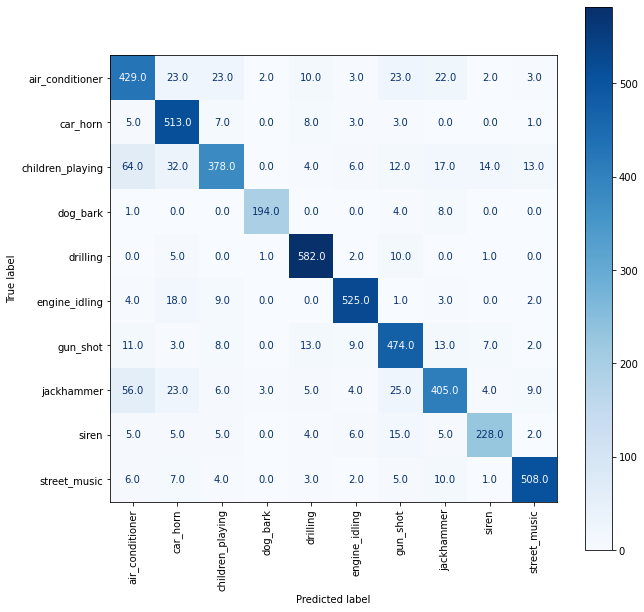

za parametre C= 10 , kernel= rbf  i pristup  ovr varijansa 0.99  tacnost je:  0.8687400648798596  a mat. konf. je:
Za klasu  air_conditioner  osetljivost je:  0.8
Za klasu  car_horn  osetljivost je:  0.9462962962962963
Za klasu  children_playing  osetljivost je:  0.7092592592592593
Za klasu  dog_bark  osetljivost je:  0.9420289855072463
Za klasu  drilling  osetljivost je:  0.9717138103161398
Za klasu  engine_idiling  osetljivost je:  0.9306049822064056
Za klasu  gun_shot  osetljivost je:  0.8962962962962963
Za klasu  jackhammer  osetljivost je:  0.7314814814814815
Za klasu  siren  osetljivost je:  0.84
Za klasu  street_music  osetljivost je:  0.9358974358974359
prosecna osetljivost je:  0.8703578547260561


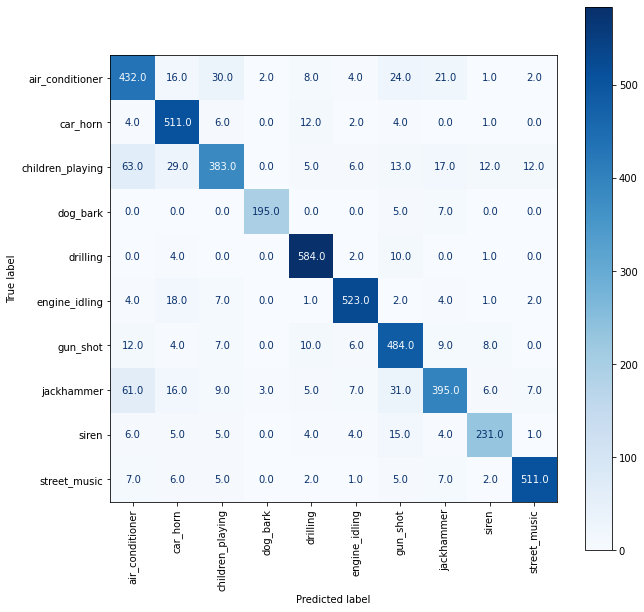

za parametre C= 10 , kernel= rbf  i pristup  ovo varijansa 0.95  tacnost je:  0.8660824137145913  a mat. konf. je:
Za klasu  air_conditioner  osetljivost je:  0.7944444444444444
Za klasu  car_horn  osetljivost je:  0.95
Za klasu  children_playing  osetljivost je:  0.7
Za klasu  dog_bark  osetljivost je:  0.9371980676328503
Za klasu  drilling  osetljivost je:  0.9683860232945092
Za klasu  engine_idiling  osetljivost je:  0.9341637010676157
Za klasu  gun_shot  osetljivost je:  0.8777777777777778
Za klasu  jackhammer  osetljivost je:  0.75
Za klasu  siren  osetljivost je:  0.8290909090909091
Za klasu  street_music  osetljivost je:  0.9304029304029304
prosecna osetljivost je:  0.8671463853711037


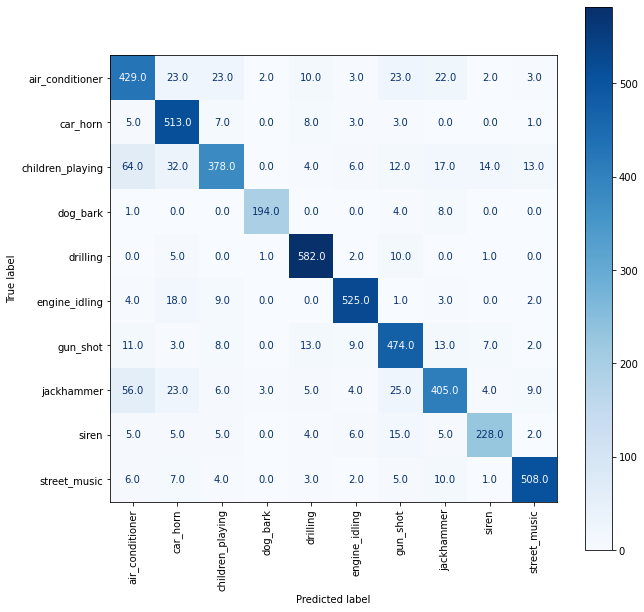

za parametre C= 10 , kernel= rbf  i pristup  ovo varijansa 0.99  tacnost je:  0.8687400648798596  a mat. konf. je:
Za klasu  air_conditioner  osetljivost je:  0.8
Za klasu  car_horn  osetljivost je:  0.9462962962962963
Za klasu  children_playing  osetljivost je:  0.7092592592592593
Za klasu  dog_bark  osetljivost je:  0.9420289855072463
Za klasu  drilling  osetljivost je:  0.9717138103161398
Za klasu  engine_idiling  osetljivost je:  0.9306049822064056
Za klasu  gun_shot  osetljivost je:  0.8962962962962963
Za klasu  jackhammer  osetljivost je:  0.7314814814814815
Za klasu  siren  osetljivost je:  0.84
Za klasu  street_music  osetljivost je:  0.9358974358974359
prosecna osetljivost je:  0.8703578547260561


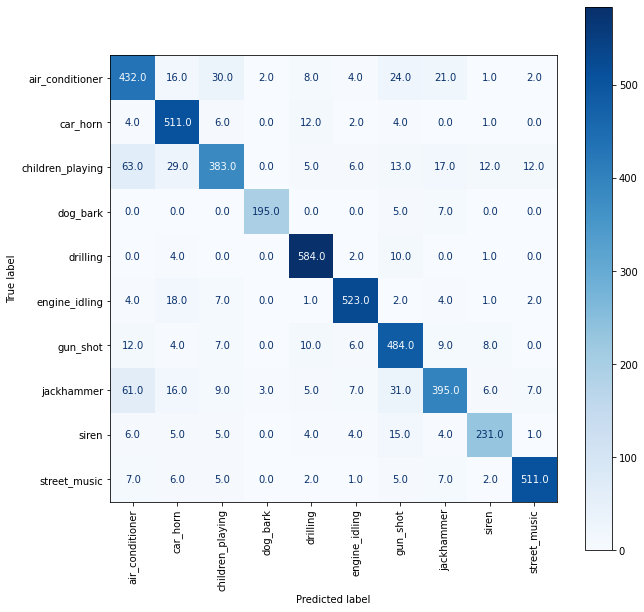

za parametre C= 10 , kernel= linear  i pristup  ovr varijansa 0.95  tacnost je:  0.7836897965663389  a mat. konf. je:
Za klasu  air_conditioner  osetljivost je:  0.6944444444444444
Za klasu  car_horn  osetljivost je:  0.8851851851851852
Za klasu  children_playing  osetljivost je:  0.5796296296296296
Za klasu  dog_bark  osetljivost je:  0.8743961352657005
Za klasu  drilling  osetljivost je:  0.891846921797005
Za klasu  engine_idiling  osetljivost je:  0.8629893238434164
Za klasu  gun_shot  osetljivost je:  0.7518518518518519
Za klasu  jackhammer  osetljivost je:  0.662962962962963
Za klasu  siren  osetljivost je:  0.7745454545454545
Za klasu  street_music  osetljivost je:  0.8937728937728938
prosecna osetljivost je:  0.7871624803298545


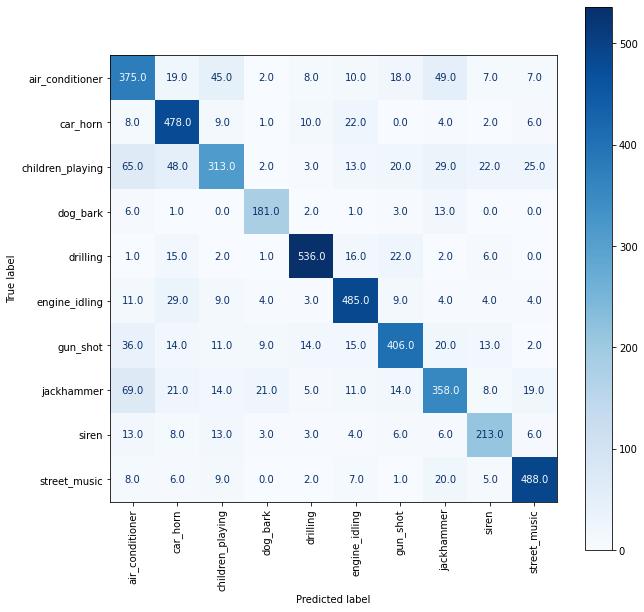

za parametre C= 10 , kernel= linear  i pristup  ovr varijansa 0.99  tacnost je:  0.7922758292235097  a mat. konf. je:
Za klasu  air_conditioner  osetljivost je:  0.7092592592592593
Za klasu  car_horn  osetljivost je:  0.9111111111111111
Za klasu  children_playing  osetljivost je:  0.575925925925926
Za klasu  dog_bark  osetljivost je:  0.9033816425120773
Za klasu  drilling  osetljivost je:  0.9101497504159733
Za klasu  engine_idiling  osetljivost je:  0.8807829181494662
Za klasu  gun_shot  osetljivost je:  0.762962962962963
Za klasu  jackhammer  osetljivost je:  0.6518518518518519
Za klasu  siren  osetljivost je:  0.7781818181818182
Za klasu  street_music  osetljivost je:  0.8827838827838828
prosecna osetljivost je:  0.7966391123154329


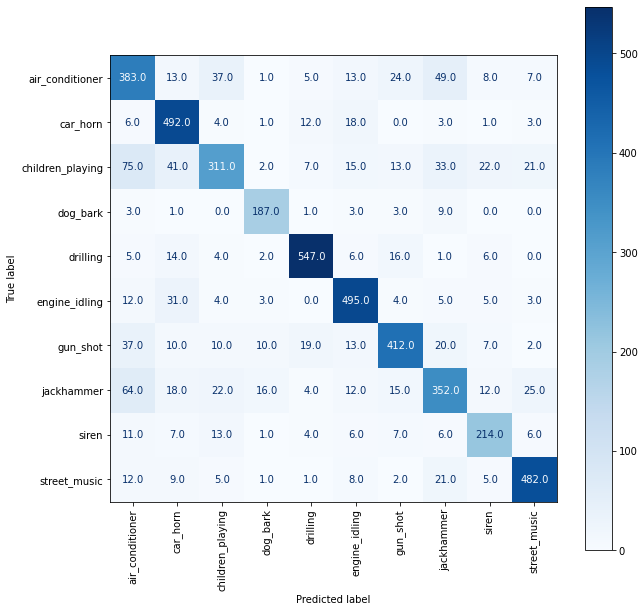

za parametre C= 10 , kernel= linear  i pristup  ovo varijansa 0.95  tacnost je:  0.7836897965663389  a mat. konf. je:
Za klasu  air_conditioner  osetljivost je:  0.6944444444444444
Za klasu  car_horn  osetljivost je:  0.8851851851851852
Za klasu  children_playing  osetljivost je:  0.5796296296296296
Za klasu  dog_bark  osetljivost je:  0.8743961352657005
Za klasu  drilling  osetljivost je:  0.891846921797005
Za klasu  engine_idiling  osetljivost je:  0.8629893238434164
Za klasu  gun_shot  osetljivost je:  0.7518518518518519
Za klasu  jackhammer  osetljivost je:  0.662962962962963
Za klasu  siren  osetljivost je:  0.7745454545454545
Za klasu  street_music  osetljivost je:  0.8937728937728938
prosecna osetljivost je:  0.7871624803298545


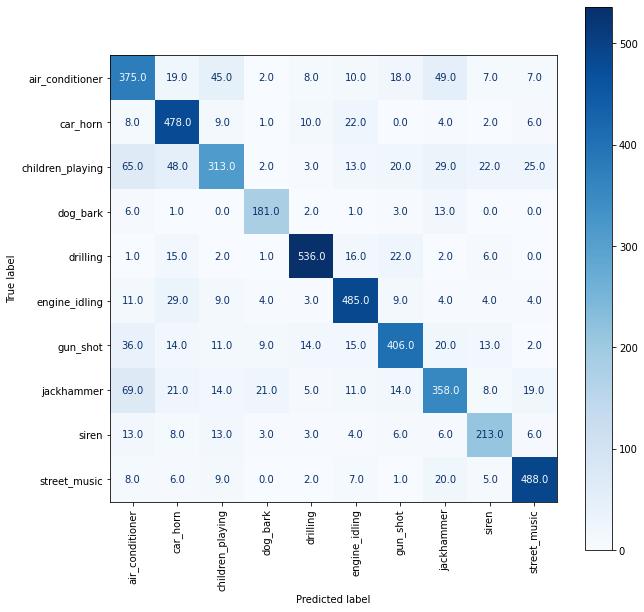

za parametre C= 10 , kernel= linear  i pristup  ovo varijansa 0.99  tacnost je:  0.7922758292235097  a mat. konf. je:
Za klasu  air_conditioner  osetljivost je:  0.7092592592592593
Za klasu  car_horn  osetljivost je:  0.9111111111111111
Za klasu  children_playing  osetljivost je:  0.575925925925926
Za klasu  dog_bark  osetljivost je:  0.9033816425120773
Za klasu  drilling  osetljivost je:  0.9101497504159733
Za klasu  engine_idiling  osetljivost je:  0.8807829181494662
Za klasu  gun_shot  osetljivost je:  0.762962962962963
Za klasu  jackhammer  osetljivost je:  0.6518518518518519
Za klasu  siren  osetljivost je:  0.7781818181818182
Za klasu  street_music  osetljivost je:  0.8827838827838828
prosecna osetljivost je:  0.7966391123154329


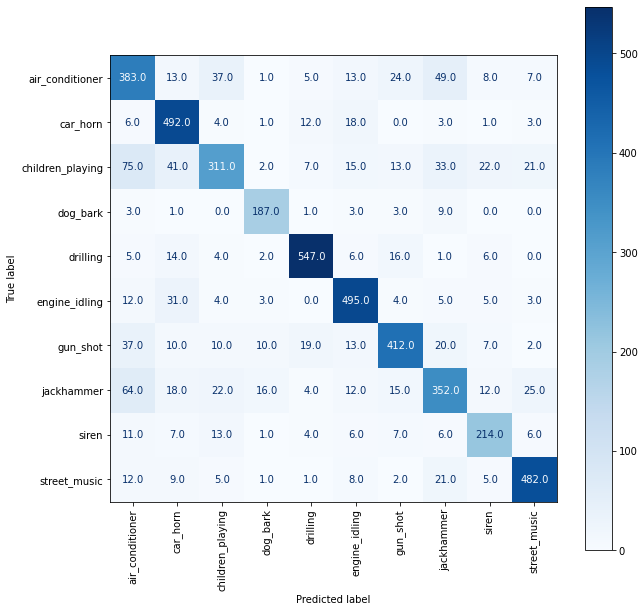

za parametre C= 10 , kernel= poly  i pristup  ovr varijansa 0.95  tacnost je:  0.6497651081713948  a mat. konf. je:
Za klasu  air_conditioner  osetljivost je:  0.9296296296296296
Za klasu  car_horn  osetljivost je:  0.7185185185185186
Za klasu  children_playing  osetljivost je:  0.2740740740740741
Za klasu  dog_bark  osetljivost je:  0.7971014492753623
Za klasu  drilling  osetljivost je:  0.9267886855241264
Za klasu  engine_idiling  osetljivost je:  0.6103202846975089
Za klasu  gun_shot  osetljivost je:  0.5351851851851852
Za klasu  jackhammer  osetljivost je:  0.4685185185185185
Za klasu  siren  osetljivost je:  0.6218181818181818
Za klasu  street_music  osetljivost je:  0.663003663003663
prosecna osetljivost je:  0.654495819024477


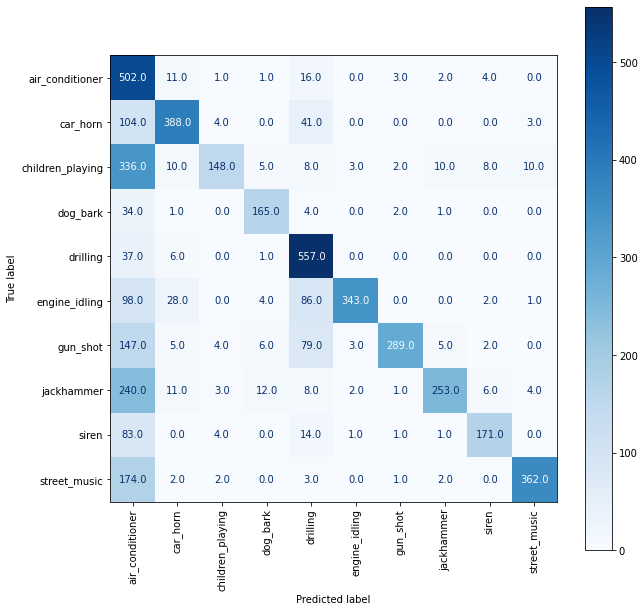

za parametre C= 10 , kernel= poly  i pristup  ovr varijansa 0.99  tacnost je:  0.6497648992858203  a mat. konf. je:
Za klasu  air_conditioner  osetljivost je:  0.9425925925925925
Za klasu  car_horn  osetljivost je:  0.7
Za klasu  children_playing  osetljivost je:  0.2759259259259259
Za klasu  dog_bark  osetljivost je:  0.782608695652174
Za klasu  drilling  osetljivost je:  0.9384359400998337
Za klasu  engine_idiling  osetljivost je:  0.6209964412811388
Za klasu  gun_shot  osetljivost je:  0.5370370370370371
Za klasu  jackhammer  osetljivost je:  0.45740740740740743
Za klasu  siren  osetljivost je:  0.6327272727272727
Za klasu  street_music  osetljivost je:  0.652014652014652
prosecna osetljivost je:  0.6539745964738034


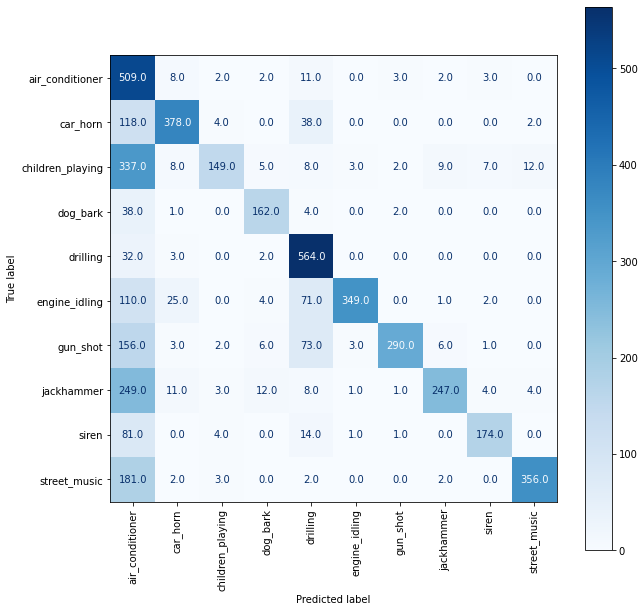

za parametre C= 10 , kernel= poly  i pristup  ovo varijansa 0.95  tacnost je:  0.6497651081713948  a mat. konf. je:
Za klasu  air_conditioner  osetljivost je:  0.9296296296296296
Za klasu  car_horn  osetljivost je:  0.7185185185185186
Za klasu  children_playing  osetljivost je:  0.2740740740740741
Za klasu  dog_bark  osetljivost je:  0.7971014492753623
Za klasu  drilling  osetljivost je:  0.9267886855241264
Za klasu  engine_idiling  osetljivost je:  0.6103202846975089
Za klasu  gun_shot  osetljivost je:  0.5351851851851852
Za klasu  jackhammer  osetljivost je:  0.4685185185185185
Za klasu  siren  osetljivost je:  0.6218181818181818
Za klasu  street_music  osetljivost je:  0.663003663003663
prosecna osetljivost je:  0.654495819024477


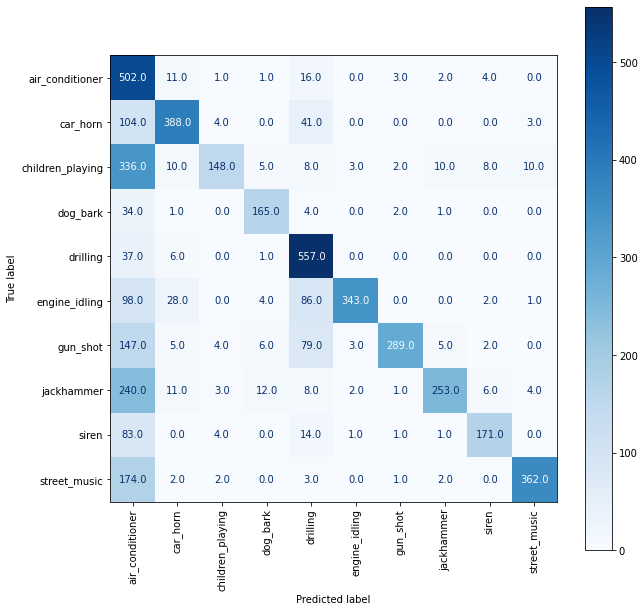

za parametre C= 10 , kernel= poly  i pristup  ovo varijansa 0.99  tacnost je:  0.6497648992858203  a mat. konf. je:
Za klasu  air_conditioner  osetljivost je:  0.9425925925925925
Za klasu  car_horn  osetljivost je:  0.7
Za klasu  children_playing  osetljivost je:  0.2759259259259259
Za klasu  dog_bark  osetljivost je:  0.782608695652174
Za klasu  drilling  osetljivost je:  0.9384359400998337
Za klasu  engine_idiling  osetljivost je:  0.6209964412811388
Za klasu  gun_shot  osetljivost je:  0.5370370370370371
Za klasu  jackhammer  osetljivost je:  0.45740740740740743
Za klasu  siren  osetljivost je:  0.6327272727272727
Za klasu  street_music  osetljivost je:  0.652014652014652
prosecna osetljivost je:  0.6539745964738034


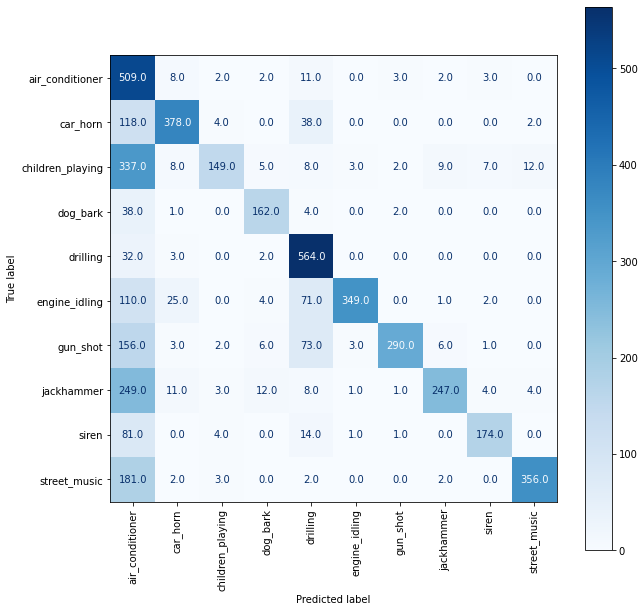

za parametre C= 20 , kernel= rbf  i pristup  ovr varijansa 0.95  tacnost je:  0.8785543447155082  a mat. konf. je:
Za klasu  air_conditioner  osetljivost je:  0.8148148148148148
Za klasu  car_horn  osetljivost je:  0.9574074074074074
Za klasu  children_playing  osetljivost je:  0.7074074074074074
Za klasu  dog_bark  osetljivost je:  0.9371980676328503
Za klasu  drilling  osetljivost je:  0.9767054908485857
Za klasu  engine_idiling  osetljivost je:  0.9430604982206405
Za klasu  gun_shot  osetljivost je:  0.912962962962963
Za klasu  jackhammer  osetljivost je:  0.75
Za klasu  siren  osetljivost je:  0.8581818181818182
Za klasu  street_music  osetljivost je:  0.9395604395604396
prosecna osetljivost je:  0.8797298907036927


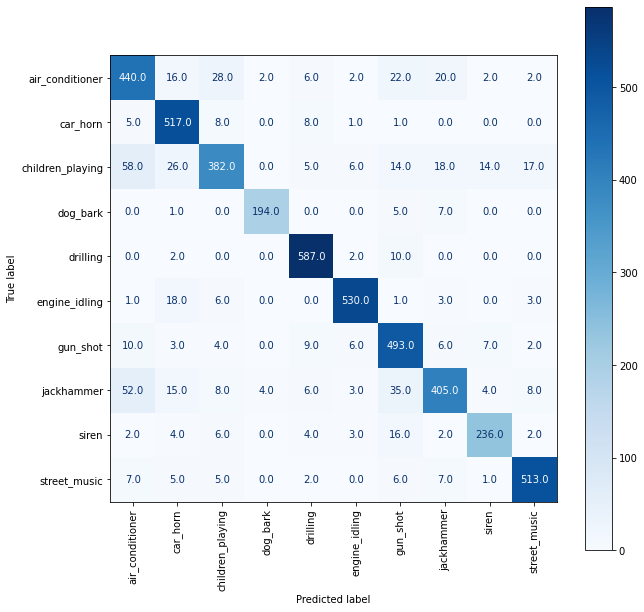

za parametre C= 20 , kernel= rbf  i pristup  ovr varijansa 0.99  tacnost je:  0.8828473610440938  a mat. konf. je:
Za klasu  air_conditioner  osetljivost je:  0.8277777777777777
Za klasu  car_horn  osetljivost je:  0.9648148148148148
Za klasu  children_playing  osetljivost je:  0.7185185185185186
Za klasu  dog_bark  osetljivost je:  0.9468599033816425
Za klasu  drilling  osetljivost je:  0.9767054908485857
Za klasu  engine_idiling  osetljivost je:  0.9448398576512456
Za klasu  gun_shot  osetljivost je:  0.9259259259259259
Za klasu  jackhammer  osetljivost je:  0.7444444444444445
Za klasu  siren  osetljivost je:  0.8472727272727273
Za klasu  street_music  osetljivost je:  0.9395604395604396
prosecna osetljivost je:  0.8836719900196123


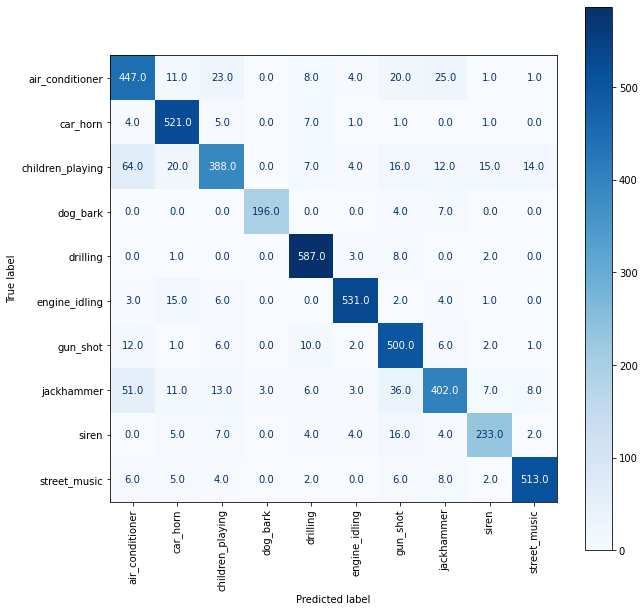

za parametre C= 20 , kernel= rbf  i pristup  ovo varijansa 0.95  tacnost je:  0.8785543447155082  a mat. konf. je:
Za klasu  air_conditioner  osetljivost je:  0.8148148148148148
Za klasu  car_horn  osetljivost je:  0.9574074074074074
Za klasu  children_playing  osetljivost je:  0.7074074074074074
Za klasu  dog_bark  osetljivost je:  0.9371980676328503
Za klasu  drilling  osetljivost je:  0.9767054908485857
Za klasu  engine_idiling  osetljivost je:  0.9430604982206405
Za klasu  gun_shot  osetljivost je:  0.912962962962963
Za klasu  jackhammer  osetljivost je:  0.75
Za klasu  siren  osetljivost je:  0.8581818181818182
Za klasu  street_music  osetljivost je:  0.9395604395604396
prosecna osetljivost je:  0.8797298907036927


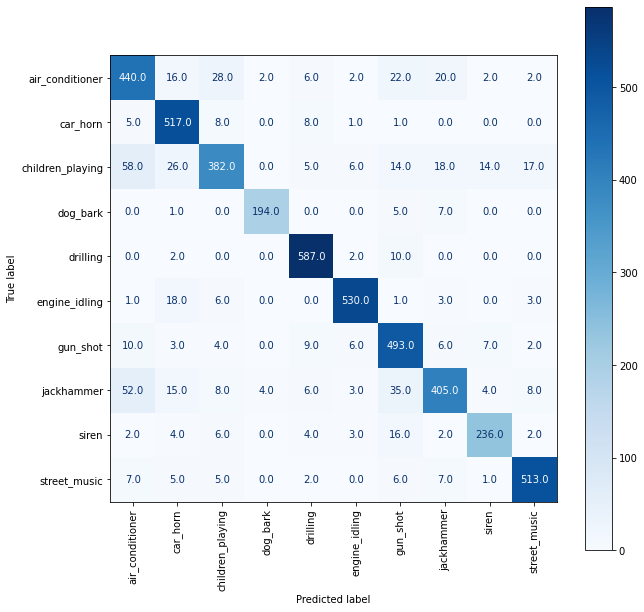

za parametre C= 20 , kernel= rbf  i pristup  ovo varijansa 0.99  tacnost je:  0.8828473610440938  a mat. konf. je:
Za klasu  air_conditioner  osetljivost je:  0.8277777777777777
Za klasu  car_horn  osetljivost je:  0.9648148148148148
Za klasu  children_playing  osetljivost je:  0.7185185185185186
Za klasu  dog_bark  osetljivost je:  0.9468599033816425
Za klasu  drilling  osetljivost je:  0.9767054908485857
Za klasu  engine_idiling  osetljivost je:  0.9448398576512456
Za klasu  gun_shot  osetljivost je:  0.9259259259259259
Za klasu  jackhammer  osetljivost je:  0.7444444444444445
Za klasu  siren  osetljivost je:  0.8472727272727273
Za klasu  street_music  osetljivost je:  0.9395604395604396
prosecna osetljivost je:  0.8836719900196123


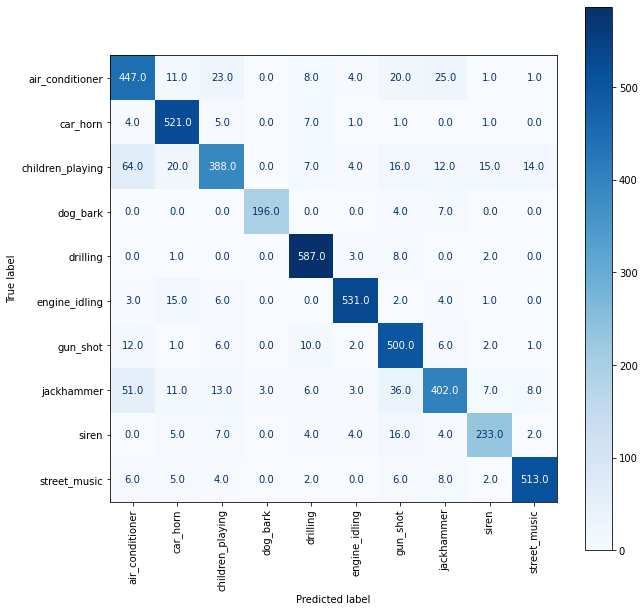

za parametre C= 20 , kernel= linear  i pristup  ovr varijansa 0.95  tacnost je:  0.7875731882831903  a mat. konf. je:
Za klasu  air_conditioner  osetljivost je:  0.7055555555555556
Za klasu  car_horn  osetljivost je:  0.8888888888888888
Za klasu  children_playing  osetljivost je:  0.5740740740740741
Za klasu  dog_bark  osetljivost je:  0.8743961352657005
Za klasu  drilling  osetljivost je:  0.8951747088186356
Za klasu  engine_idiling  osetljivost je:  0.8594306049822064
Za klasu  gun_shot  osetljivost je:  0.7796296296296297
Za klasu  jackhammer  osetljivost je:  0.662962962962963
Za klasu  siren  osetljivost je:  0.7781818181818182
Za klasu  street_music  osetljivost je:  0.8901098901098901
prosecna osetljivost je:  0.7908404268469361


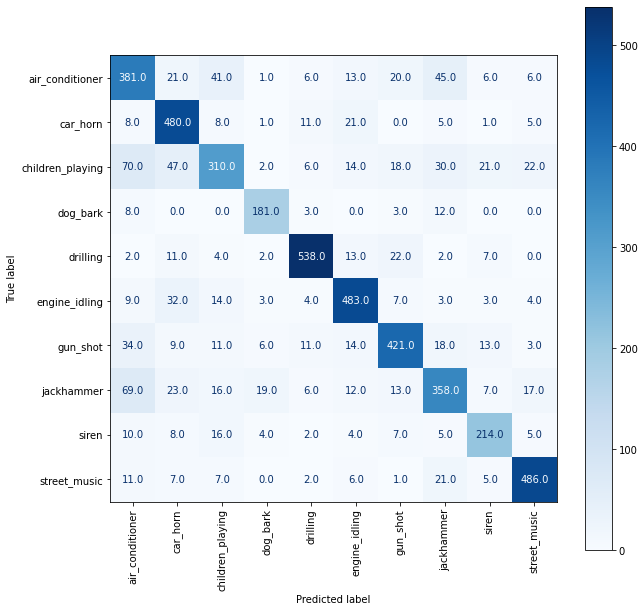

za parametre C= 20 , kernel= linear  i pristup  ovr varijansa 0.99  tacnost je:  0.7865500667389411  a mat. konf. je:
Za klasu  air_conditioner  osetljivost je:  0.6925925925925925
Za klasu  car_horn  osetljivost je:  0.9148148148148149
Za klasu  children_playing  osetljivost je:  0.5611111111111111
Za klasu  dog_bark  osetljivost je:  0.9033816425120773
Za klasu  drilling  osetljivost je:  0.8951747088186356
Za klasu  engine_idiling  osetljivost je:  0.8879003558718861
Za klasu  gun_shot  osetljivost je:  0.762962962962963
Za klasu  jackhammer  osetljivost je:  0.6444444444444445
Za klasu  siren  osetljivost je:  0.7672727272727272
Za klasu  street_music  osetljivost je:  0.8809523809523809
prosecna osetljivost je:  0.7910607741353634


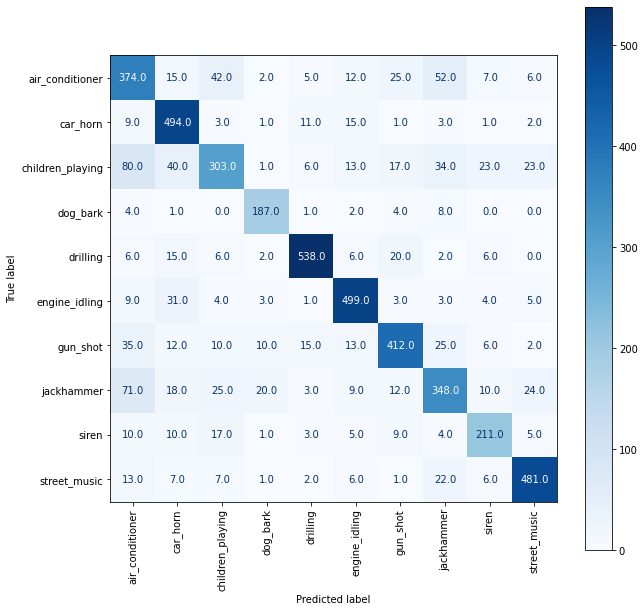

za parametre C= 20 , kernel= linear  i pristup  ovo varijansa 0.95  tacnost je:  0.7875731882831903  a mat. konf. je:
Za klasu  air_conditioner  osetljivost je:  0.7055555555555556
Za klasu  car_horn  osetljivost je:  0.8888888888888888
Za klasu  children_playing  osetljivost je:  0.5740740740740741
Za klasu  dog_bark  osetljivost je:  0.8743961352657005
Za klasu  drilling  osetljivost je:  0.8951747088186356
Za klasu  engine_idiling  osetljivost je:  0.8594306049822064
Za klasu  gun_shot  osetljivost je:  0.7796296296296297
Za klasu  jackhammer  osetljivost je:  0.662962962962963
Za klasu  siren  osetljivost je:  0.7781818181818182
Za klasu  street_music  osetljivost je:  0.8901098901098901
prosecna osetljivost je:  0.7908404268469361


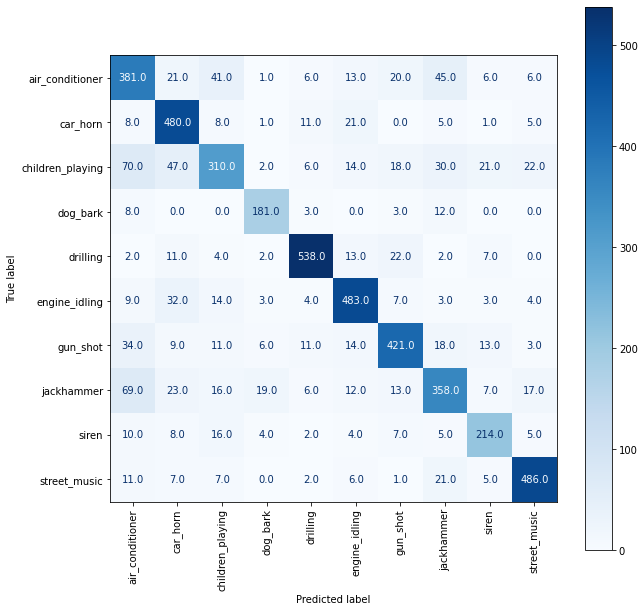

za parametre C= 20 , kernel= linear  i pristup  ovo varijansa 0.99  tacnost je:  0.7865500667389411  a mat. konf. je:
Za klasu  air_conditioner  osetljivost je:  0.6925925925925925
Za klasu  car_horn  osetljivost je:  0.9148148148148149
Za klasu  children_playing  osetljivost je:  0.5611111111111111
Za klasu  dog_bark  osetljivost je:  0.9033816425120773
Za klasu  drilling  osetljivost je:  0.8951747088186356
Za klasu  engine_idiling  osetljivost je:  0.8879003558718861
Za klasu  gun_shot  osetljivost je:  0.762962962962963
Za klasu  jackhammer  osetljivost je:  0.6444444444444445
Za klasu  siren  osetljivost je:  0.7672727272727272
Za klasu  street_music  osetljivost je:  0.8809523809523809
prosecna osetljivost je:  0.7910607741353634


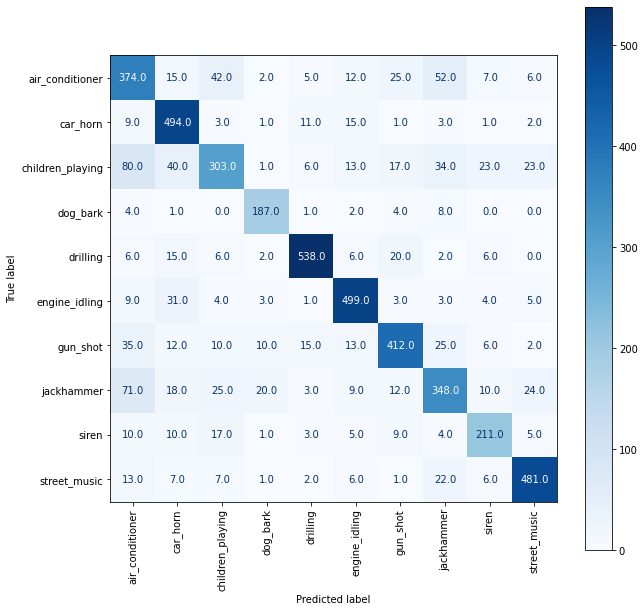

za parametre C= 20 , kernel= poly  i pristup  ovr varijansa 0.95  tacnost je:  0.6976080512855862  a mat. konf. je:
Za klasu  air_conditioner  osetljivost je:  0.924074074074074
Za klasu  car_horn  osetljivost je:  0.7611111111111111
Za klasu  children_playing  osetljivost je:  0.34074074074074073
Za klasu  dog_bark  osetljivost je:  0.821256038647343
Za klasu  drilling  osetljivost je:  0.940099833610649
Za klasu  engine_idiling  osetljivost je:  0.6903914590747331
Za klasu  gun_shot  osetljivost je:  0.6185185185185185
Za klasu  jackhammer  osetljivost je:  0.5222222222222223
Za klasu  siren  osetljivost je:  0.6836363636363636
Za klasu  street_music  osetljivost je:  0.7161172161172161
prosecna osetljivost je:  0.7018167577752972


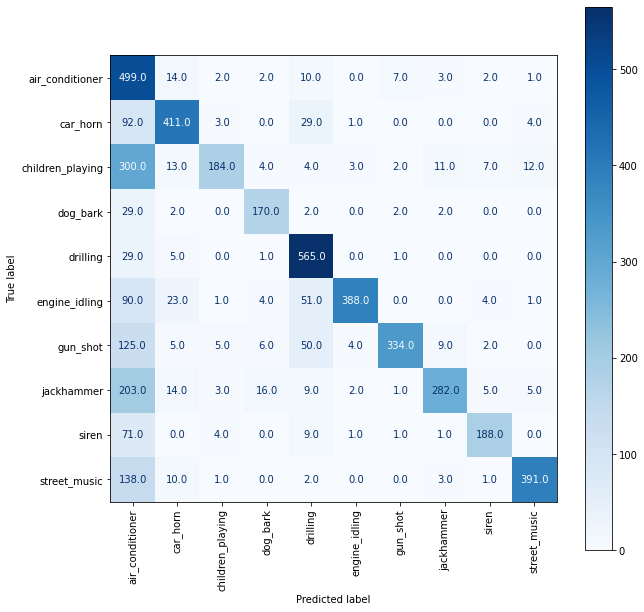

za parametre C= 20 , kernel= poly  i pristup  ovr varijansa 0.99  tacnost je:  0.7039471018170956  a mat. konf. je:
Za klasu  air_conditioner  osetljivost je:  0.9296296296296296
Za klasu  car_horn  osetljivost je:  0.7648148148148148
Za klasu  children_playing  osetljivost je:  0.3388888888888889
Za klasu  dog_bark  osetljivost je:  0.8164251207729468
Za klasu  drilling  osetljivost je:  0.9517470881863561
Za klasu  engine_idiling  osetljivost je:  0.7170818505338078
Za klasu  gun_shot  osetljivost je:  0.6314814814814815
Za klasu  jackhammer  osetljivost je:  0.5185185185185185
Za klasu  siren  osetljivost je:  0.6872727272727273
Za klasu  street_music  osetljivost je:  0.7161172161172161
prosecna osetljivost je:  0.7071977336216387


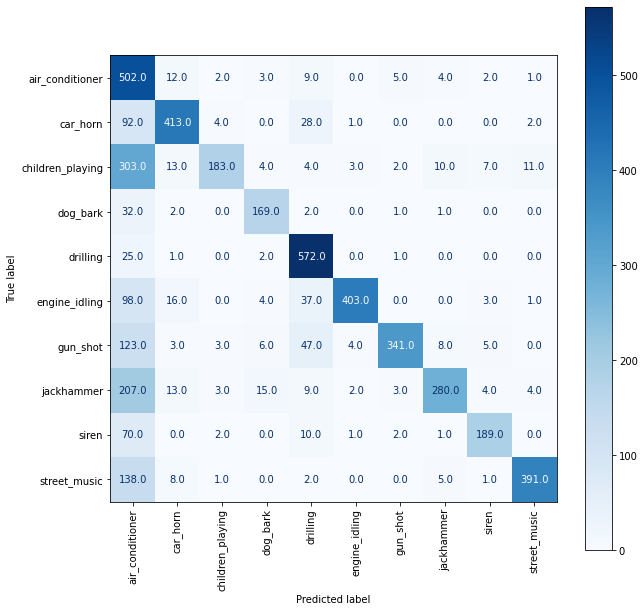

za parametre C= 20 , kernel= poly  i pristup  ovo varijansa 0.95  tacnost je:  0.6976080512855862  a mat. konf. je:
Za klasu  air_conditioner  osetljivost je:  0.924074074074074
Za klasu  car_horn  osetljivost je:  0.7611111111111111
Za klasu  children_playing  osetljivost je:  0.34074074074074073
Za klasu  dog_bark  osetljivost je:  0.821256038647343
Za klasu  drilling  osetljivost je:  0.940099833610649
Za klasu  engine_idiling  osetljivost je:  0.6903914590747331
Za klasu  gun_shot  osetljivost je:  0.6185185185185185
Za klasu  jackhammer  osetljivost je:  0.5222222222222223
Za klasu  siren  osetljivost je:  0.6836363636363636
Za klasu  street_music  osetljivost je:  0.7161172161172161
prosecna osetljivost je:  0.7018167577752972


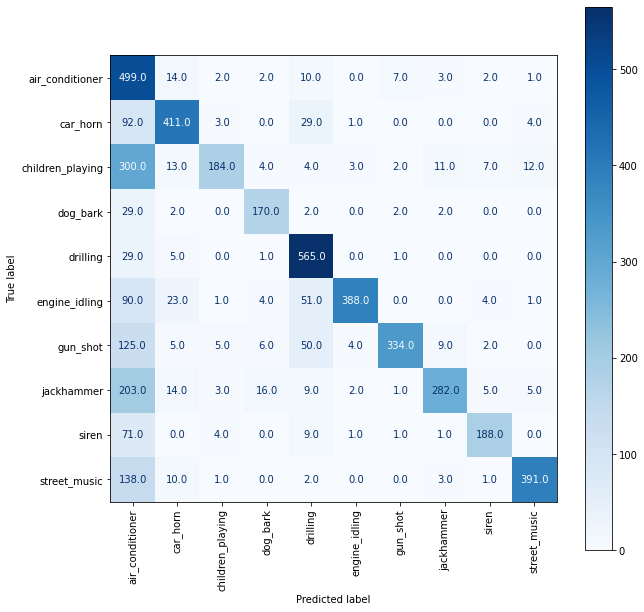

za parametre C= 20 , kernel= poly  i pristup  ovo varijansa 0.99  tacnost je:  0.7039471018170956  a mat. konf. je:
Za klasu  air_conditioner  osetljivost je:  0.9296296296296296
Za klasu  car_horn  osetljivost je:  0.7648148148148148
Za klasu  children_playing  osetljivost je:  0.3388888888888889
Za klasu  dog_bark  osetljivost je:  0.8164251207729468
Za klasu  drilling  osetljivost je:  0.9517470881863561
Za klasu  engine_idiling  osetljivost je:  0.7170818505338078
Za klasu  gun_shot  osetljivost je:  0.6314814814814815
Za klasu  jackhammer  osetljivost je:  0.5185185185185185
Za klasu  siren  osetljivost je:  0.6872727272727273
Za klasu  street_music  osetljivost je:  0.7161172161172161
prosecna osetljivost je:  0.7071977336216387


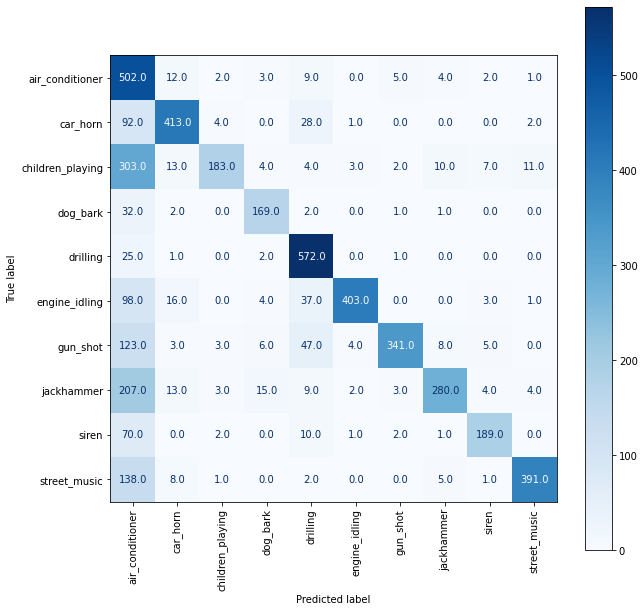

za parametre C= 50 , kernel= rbf  i pristup  ovr varijansa 0.95  tacnost je:  0.8875506286411365  a mat. konf. je:
Za klasu  air_conditioner  osetljivost je:  0.8425925925925926
Za klasu  car_horn  osetljivost je:  0.9722222222222222
Za klasu  children_playing  osetljivost je:  0.7185185185185186
Za klasu  dog_bark  osetljivost je:  0.9130434782608695
Za klasu  drilling  osetljivost je:  0.978369384359401
Za klasu  engine_idiling  osetljivost je:  0.9555160142348754
Za klasu  gun_shot  osetljivost je:  0.9203703703703704
Za klasu  jackhammer  osetljivost je:  0.7648148148148148
Za klasu  siren  osetljivost je:  0.84
Za klasu  street_music  osetljivost je:  0.9487179487179487
prosecna osetljivost je:  0.8854165344091612


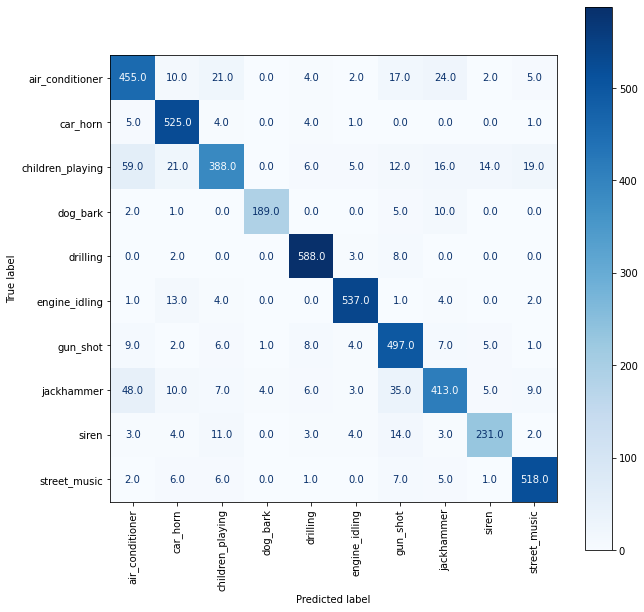

za parametre C= 50 , kernel= rbf  i pristup  ovr varijansa 0.99  tacnost je:  0.8914338114724135  a mat. konf. je:
Za klasu  air_conditioner  osetljivost je:  0.8666666666666667
Za klasu  car_horn  osetljivost je:  0.9722222222222222
Za klasu  children_playing  osetljivost je:  0.7314814814814815
Za klasu  dog_bark  osetljivost je:  0.9323671497584541
Za klasu  drilling  osetljivost je:  0.9750415973377704
Za klasu  engine_idiling  osetljivost je:  0.9590747330960854
Za klasu  gun_shot  osetljivost je:  0.9185185185185185
Za klasu  jackhammer  osetljivost je:  0.7592592592592593
Za klasu  siren  osetljivost je:  0.8290909090909091
Za klasu  street_music  osetljivost je:  0.9523809523809523
prosecna osetljivost je:  0.8896103489812319


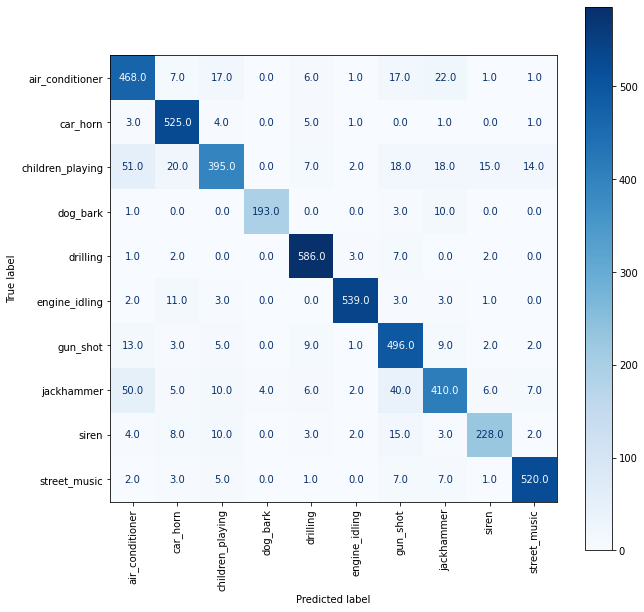

za parametre C= 50 , kernel= rbf  i pristup  ovo varijansa 0.95  tacnost je:  0.8875506286411365  a mat. konf. je:
Za klasu  air_conditioner  osetljivost je:  0.8425925925925926
Za klasu  car_horn  osetljivost je:  0.9722222222222222
Za klasu  children_playing  osetljivost je:  0.7185185185185186
Za klasu  dog_bark  osetljivost je:  0.9130434782608695
Za klasu  drilling  osetljivost je:  0.978369384359401
Za klasu  engine_idiling  osetljivost je:  0.9555160142348754
Za klasu  gun_shot  osetljivost je:  0.9203703703703704
Za klasu  jackhammer  osetljivost je:  0.7648148148148148
Za klasu  siren  osetljivost je:  0.84
Za klasu  street_music  osetljivost je:  0.9487179487179487
prosecna osetljivost je:  0.8854165344091612


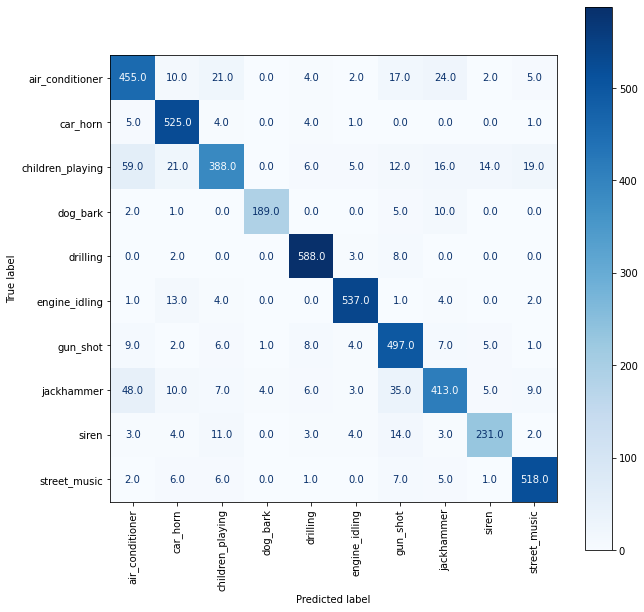

za parametre C= 50 , kernel= rbf  i pristup  ovo varijansa 0.99  tacnost je:  0.8914338114724135  a mat. konf. je:
Za klasu  air_conditioner  osetljivost je:  0.8666666666666667
Za klasu  car_horn  osetljivost je:  0.9722222222222222
Za klasu  children_playing  osetljivost je:  0.7314814814814815
Za klasu  dog_bark  osetljivost je:  0.9323671497584541
Za klasu  drilling  osetljivost je:  0.9750415973377704
Za klasu  engine_idiling  osetljivost je:  0.9590747330960854
Za klasu  gun_shot  osetljivost je:  0.9185185185185185
Za klasu  jackhammer  osetljivost je:  0.7592592592592593
Za klasu  siren  osetljivost je:  0.8290909090909091
Za klasu  street_music  osetljivost je:  0.9523809523809523
prosecna osetljivost je:  0.8896103489812319


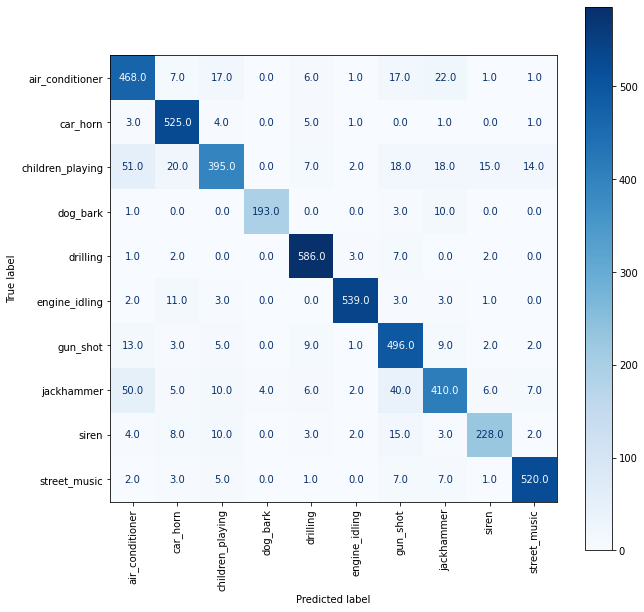

za parametre C= 50 , kernel= linear  i pristup  ovr varijansa 0.95  tacnost je:  0.7785748155018163  a mat. konf. je:
Za klasu  air_conditioner  osetljivost je:  0.6981481481481482
Za klasu  car_horn  osetljivost je:  0.8907407407407407
Za klasu  children_playing  osetljivost je:  0.5648148148148148
Za klasu  dog_bark  osetljivost je:  0.8647342995169082
Za klasu  drilling  osetljivost je:  0.8718801996672213
Za klasu  engine_idiling  osetljivost je:  0.8629893238434164
Za klasu  gun_shot  osetljivost je:  0.7648148148148148
Za klasu  jackhammer  osetljivost je:  0.6518518518518519
Za klasu  siren  osetljivost je:  0.7672727272727272
Za klasu  street_music  osetljivost je:  0.8809523809523809
prosecna osetljivost je:  0.7818199301623026


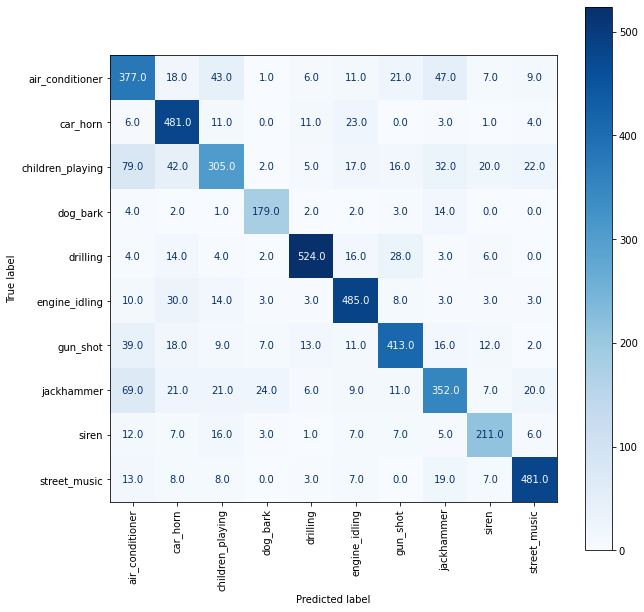

za parametre C= 50 , kernel= linear  i pristup  ovr varijansa 0.99  tacnost je:  0.7834832087330881  a mat. konf. je:
Za klasu  air_conditioner  osetljivost je:  0.6962962962962963
Za klasu  car_horn  osetljivost je:  0.9148148148148149
Za klasu  children_playing  osetljivost je:  0.5555555555555556
Za klasu  dog_bark  osetljivost je:  0.9033816425120773
Za klasu  drilling  osetljivost je:  0.8851913477537438
Za klasu  engine_idiling  osetljivost je:  0.8772241992882562
Za klasu  gun_shot  osetljivost je:  0.7481481481481481
Za klasu  jackhammer  osetljivost je:  0.6537037037037037
Za klasu  siren  osetljivost je:  0.7818181818181819
Za klasu  street_music  osetljivost je:  0.8754578754578755
prosecna osetljivost je:  0.7891591765348653


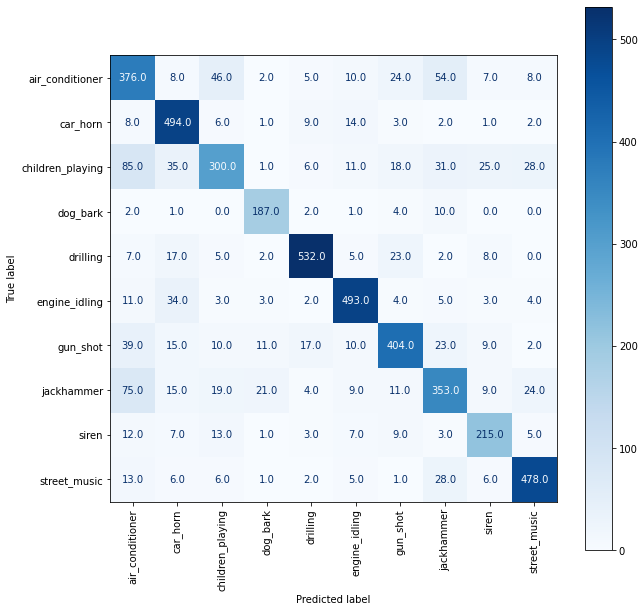

za parametre C= 50 , kernel= linear  i pristup  ovo varijansa 0.95  tacnost je:  0.7785748155018163  a mat. konf. je:
Za klasu  air_conditioner  osetljivost je:  0.6981481481481482
Za klasu  car_horn  osetljivost je:  0.8907407407407407
Za klasu  children_playing  osetljivost je:  0.5648148148148148
Za klasu  dog_bark  osetljivost je:  0.8647342995169082
Za klasu  drilling  osetljivost je:  0.8718801996672213
Za klasu  engine_idiling  osetljivost je:  0.8629893238434164
Za klasu  gun_shot  osetljivost je:  0.7648148148148148
Za klasu  jackhammer  osetljivost je:  0.6518518518518519
Za klasu  siren  osetljivost je:  0.7672727272727272
Za klasu  street_music  osetljivost je:  0.8809523809523809
prosecna osetljivost je:  0.7818199301623026


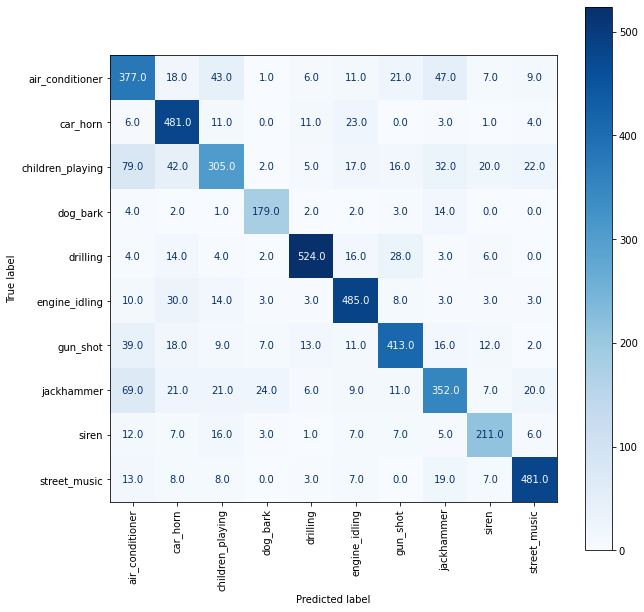

za parametre C= 50 , kernel= linear  i pristup  ovo varijansa 0.99  tacnost je:  0.7834832087330881  a mat. konf. je:
Za klasu  air_conditioner  osetljivost je:  0.6962962962962963
Za klasu  car_horn  osetljivost je:  0.9148148148148149
Za klasu  children_playing  osetljivost je:  0.5555555555555556
Za klasu  dog_bark  osetljivost je:  0.9033816425120773
Za klasu  drilling  osetljivost je:  0.8851913477537438
Za klasu  engine_idiling  osetljivost je:  0.8772241992882562
Za klasu  gun_shot  osetljivost je:  0.7481481481481481
Za klasu  jackhammer  osetljivost je:  0.6537037037037037
Za klasu  siren  osetljivost je:  0.7818181818181819
Za klasu  street_music  osetljivost je:  0.8754578754578755
prosecna osetljivost je:  0.7891591765348653


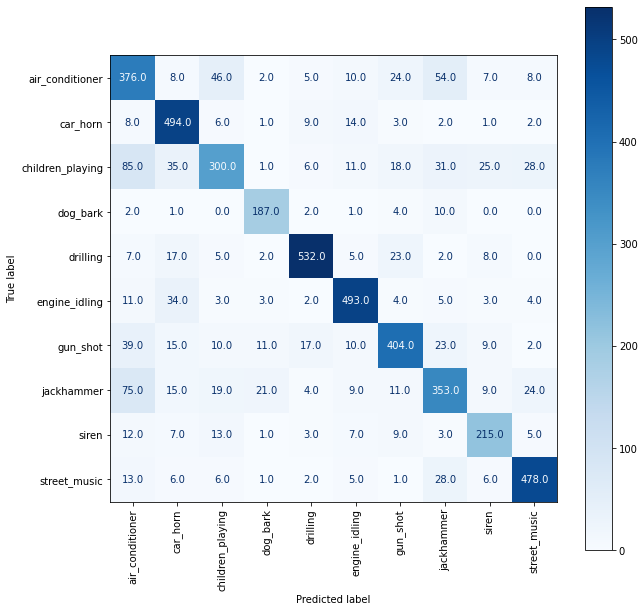

za parametre C= 50 , kernel= poly  i pristup  ovr varijansa 0.95  tacnost je:  0.764670138344916  a mat. konf. je:
Za klasu  air_conditioner  osetljivost je:  0.912962962962963
Za klasu  car_horn  osetljivost je:  0.8111111111111111
Za klasu  children_playing  osetljivost je:  0.43333333333333335
Za klasu  dog_bark  osetljivost je:  0.8695652173913043
Za klasu  drilling  osetljivost je:  0.956738768718802
Za klasu  engine_idiling  osetljivost je:  0.8416370106761566
Za klasu  gun_shot  osetljivost je:  0.7481481481481481
Za klasu  jackhammer  osetljivost je:  0.575925925925926
Za klasu  siren  osetljivost je:  0.7163636363636363
Za klasu  street_music  osetljivost je:  0.7967032967032966
prosecna osetljivost je:  0.7662489411334679


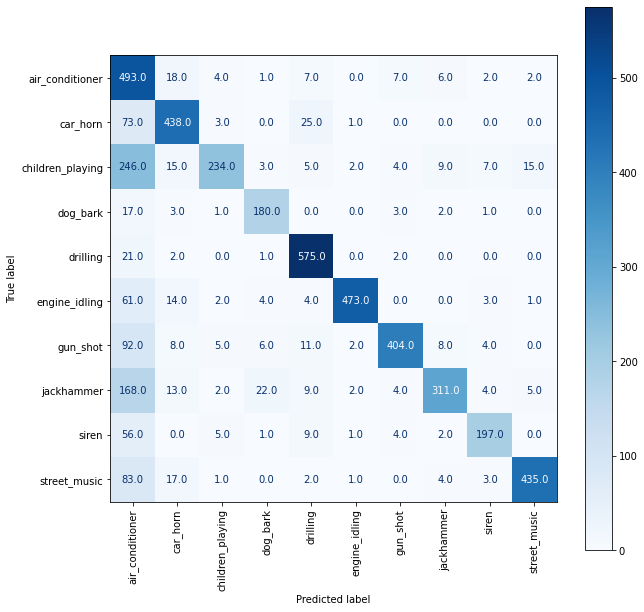

za parametre C= 50 , kernel= poly  i pristup  ovr varijansa 0.99  tacnost je:  0.7710089799908508  a mat. konf. je:
Za klasu  air_conditioner  osetljivost je:  0.9222222222222223
Za klasu  car_horn  osetljivost je:  0.8407407407407408
Za klasu  children_playing  osetljivost je:  0.4222222222222222
Za klasu  dog_bark  osetljivost je:  0.8647342995169082
Za klasu  drilling  osetljivost je:  0.961730449251248
Za klasu  engine_idiling  osetljivost je:  0.8487544483985765
Za klasu  gun_shot  osetljivost je:  0.7611111111111111
Za klasu  jackhammer  osetljivost je:  0.5888888888888889
Za klasu  siren  osetljivost je:  0.7018181818181818
Za klasu  street_music  osetljivost je:  0.7967032967032966
prosecna osetljivost je:  0.7708925860873397


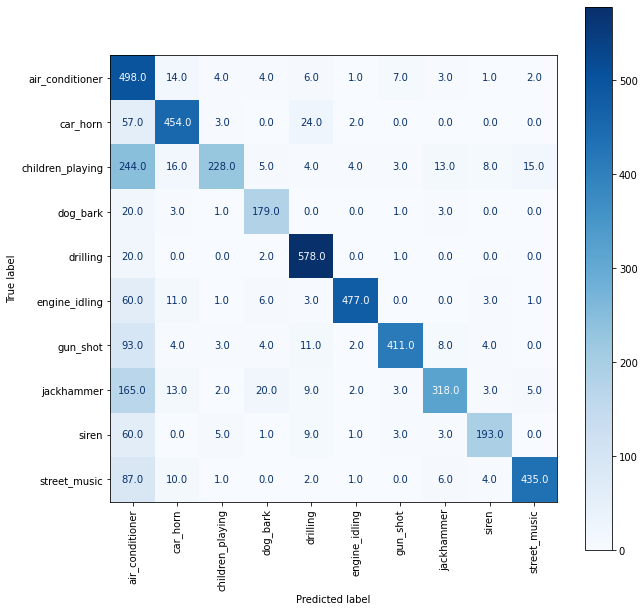

za parametre C= 50 , kernel= poly  i pristup  ovo varijansa 0.95  tacnost je:  0.764670138344916  a mat. konf. je:
Za klasu  air_conditioner  osetljivost je:  0.912962962962963
Za klasu  car_horn  osetljivost je:  0.8111111111111111
Za klasu  children_playing  osetljivost je:  0.43333333333333335
Za klasu  dog_bark  osetljivost je:  0.8695652173913043
Za klasu  drilling  osetljivost je:  0.956738768718802
Za klasu  engine_idiling  osetljivost je:  0.8416370106761566
Za klasu  gun_shot  osetljivost je:  0.7481481481481481
Za klasu  jackhammer  osetljivost je:  0.575925925925926
Za klasu  siren  osetljivost je:  0.7163636363636363
Za klasu  street_music  osetljivost je:  0.7967032967032966
prosecna osetljivost je:  0.7662489411334679


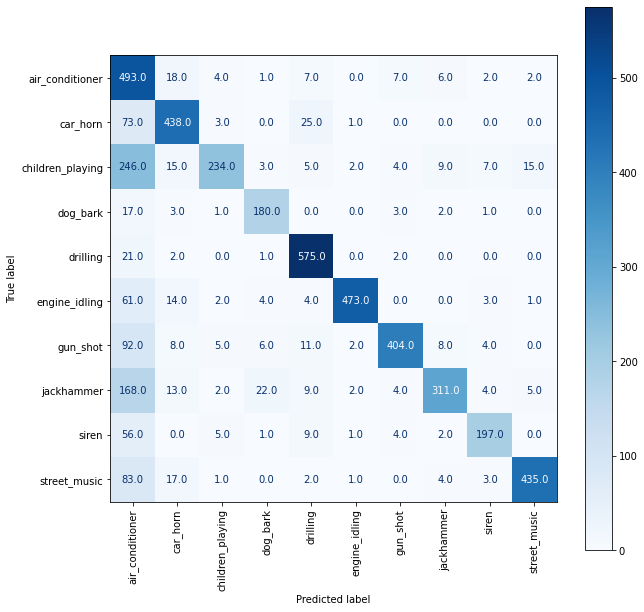

za parametre C= 50 , kernel= poly  i pristup  ovo varijansa 0.99  tacnost je:  0.7710089799908508  a mat. konf. je:
Za klasu  air_conditioner  osetljivost je:  0.9222222222222223
Za klasu  car_horn  osetljivost je:  0.8407407407407408
Za klasu  children_playing  osetljivost je:  0.4222222222222222
Za klasu  dog_bark  osetljivost je:  0.8647342995169082
Za klasu  drilling  osetljivost je:  0.961730449251248
Za klasu  engine_idiling  osetljivost je:  0.8487544483985765
Za klasu  gun_shot  osetljivost je:  0.7611111111111111
Za klasu  jackhammer  osetljivost je:  0.5888888888888889
Za klasu  siren  osetljivost je:  0.7018181818181818
Za klasu  street_music  osetljivost je:  0.7967032967032966
prosecna osetljivost je:  0.7708925860873397


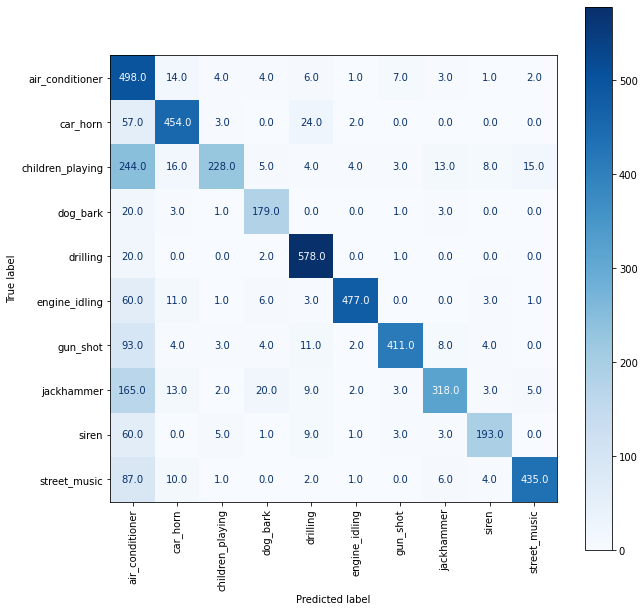

za parametre C= 100 , kernel= rbf  i pristup  ovr varijansa 0.95  tacnost je:  0.8942957527296123  a mat. konf. je:
Za klasu  air_conditioner  osetljivost je:  0.8722222222222222
Za klasu  car_horn  osetljivost je:  0.9777777777777777
Za klasu  children_playing  osetljivost je:  0.737037037037037
Za klasu  dog_bark  osetljivost je:  0.9178743961352657
Za klasu  drilling  osetljivost je:  0.9800332778702163
Za klasu  engine_idiling  osetljivost je:  0.9644128113879004
Za klasu  gun_shot  osetljivost je:  0.9166666666666666
Za klasu  jackhammer  osetljivost je:  0.7703703703703704
Za klasu  siren  osetljivost je:  0.8363636363636363
Za klasu  street_music  osetljivost je:  0.9432234432234432
prosecna osetljivost je:  0.8915981639054535


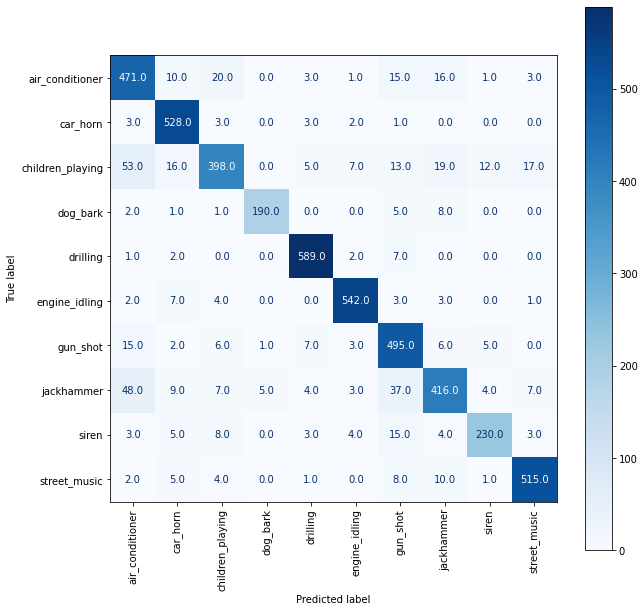

za parametre C= 100 , kernel= rbf  i pristup  ovr varijansa 0.99  tacnost je:  0.8967486960318007  a mat. konf. je:
Za klasu  air_conditioner  osetljivost je:  0.8814814814814815
Za klasu  car_horn  osetljivost je:  0.9722222222222222
Za klasu  children_playing  osetljivost je:  0.762962962962963
Za klasu  dog_bark  osetljivost je:  0.927536231884058
Za klasu  drilling  osetljivost je:  0.978369384359401
Za klasu  engine_idiling  osetljivost je:  0.9590747330960854
Za klasu  gun_shot  osetljivost je:  0.9092592592592592
Za klasu  jackhammer  osetljivost je:  0.7648148148148148
Za klasu  siren  osetljivost je:  0.8327272727272728
Za klasu  street_music  osetljivost je:  0.9542124542124543
prosecna osetljivost je:  0.8942660817020013


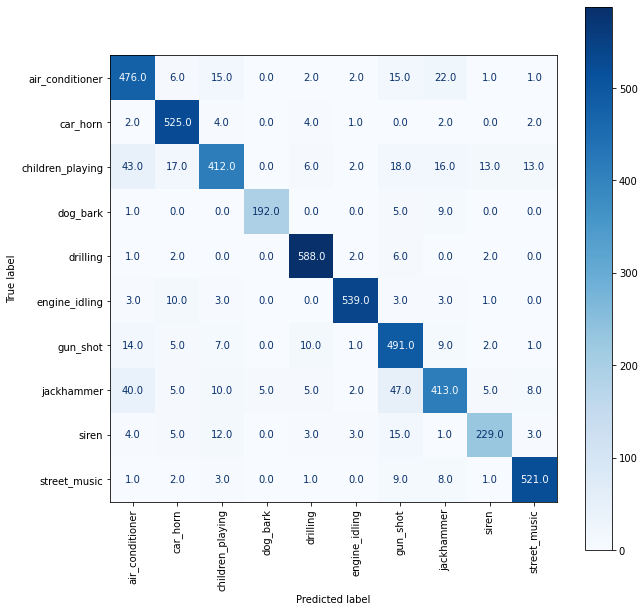

za parametre C= 100 , kernel= rbf  i pristup  ovo varijansa 0.95  tacnost je:  0.8942957527296123  a mat. konf. je:
Za klasu  air_conditioner  osetljivost je:  0.8722222222222222
Za klasu  car_horn  osetljivost je:  0.9777777777777777
Za klasu  children_playing  osetljivost je:  0.737037037037037
Za klasu  dog_bark  osetljivost je:  0.9178743961352657
Za klasu  drilling  osetljivost je:  0.9800332778702163
Za klasu  engine_idiling  osetljivost je:  0.9644128113879004
Za klasu  gun_shot  osetljivost je:  0.9166666666666666
Za klasu  jackhammer  osetljivost je:  0.7703703703703704
Za klasu  siren  osetljivost je:  0.8363636363636363
Za klasu  street_music  osetljivost je:  0.9432234432234432
prosecna osetljivost je:  0.8915981639054535


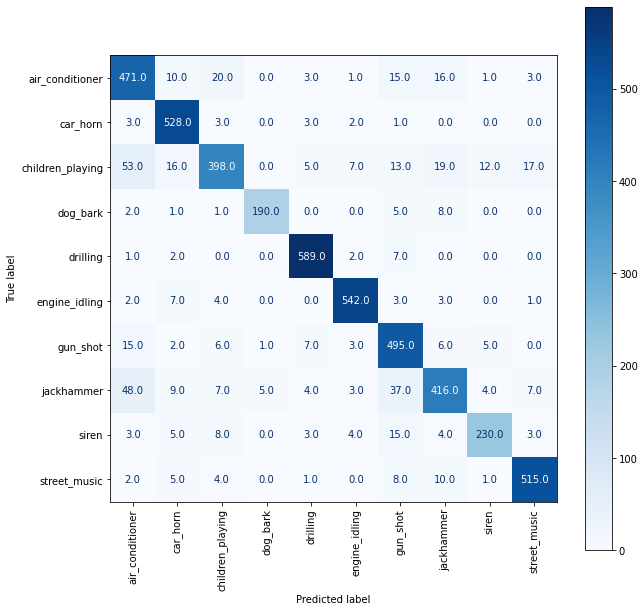

za parametre C= 100 , kernel= rbf  i pristup  ovo varijansa 0.99  tacnost je:  0.8967486960318007  a mat. konf. je:
Za klasu  air_conditioner  osetljivost je:  0.8814814814814815
Za klasu  car_horn  osetljivost je:  0.9722222222222222
Za klasu  children_playing  osetljivost je:  0.762962962962963
Za klasu  dog_bark  osetljivost je:  0.927536231884058
Za klasu  drilling  osetljivost je:  0.978369384359401
Za klasu  engine_idiling  osetljivost je:  0.9590747330960854
Za klasu  gun_shot  osetljivost je:  0.9092592592592592
Za klasu  jackhammer  osetljivost je:  0.7648148148148148
Za klasu  siren  osetljivost je:  0.8327272727272728
Za klasu  street_music  osetljivost je:  0.9542124542124543
prosecna osetljivost je:  0.8942660817020013


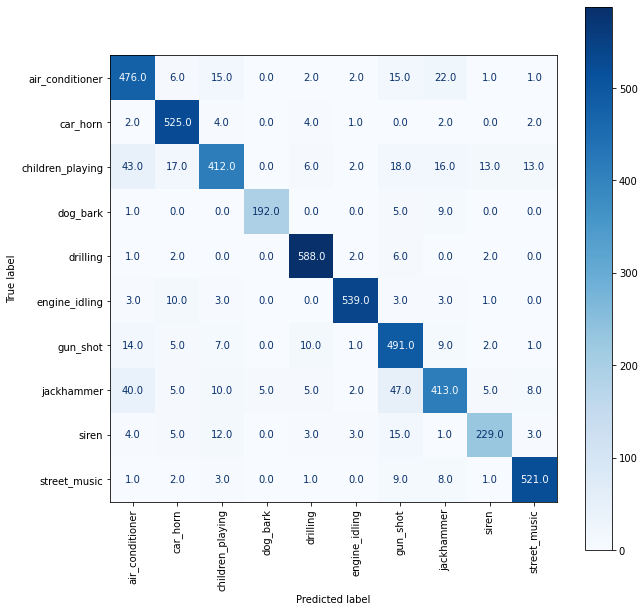

za parametre C= 100 , kernel= linear  i pristup  ovr varijansa 0.95  tacnost je:  0.778369898753162  a mat. konf. je:
Za klasu  air_conditioner  osetljivost je:  0.6907407407407408
Za klasu  car_horn  osetljivost je:  0.9
Za klasu  children_playing  osetljivost je:  0.5537037037037037
Za klasu  dog_bark  osetljivost je:  0.8743961352657005
Za klasu  drilling  osetljivost je:  0.8618968386023295
Za klasu  engine_idiling  osetljivost je:  0.8736654804270463
Za klasu  gun_shot  osetljivost je:  0.7555555555555555
Za klasu  jackhammer  osetljivost je:  0.6537037037037037
Za klasu  siren  osetljivost je:  0.76
Za klasu  street_music  osetljivost je:  0.8956043956043956
prosecna osetljivost je:  0.7819266553603176


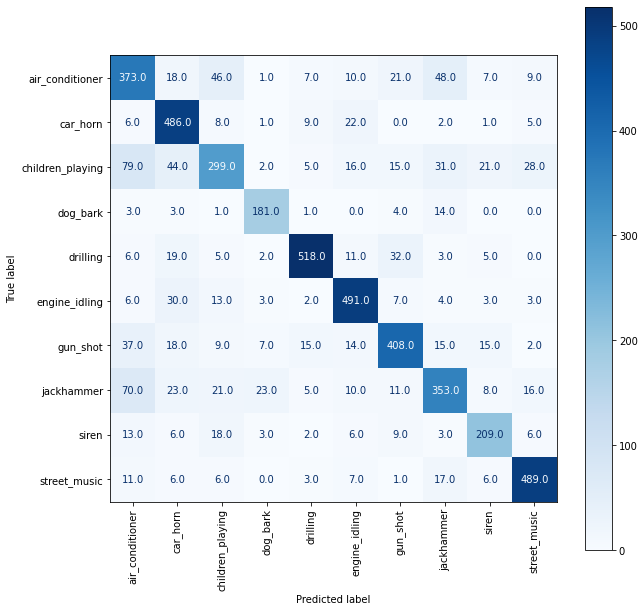

za parametre C= 100 , kernel= linear  i pristup  ovr varijansa 0.99  tacnost je:  0.7806210585903148  a mat. konf. je:
Za klasu  air_conditioner  osetljivost je:  0.6888888888888889
Za klasu  car_horn  osetljivost je:  0.9092592592592592
Za klasu  children_playing  osetljivost je:  0.5555555555555556
Za klasu  dog_bark  osetljivost je:  0.9033816425120773
Za klasu  drilling  osetljivost je:  0.870216306156406
Za klasu  engine_idiling  osetljivost je:  0.8843416370106761
Za klasu  gun_shot  osetljivost je:  0.7481481481481481
Za klasu  jackhammer  osetljivost je:  0.65
Za klasu  siren  osetljivost je:  0.7927272727272727
Za klasu  street_music  osetljivost je:  0.86996336996337
prosecna osetljivost je:  0.7872482080221654


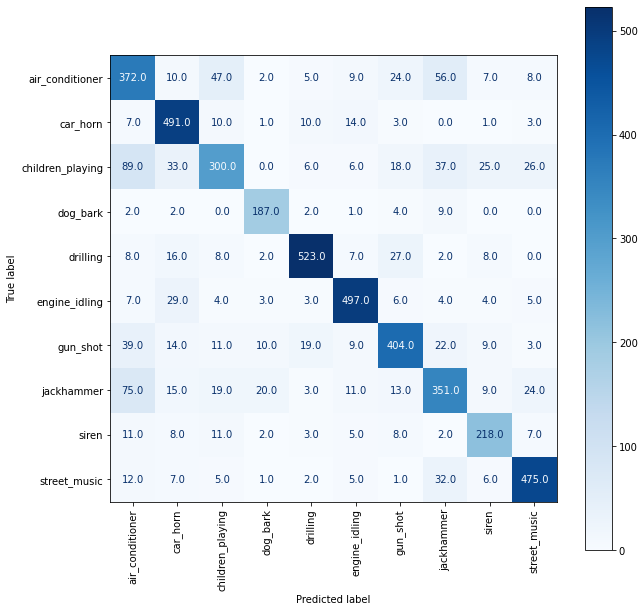

za parametre C= 100 , kernel= linear  i pristup  ovo varijansa 0.95  tacnost je:  0.778369898753162  a mat. konf. je:
Za klasu  air_conditioner  osetljivost je:  0.6907407407407408
Za klasu  car_horn  osetljivost je:  0.9
Za klasu  children_playing  osetljivost je:  0.5537037037037037
Za klasu  dog_bark  osetljivost je:  0.8743961352657005
Za klasu  drilling  osetljivost je:  0.8618968386023295
Za klasu  engine_idiling  osetljivost je:  0.8736654804270463
Za klasu  gun_shot  osetljivost je:  0.7555555555555555
Za klasu  jackhammer  osetljivost je:  0.6537037037037037
Za klasu  siren  osetljivost je:  0.76
Za klasu  street_music  osetljivost je:  0.8956043956043956
prosecna osetljivost je:  0.7819266553603176


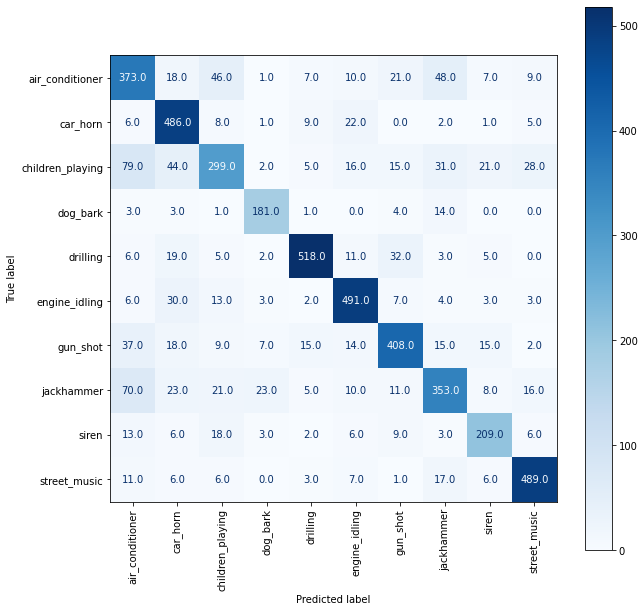

za parametre C= 100 , kernel= linear  i pristup  ovo varijansa 0.99  tacnost je:  0.7806210585903148  a mat. konf. je:
Za klasu  air_conditioner  osetljivost je:  0.6888888888888889
Za klasu  car_horn  osetljivost je:  0.9092592592592592
Za klasu  children_playing  osetljivost je:  0.5555555555555556
Za klasu  dog_bark  osetljivost je:  0.9033816425120773
Za klasu  drilling  osetljivost je:  0.870216306156406
Za klasu  engine_idiling  osetljivost je:  0.8843416370106761
Za klasu  gun_shot  osetljivost je:  0.7481481481481481
Za klasu  jackhammer  osetljivost je:  0.65
Za klasu  siren  osetljivost je:  0.7927272727272727
Za klasu  street_music  osetljivost je:  0.86996336996337
prosecna osetljivost je:  0.7872482080221654


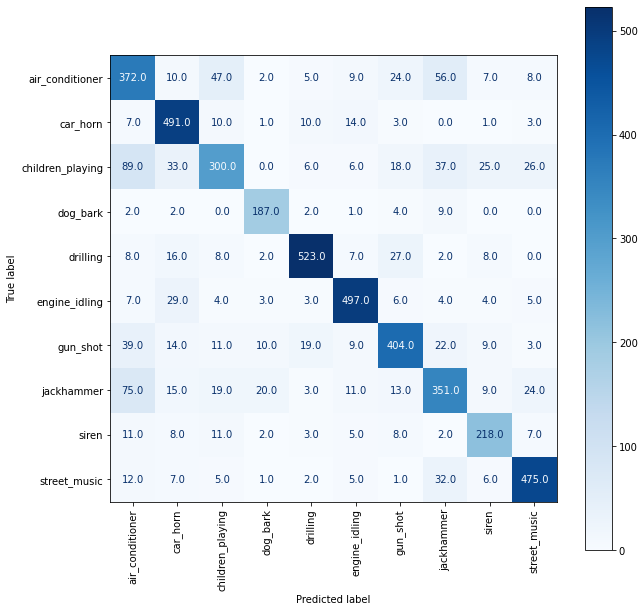

za parametre C= 100 , kernel= poly  i pristup  ovr varijansa 0.95  tacnost je:  0.8090395232395645  a mat. konf. je:
Za klasu  air_conditioner  osetljivost je:  0.9111111111111111
Za klasu  car_horn  osetljivost je:  0.912962962962963
Za klasu  children_playing  osetljivost je:  0.5037037037037037
Za klasu  dog_bark  osetljivost je:  0.9178743961352657
Za klasu  drilling  osetljivost je:  0.9650582362728786
Za klasu  engine_idiling  osetljivost je:  0.8896797153024911
Za klasu  gun_shot  osetljivost je:  0.7962962962962963
Za klasu  jackhammer  osetljivost je:  0.6111111111111112
Za klasu  siren  osetljivost je:  0.7381818181818182
Za klasu  street_music  osetljivost je:  0.8553113553113553
prosecna osetljivost je:  0.8101290706388994


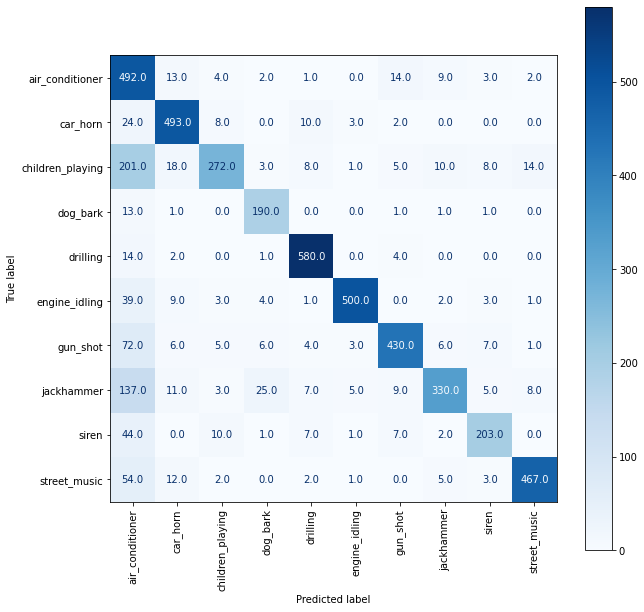

za parametre C= 100 , kernel= poly  i pristup  ovr varijansa 0.99  tacnost je:  0.8157871539549351  a mat. konf. je:
Za klasu  air_conditioner  osetljivost je:  0.9277777777777778
Za klasu  car_horn  osetljivost je:  0.9277777777777778
Za klasu  children_playing  osetljivost je:  0.5092592592592593
Za klasu  dog_bark  osetljivost je:  0.9130434782608695
Za klasu  drilling  osetljivost je:  0.9717138103161398
Za klasu  engine_idiling  osetljivost je:  0.900355871886121
Za klasu  gun_shot  osetljivost je:  0.7962962962962963
Za klasu  jackhammer  osetljivost je:  0.6185185185185185
Za klasu  siren  osetljivost je:  0.7454545454545455
Za klasu  street_music  osetljivost je:  0.8516483516483516
prosecna osetljivost je:  0.8161845687195657


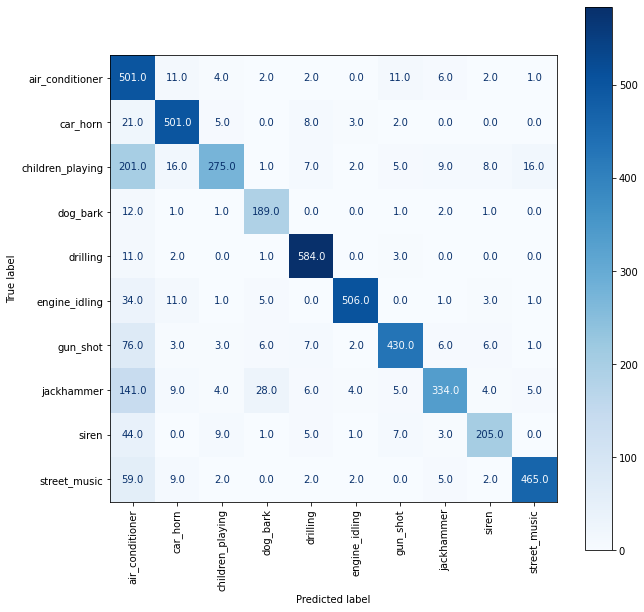

za parametre C= 100 , kernel= poly  i pristup  ovo varijansa 0.95  tacnost je:  0.8090395232395645  a mat. konf. je:
Za klasu  air_conditioner  osetljivost je:  0.9111111111111111
Za klasu  car_horn  osetljivost je:  0.912962962962963
Za klasu  children_playing  osetljivost je:  0.5037037037037037
Za klasu  dog_bark  osetljivost je:  0.9178743961352657
Za klasu  drilling  osetljivost je:  0.9650582362728786
Za klasu  engine_idiling  osetljivost je:  0.8896797153024911
Za klasu  gun_shot  osetljivost je:  0.7962962962962963
Za klasu  jackhammer  osetljivost je:  0.6111111111111112
Za klasu  siren  osetljivost je:  0.7381818181818182
Za klasu  street_music  osetljivost je:  0.8553113553113553
prosecna osetljivost je:  0.8101290706388994


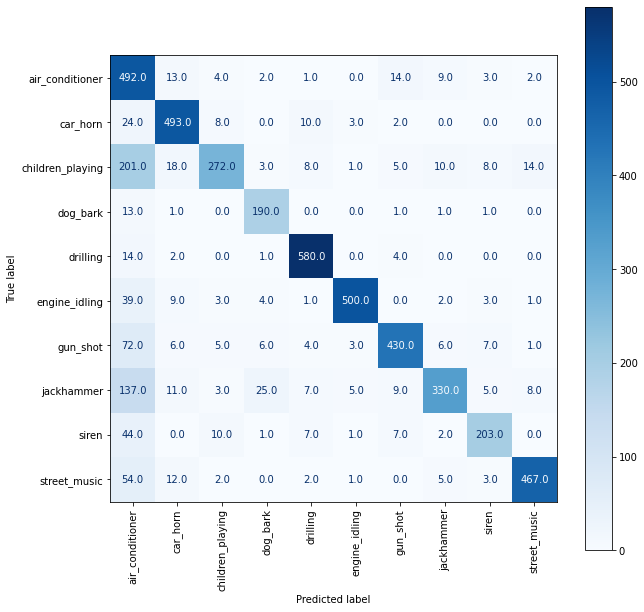

za parametre C= 100 , kernel= poly  i pristup  ovo varijansa 0.99  tacnost je:  0.8157871539549351  a mat. konf. je:
Za klasu  air_conditioner  osetljivost je:  0.9277777777777778
Za klasu  car_horn  osetljivost je:  0.9277777777777778
Za klasu  children_playing  osetljivost je:  0.5092592592592593
Za klasu  dog_bark  osetljivost je:  0.9130434782608695
Za klasu  drilling  osetljivost je:  0.9717138103161398
Za klasu  engine_idiling  osetljivost je:  0.900355871886121
Za klasu  gun_shot  osetljivost je:  0.7962962962962963
Za klasu  jackhammer  osetljivost je:  0.6185185185185185
Za klasu  siren  osetljivost je:  0.7454545454545455
Za klasu  street_music  osetljivost je:  0.8516483516483516
prosecna osetljivost je:  0.8161845687195657


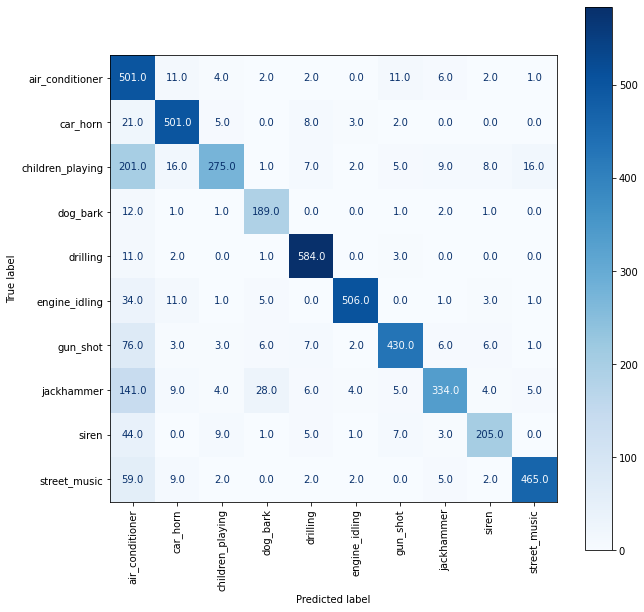

najbolja tacnost je u iteraciji broj:  37


In [ ]:

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
acc = []
for c in [10,20,50,100]:#1,5,
    for F in ['rbf','linear','poly']:
        for mc in ['ovr','ovo']:#,'ovo'
          for var in [0.95,0.99]:#0.9,0.95,
            indexes = kf.split(X_train, y_train) #delim trening na trening i validacioni skup
            acc_tmp = []
            fin_conf_mat = np.zeros((len(np.unique(y_train)),len(np.unique(y_train))))
            for train_index, val_index in indexes:

                x_t1=X_train.iloc[train_index,:] #nije normalizovano
                y_t=y_train.iloc[train_index] 
                x_val1=X_train.iloc[val_index,:] #nije normalizovano
                y_val=y_train.iloc[val_index]

                scaler = StandardScaler()
                scaler.fit(x_t1)              #parametri za norm izracunati nad trening skupom

                x_t = scaler.transform(x_t1)
                x_val = scaler.transform(x_val1)
                x_t = pd.DataFrame(x_t, index=x_t1.index, columns=x_t1.columns)
                x_val = pd.DataFrame(x_val, index=x_val1.index, columns=x_val1.columns)        #normalizovani trening i test skup nad kojim radim upsampling

                pca = PCA(n_components=var)
                pca.fit(x_t)
                x_train_r = pca.transform(x_t)
                x_val_r = pca.transform(x_val)
                x_train_r = pd.DataFrame(x_train_r, index=x_t.index) 
                x_val_r = pd.DataFrame(x_val_r, index=x_val.index)

                nedupl_ind = y_t.loc[(y_t!='car_horn')&(y_t!='gun_shot')].index #tu ce biti oni koji se ne dupliraju
                dupl_ind = y_t.loc[(y_t=='car_horn')|(y_t=='gun_shot')].index #tu ce biti svi oni koji se dupliraju
                y_upsample = y_t.copy(deep=True)
                X_upsample = x_train_r.copy(deep=True)

                X_dupl = x_train_r.loc[dupl_ind,:]
                X_duplicated = pd.concat([X_dupl]*2, ignore_index=True)
                X_upsample = X_duplicated.append(x_train_r.loc[nedupl_ind,:], ignore_index=True)

                y_dupl = y_t.loc[dupl_ind]
                y_duplicated = pd.concat([y_dupl]*2, ignore_index=True)
                y_upsample = y_duplicated.append(y_t.loc[nedupl_ind], ignore_index=True)

                classifier = SVC(C=c, kernel=F, decision_function_shape=mc)
                classifier.fit(X_upsample,y_upsample)
                y_pred = classifier.predict(x_val_r)
                acc_tmp.append(accuracy_score(y_val, y_pred))
                fin_conf_mat += confusion_matrix(y_val, y_pred)

            print('za parametre C=', c, ', kernel=', F, ' i pristup ', mc, 'varijansa', var, ' tacnost je: ', np.mean(acc_tmp),
                  ' a mat. konf. je:')
            print('prosecna osetljivost je: ', osetljivost_po_klasi(fin_conf_mat, niz))
            #print(fin_conf_mat)

            disp = ConfusionMatrixDisplay(confusion_matrix =fin_conf_mat,  display_labels=classifier.classes_,)
            fig, ax = plt.subplots(figsize=(10,10))
            disp.plot(cmap="Blues", values_format='', xticks_rotation=90,ax=ax)  
            plt.show()

            acc.append(np.mean(acc_tmp))
print('najbolja tacnost je u iteraciji broj: ', np.argmax(acc))


Za konacno odabrane parametre

Za klasu  air_conditioner  osetljivost je:  0.9722222222222222
Za klasu  car_horn  osetljivost je:  0.8327272727272728
Za klasu  children_playing  osetljivost je:  0.8814814814814815
Za klasu  dog_bark  osetljivost je:  0.7648148148148148
Za klasu  drilling  osetljivost je:  0.9092592592592592
Za klasu  engine_idiling  osetljivost je:  0.9590747330960854
Za klasu  gun_shot  osetljivost je:  0.927536231884058
Za klasu  jackhammer  osetljivost je:  0.978369384359401
Za klasu  siren  osetljivost je:  0.9542124542124543
Za klasu  street_music  osetljivost je:  0.762962962962963
prosecna osetljivost je:  0.8942660817020013
tacnost je:  0.8967486960318007  a mat. konf. je:


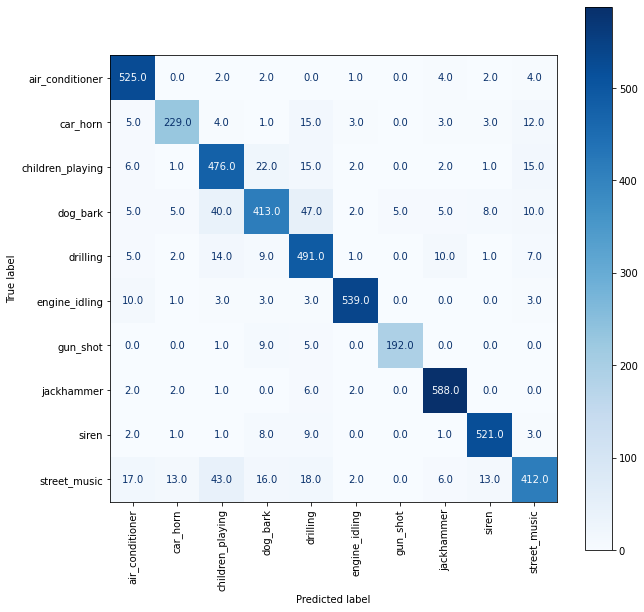

In [ ]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
acc = []
acc_tmp = []
indexes = kf.split(X_train, y_train)
fin_conf_mat1 = np.zeros((len(np.unique(y_train)),len(np.unique(y_train))))
for train_index, val_index in indexes:

            x_t1=X_train.iloc[train_index,:] #nije normalizovano
            y_t=y_train.iloc[train_index] 
            x_val1=X_train.iloc[val_index,:] #nije normalizovano
            y_val=y_train.iloc[val_index]

            scaler = StandardScaler()
            scaler.fit(x_t1)              #parametri za norm izracunati nad trening skupom

            x_t = scaler.transform(x_t1)
            x_val = scaler.transform(x_val1)
            x_t = pd.DataFrame(x_t, index=x_t1.index, columns=x_t1.columns)
            x_val = pd.DataFrame(x_val, index=x_val1.index, columns=x_val1.columns)        #normalizovani trening i test skup nad kojim radim upsampling

            pca = PCA(n_components=0.99)
            pca.fit(x_t)
            x_train_r = pca.transform(x_t)
            x_val_r = pca.transform(x_val)
            x_train_r = pd.DataFrame(x_train_r, index=x_t.index) 
            x_val_r = pd.DataFrame(x_val_r, index=x_val.index)

            nedupl_ind = y_t.loc[(y_t!='car_horn')&(y_t!='gun_shot')].index #tu ce biti oni koji se ne dupliraju
            dupl_ind = y_t.loc[(y_t=='car_horn')|(y_t=='gun_shot')].index #tu ce biti svi oni koji se dupliraju
            y_upsample1 = y_t.copy(deep=True)
            X_upsample1 = x_train_r.copy(deep=True)

            X_dupl = x_train_r.loc[dupl_ind,:]
            X_duplicated = pd.concat([X_dupl]*2, ignore_index=True)
            X_upsample1 = X_duplicated.append(x_train_r.loc[nedupl_ind,:], ignore_index=True)

            y_dupl = y_t.loc[dupl_ind]
            y_duplicated = pd.concat([y_dupl]*2, ignore_index=True)
            y_upsample1 = y_duplicated.append(y_t.loc[nedupl_ind], ignore_index=True)

            classifier = SVC(C=100, kernel='rbf', decision_function_shape='ovr')
            classifier.fit(X_upsample1, y_upsample1)
            y_pred = classifier.predict(x_val_r)

            acc_tmp.append(accuracy_score(y_val, y_pred))
            #print(confusion_matrix(y_undersample.iloc[val_index], y_pred, labels=labels_y))
            fin_conf_mat1 += confusion_matrix(y_val, y_pred)
            acc_tmp.append(accuracy_score(y_val, y_pred))

            

print('prosecna osetljivost je: ', osetljivost_po_klasi(fin_conf_mat1, niz))            
print('tacnost je: ', np.mean(acc_tmp),
                  ' a mat. konf. je:')
        
disp = ConfusionMatrixDisplay(confusion_matrix =fin_conf_mat1,  display_labels=classifier.classes_,)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(cmap="Blues", values_format='', xticks_rotation=90,ax=ax)  
plt.show()

In [ ]:
print('prosecna tacnost je: ', tacnost_po_klasi(fin_conf_mat1, niz))

Za klasu  air_conditioner  tacnost je:  0.9863013698630136
Za klasu  car_horn  tacnost je:  0.985483541198119
Za klasu  children_playing  tacnost je:  0.964628910243304
Za klasu  dog_bark  tacnost je:  0.9597219382539358
Za klasu  drilling  tacnost je:  0.965855653240646
Za klasu  engine_idiling  tacnost je:  0.9926395420159476
Za klasu  gun_shot  tacnost je:  0.9959108566755265
Za klasu  jackhammer  tacnost je:  0.9910038846861583
Za klasu  siren  tacnost je:  0.9891637701901451
Za klasu  street_music  tacnost je:  0.9627887957472909
prosecna tacnost je:  0.9793498262114089


In [ ]:
print('prosecna osetljivost je: ', osetljivost_po_klasi(fin_conf_mat1, niz))

Za klasu  air_conditioner  osetljivost je:  0.9722222222222222
Za klasu  car_horn  osetljivost je:  0.8327272727272728
Za klasu  children_playing  osetljivost je:  0.8814814814814815
Za klasu  dog_bark  osetljivost je:  0.7648148148148148
Za klasu  drilling  osetljivost je:  0.9092592592592592
Za klasu  engine_idiling  osetljivost je:  0.9590747330960854
Za klasu  gun_shot  osetljivost je:  0.927536231884058
Za klasu  jackhammer  osetljivost je:  0.978369384359401
Za klasu  siren  osetljivost je:  0.9542124542124543
Za klasu  street_music  osetljivost je:  0.762962962962963
prosecna osetljivost je:  0.8942660817020013


Normalizacija

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
x_train_std = scaler.transform(X_train)
x_test_std = scaler.transform(X_test)
x_train_std = pd.DataFrame(x_train_std, index=X_train.index, columns=X_train.columns)
x_test_std = pd.DataFrame(x_test_std, index=X_test.index, columns=X_test.columns)

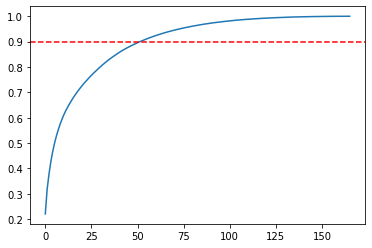

In [ ]:
pca = PCA(n_components=None)
pca.fit(x_train_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(y = 0.9, color = 'r', linestyle = '--')
plt.show()

pca

In [ ]:
# SA PCA
pca = PCA(n_components=0.99)
pca.fit(x_train_std)
x_train_r = pca.transform(x_train_std)
x_test_r = pca.transform(x_test_std)
x_train_r = pd.DataFrame(x_train_r, index=X_train.index) 
x_test_r = pd.DataFrame(x_test_r, index=X_test.index)
print('Redukovani prostor ima dimenziju: ', pca.n_components_)


Redukovani prostor ima dimenziju:  115


upsamling

In [ ]:
nedupl_ind = y_train.loc[(y_train!='car_horn')&(y_train!='gun_shot')].index #tu ce biti oni koji se ne dupliraju
dupl_ind = y_train.loc[(y_train=='car_horn')|(y_train=='gun_shot')].index #tu ce biti svi oni koji se dupliraju
y_upsample = y_train.copy(deep=True)
X_upsample = x_train_r.copy(deep=True)

X_dupl = x_train_r.loc[dupl_ind,:]
X_duplicated = pd.concat([X_dupl]*2, ignore_index=True)
X_upsample = X_duplicated.append(x_train_r.loc[nedupl_ind,:], ignore_index=True)

y_dupl = y_train.loc[dupl_ind]
y_duplicated = pd.concat([y_dupl]*2, ignore_index=True)
y_upsample = y_duplicated.append(y_train.loc[nedupl_ind], ignore_index=True)

finalni model

[[59  0  0  0  0  0  0  0  1  0]
 [ 0 26  1  1  1  1  0  0  0  1]
 [ 0  0 57  0  0  0  0  0  1  2]
 [ 0  2  6 47  4  0  0  0  0  1]
 [ 0  0  0  0 57  0  0  1  0  2]
 [ 0  1  0  0  0 60  1  0  0  0]
 [ 1  0  0  0  0  0 22  0  0  0]
 [ 0  0  0  1  1  0  0 65  0  0]
 [ 0  0  1  1  2  0  0  0 56  1]
 [ 3  0  4  0  1  0  0  0  2 50]]


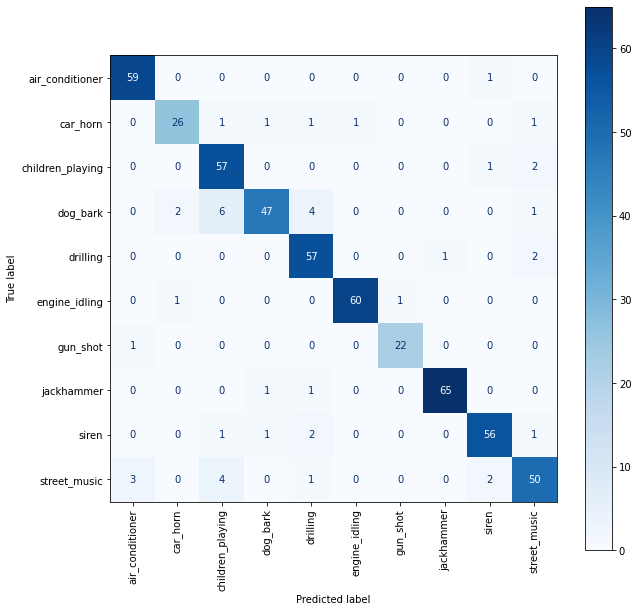

In [ ]:
classifier_svm = SVC(C=100, kernel='rbf', decision_function_shape='ovr', probability=True)
classifier_svm.fit(X_upsample, y_upsample)
y_pred = classifier_svm.predict(x_test_r)
conf_mat1 = confusion_matrix(y_test, y_pred)
print(conf_mat1)

disp = ConfusionMatrixDisplay(confusion_matrix =conf_mat1,  display_labels=classifier_svm.classes_,)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(cmap="Blues", values_format='', xticks_rotation=90,ax=ax)  
plt.show()


In [ ]:
print('prosecna osetljivost je: ', osetljivost_po_klasi(conf_mat1, niz))

Za klasu  air_conditioner  osetljivost je:  0.9833333333333333
Za klasu  car_horn  osetljivost je:  0.8387096774193549
Za klasu  children_playing  osetljivost je:  0.95
Za klasu  dog_bark  osetljivost je:  0.7833333333333333
Za klasu  drilling  osetljivost je:  0.95
Za klasu  engine_idiling  osetljivost je:  0.967741935483871
Za klasu  gun_shot  osetljivost je:  0.9565217391304348
Za klasu  jackhammer  osetljivost je:  0.9701492537313433
Za klasu  siren  osetljivost je:  0.9180327868852459
Za klasu  street_music  osetljivost je:  0.8333333333333334
prosecna osetljivost je:  0.9151155392650251


In [ ]:
print('prosecna specificnost je: ', specificnost_po_klasi(conf_mat1, niz))

Za klasu  air_conditioner  specificnost je:  0.9917355371900827
Za klasu  car_horn  specificnost je:  0.9941520467836257
Za klasu  children_playing  specificnost je:  0.9752066115702479
Za klasu  dog_bark  specificnost je:  0.993801652892562
Za klasu  drilling  specificnost je:  0.981404958677686
Za klasu  engine_idiling  specificnost je:  0.9979253112033195
Za klasu  gun_shot  specificnost je:  0.9980806142034548
Za klasu  jackhammer  specificnost je:  0.9979035639412998
Za klasu  siren  specificnost je:  0.9917184265010351
Za klasu  street_music  specificnost je:  0.9855371900826446
prosecna specificnost je:  0.9907465913045957


In [ ]:
print('prosecna preciznost je: ', preciznost_po_klasi(conf_mat1, niz))

Za klasu  air_conditioner  preciznost je:  0.9365079365079365
Za klasu  car_horn  preciznost je:  0.896551724137931
Za klasu  children_playing  preciznost je:  0.8260869565217391
Za klasu  dog_bark  preciznost je:  0.94
Za klasu  drilling  preciznost je:  0.8636363636363636
Za klasu  engine_idiling  preciznost je:  0.9836065573770492
Za klasu  gun_shot  preciznost je:  0.9565217391304348
Za klasu  jackhammer  preciznost je:  0.9848484848484849
Za klasu  siren  preciznost je:  0.9333333333333333
Za klasu  street_music  preciznost je:  0.8771929824561403
prosecna preciznost je:  0.9198286077949414


In [ ]:
print('prosecna tacnost je: ', tacnost_po_klasi(conf_mat1, niz))

Za klasu  air_conditioner  tacnost je:  0.9908088235294118
Za klasu  car_horn  tacnost je:  0.9852941176470589
Za klasu  children_playing  tacnost je:  0.9724264705882353
Za klasu  dog_bark  tacnost je:  0.9705882352941176
Za klasu  drilling  tacnost je:  0.9779411764705882
Za klasu  engine_idiling  tacnost je:  0.9944852941176471
Za klasu  gun_shot  tacnost je:  0.9963235294117647
Za klasu  jackhammer  tacnost je:  0.9944852941176471
Za klasu  siren  tacnost je:  0.9834558823529411
Za klasu  street_music  tacnost je:  0.96875
prosecna tacnost je:  0.9834558823529411


In [ ]:
print('procenat pogodjenih uzoraka: ', accuracy_score(y_test, y_pred))
print('preciznost mikro: ', precision_score(y_test, y_pred, average='micro'))
print('preciznost makro: ', precision_score(y_test, y_pred, average='macro'))
print('osetljivost mikro: ', recall_score(y_test, y_pred, average='micro'))
print('osetljivost makro: ', recall_score(y_test, y_pred, average='macro'))
print('f mera mikro: ', f1_score(y_test, y_pred, average='micro'))
print('f mera makro: ', f1_score(y_test, y_pred, average='macro'))

procenat pogodjenih uzoraka:  0.9172794117647058
preciznost mikro:  0.9172794117647058
preciznost makro:  0.9198286077949414
osetljivost mikro:  0.9172794117647058
osetljivost makro:  0.9151155392650251
f mera mikro:  0.9172794117647058
f mera makro:  0.9158940343364671


**NEURALNE MREZE**

krosvaidacija

za parametre a= relu  i s= adam  i hidden_layer= 80 b= 64 tacnost je:  0.8904123610127609  a mat. konf. je:


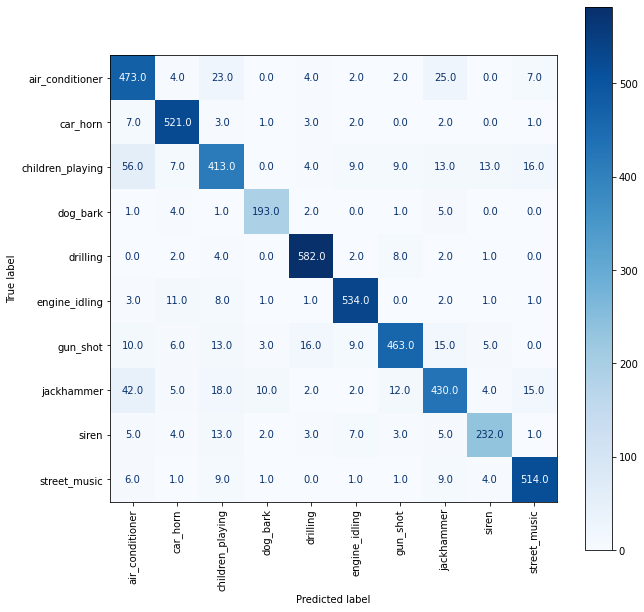

za parametre a= relu  i s= adam  i hidden_layer= 80 b= 100 tacnost je:  0.8887769958494436  a mat. konf. je:


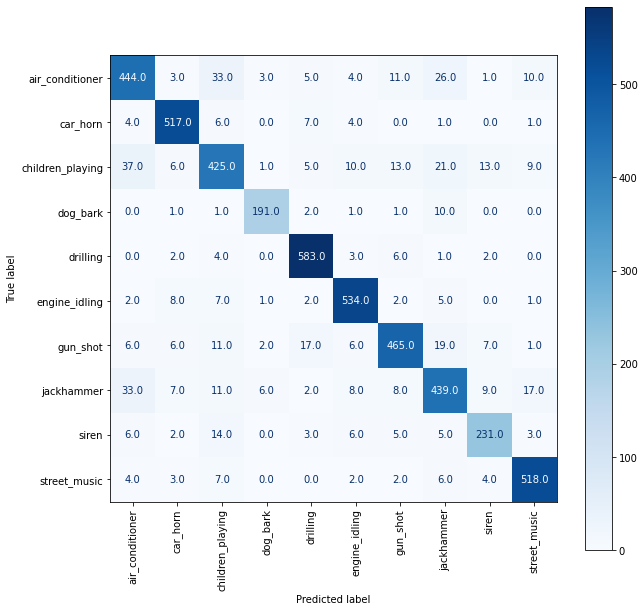

za parametre a= relu  i s= adam  i hidden_layer= 100 b= 64 tacnost je:  0.907382016205343  a mat. konf. je:


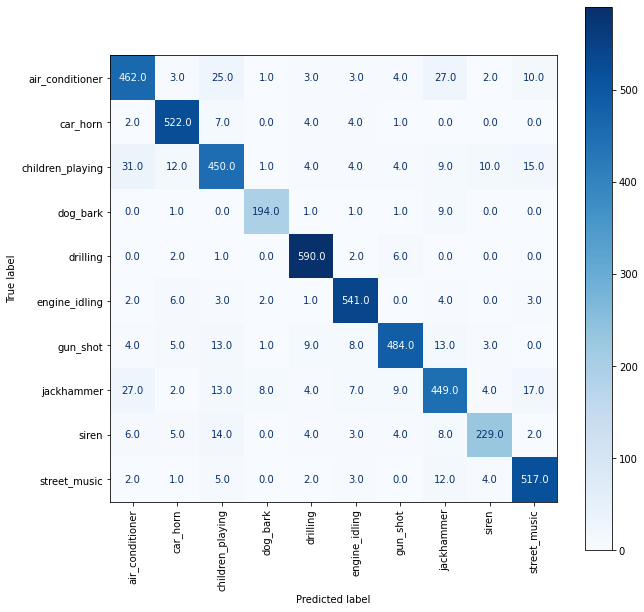

za parametre a= relu  i s= adam  i hidden_layer= 100 b= 100 tacnost je:  0.9061550223403121  a mat. konf. je:


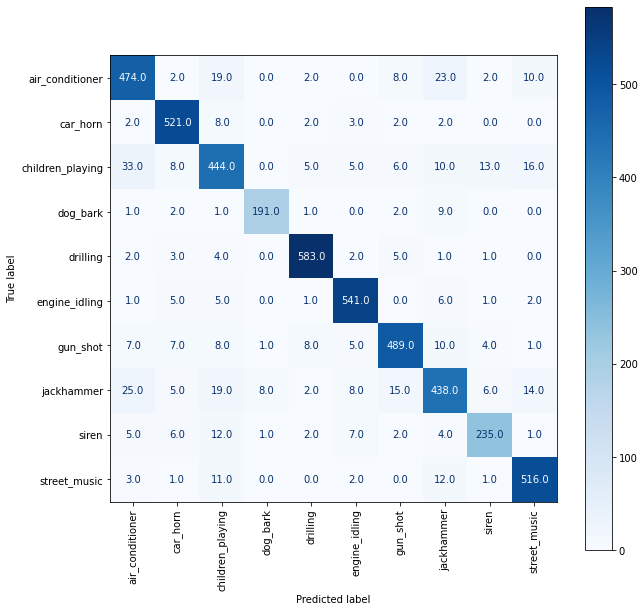

za parametre a= relu  i s= adam  i hidden_layer= 150 b= 64 tacnost je:  0.9090163369407872  a mat. konf. je:


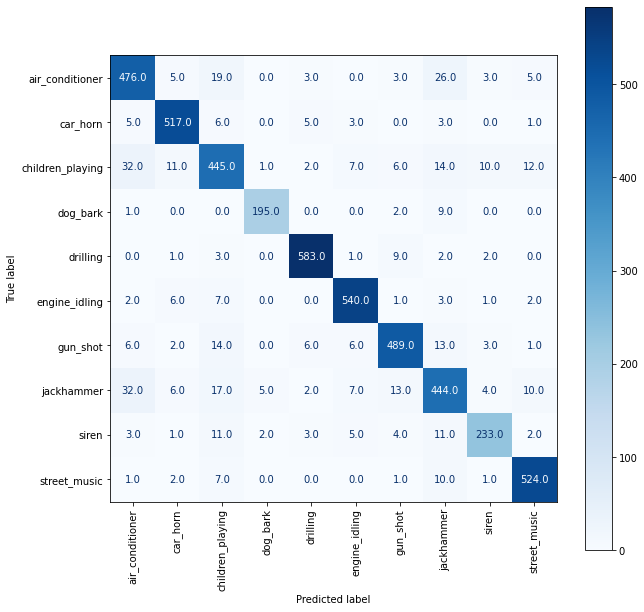

za parametre a= relu  i s= adam  i hidden_layer= 150 b= 100 tacnost je:  0.9051325274527866  a mat. konf. je:


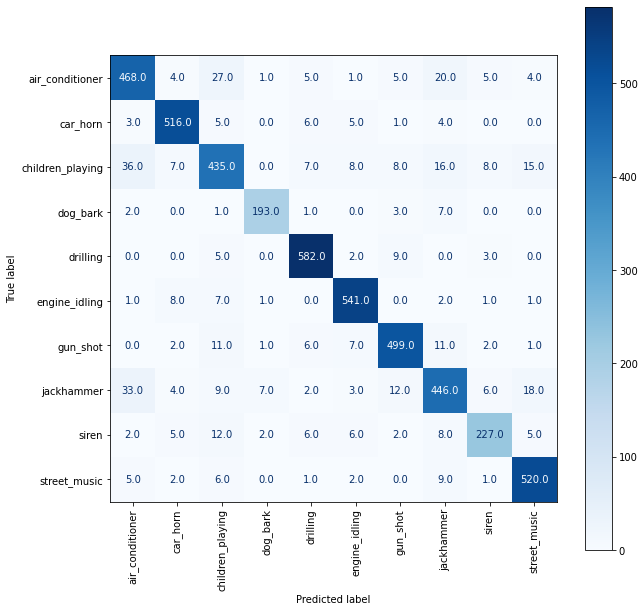

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


za parametre a= relu  i s= sgd  i hidden_layer= 80 b= 64 tacnost je:  0.8781447201037743  a mat. konf. je:


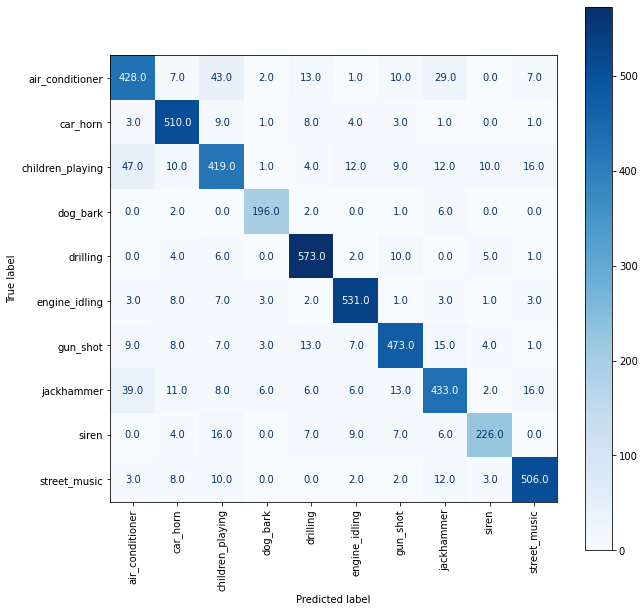

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


za parametre a= relu  i s= sgd  i hidden_layer= 80 b= 100 tacnost je:  0.8693535618123749  a mat. konf. je:


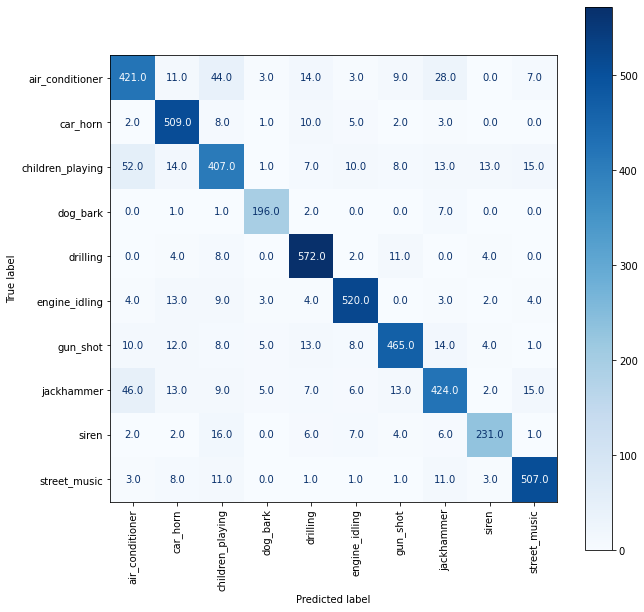

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


za parametre a= relu  i s= sgd  i hidden_layer= 100 b= 64 tacnost je:  0.8963422047036854  a mat. konf. je:


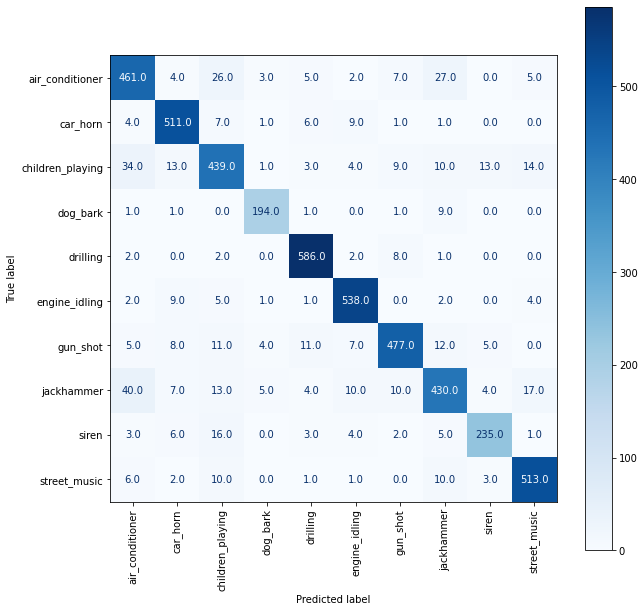

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


za parametre a= relu  i s= sgd  i hidden_layer= 100 b= 100 tacnost je:  0.8722129964426786  a mat. konf. je:


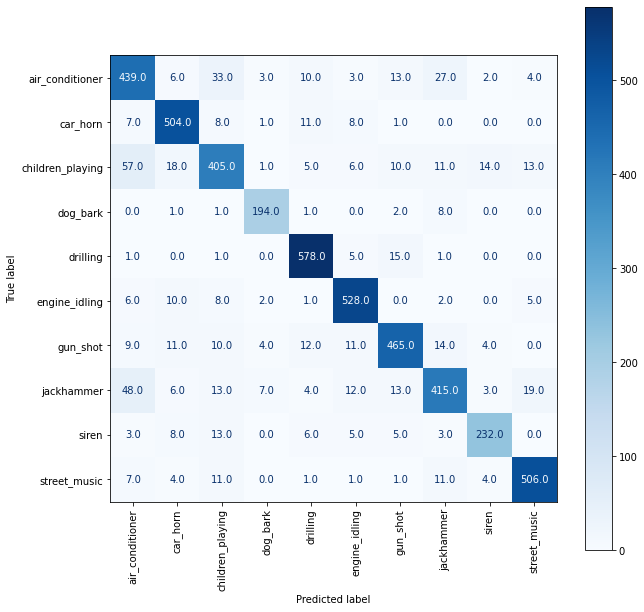

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


za parametre a= relu  i s= sgd  i hidden_layer= 150 b= 64 tacnost je:  0.8965485836513615  a mat. konf. je:


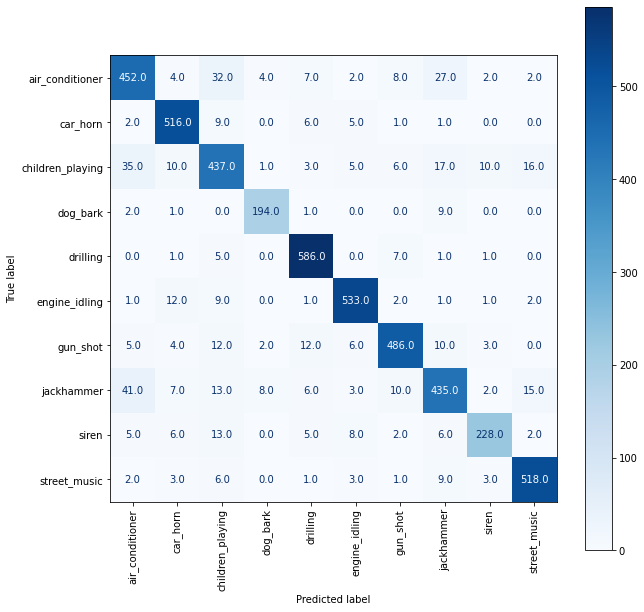

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


za parametre a= relu  i s= sgd  i hidden_layer= 150 b= 100 tacnost je:  0.8906153977912439  a mat. konf. je:


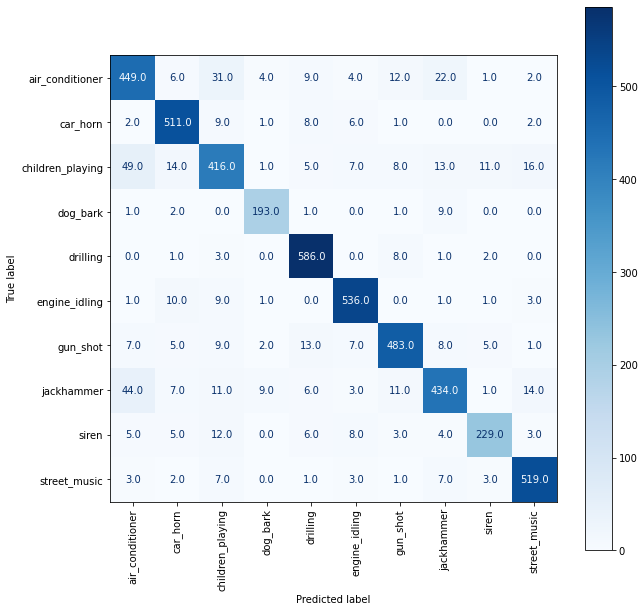

za parametre a= identity  i s= adam  i hidden_layer= 80 b= 64 tacnost je:  0.6863687540602134  a mat. konf. je:


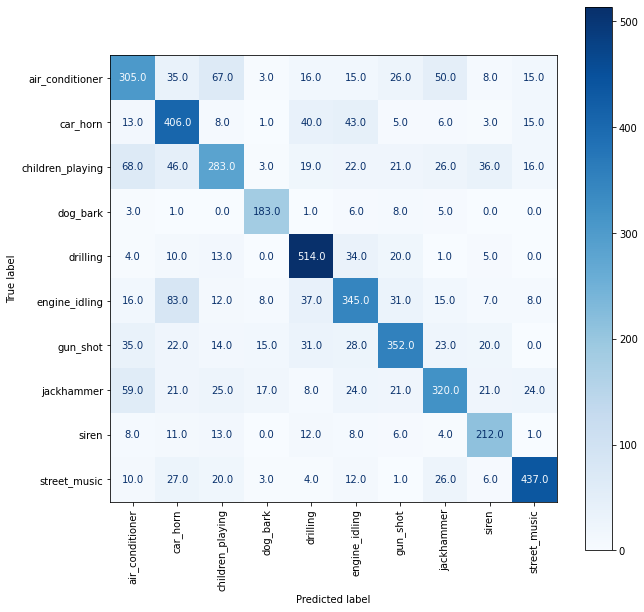

za parametre a= identity  i s= adam  i hidden_layer= 80 b= 100 tacnost je:  0.6937275839667789  a mat. konf. je:


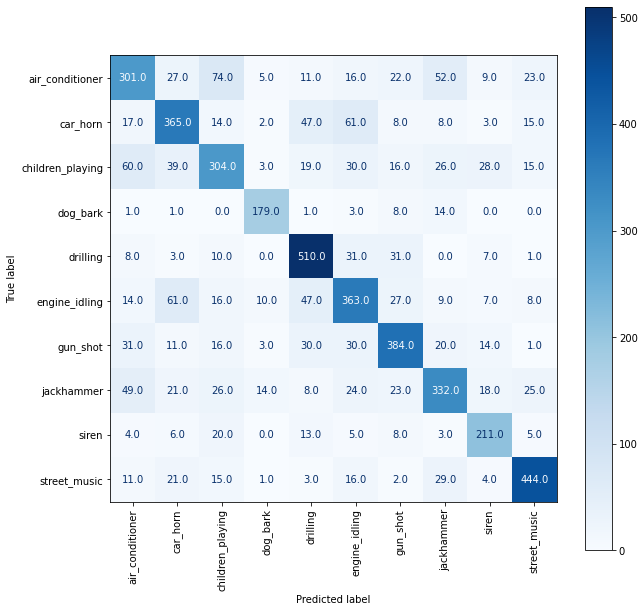

za parametre a= identity  i s= adam  i hidden_layer= 100 b= 64 tacnost je:  0.6918858398557853  a mat. konf. je:


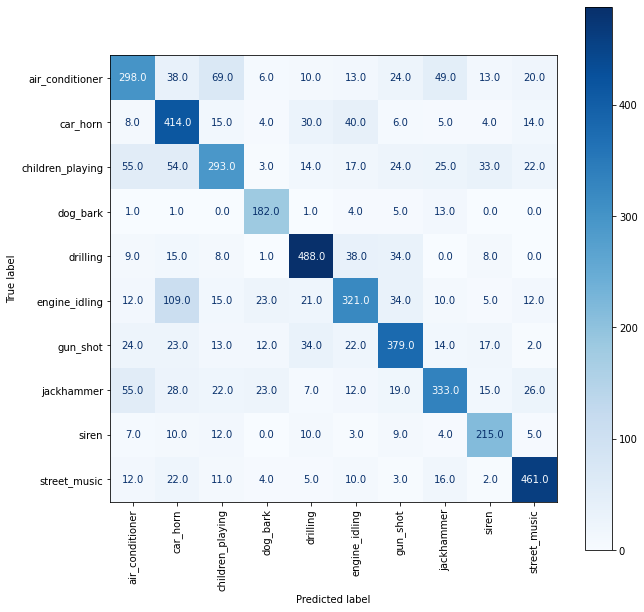

za parametre a= identity  i s= adam  i hidden_layer= 100 b= 100 tacnost je:  0.701087040530068  a mat. konf. je:


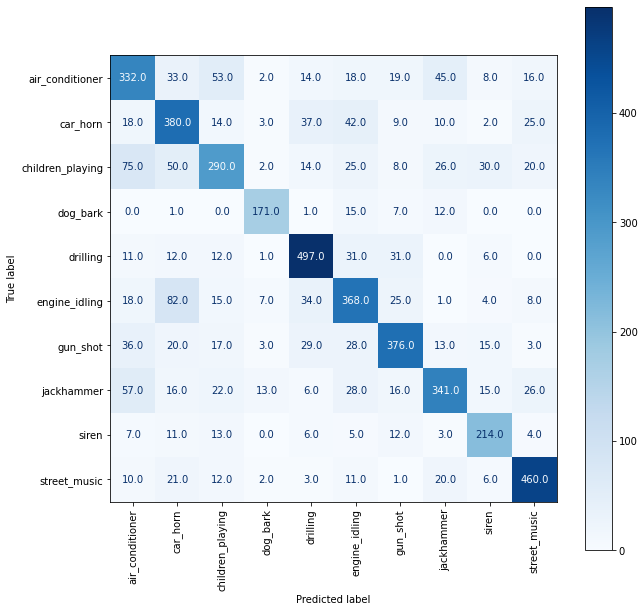

za parametre a= identity  i s= adam  i hidden_layer= 150 b= 64 tacnost je:  0.6894341498670443  a mat. konf. je:


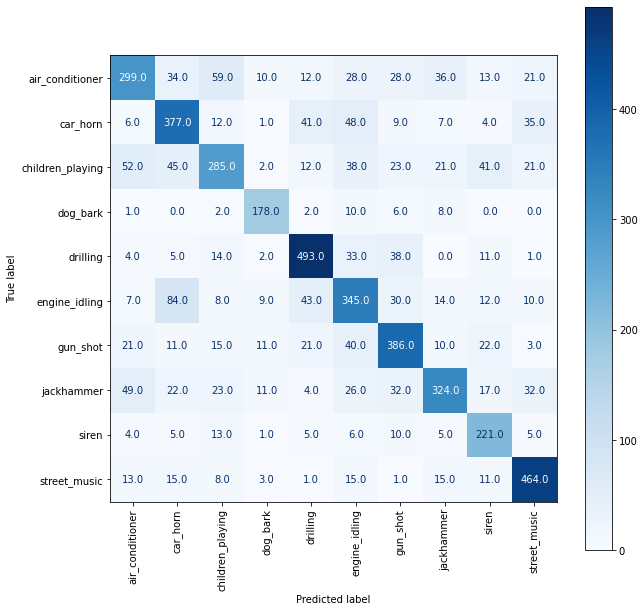

za parametre a= identity  i s= adam  i hidden_layer= 150 b= 100 tacnost je:  0.6918870931692328  a mat. konf. je:


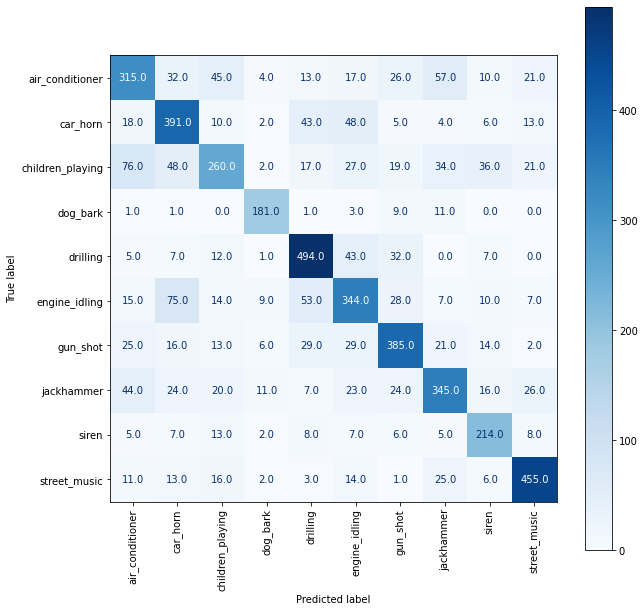

za parametre a= identity  i s= sgd  i hidden_layer= 80 b= 64 tacnost je:  0.7186706104263145  a mat. konf. je:


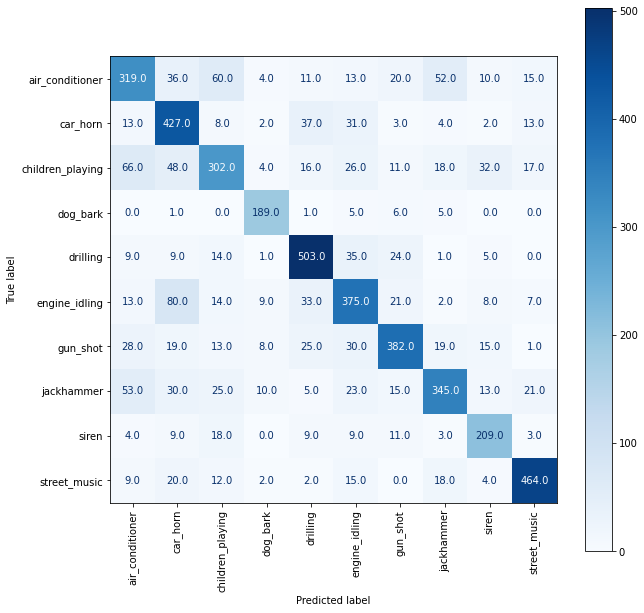

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


za parametre a= identity  i s= sgd  i hidden_layer= 80 b= 100 tacnost je:  0.7207133024600453  a mat. konf. je:


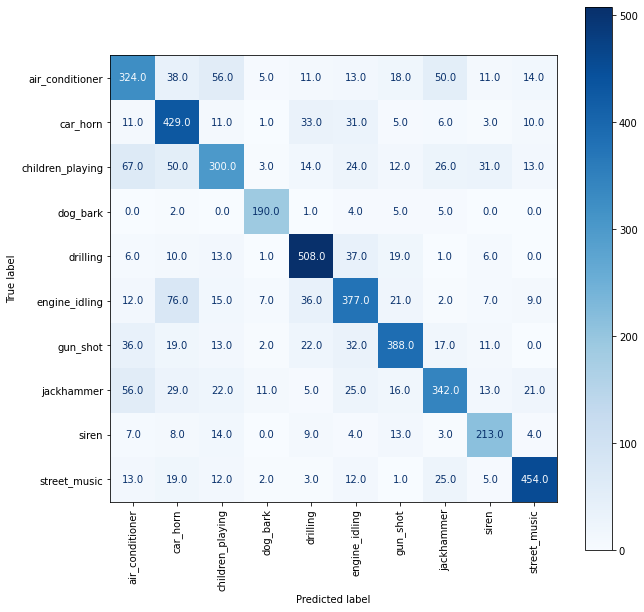

za parametre a= identity  i s= sgd  i hidden_layer= 100 b= 64 tacnost je:  0.7182601502722823  a mat. konf. je:


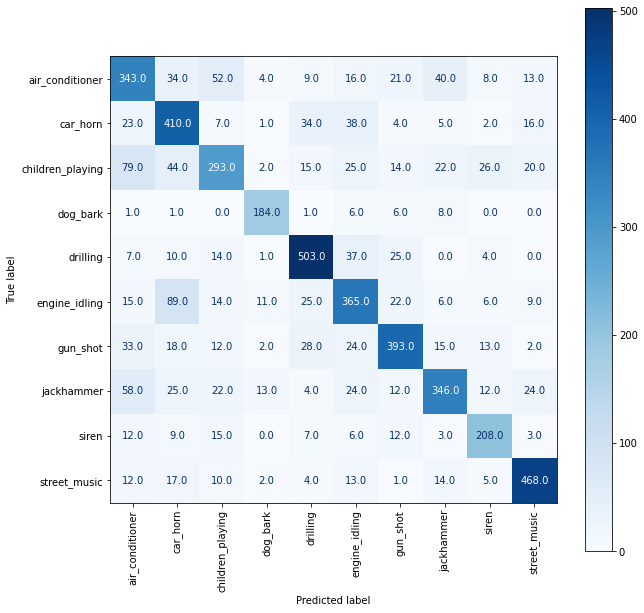

za parametre a= identity  i s= sgd  i hidden_layer= 100 b= 100 tacnost je:  0.717032529750528  a mat. konf. je:


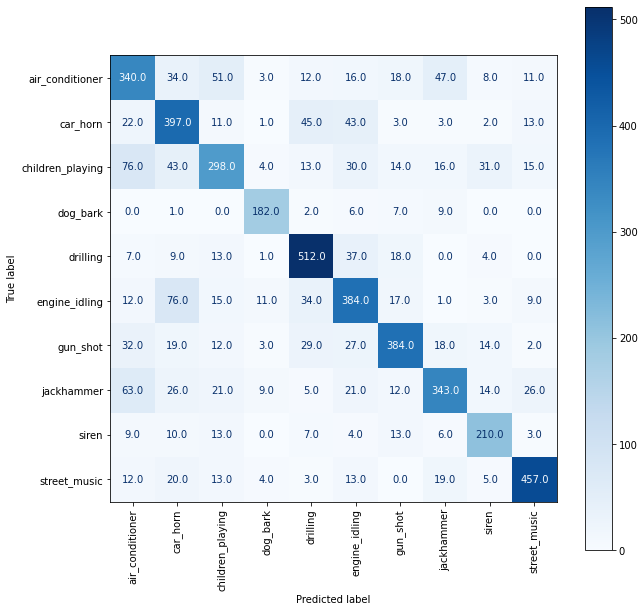

za parametre a= identity  i s= sgd  i hidden_layer= 150 b= 64 tacnost je:  0.715602081335865  a mat. konf. je:


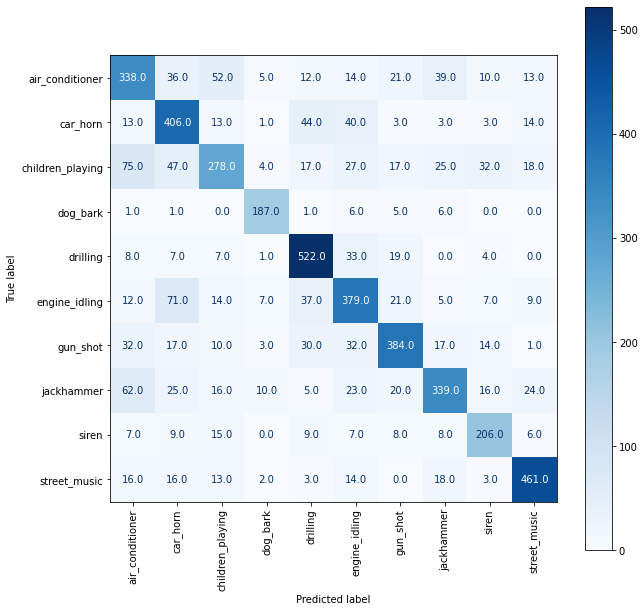

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


za parametre a= identity  i s= sgd  i hidden_layer= 150 b= 100 tacnost je:  0.7209152948106556  a mat. konf. je:


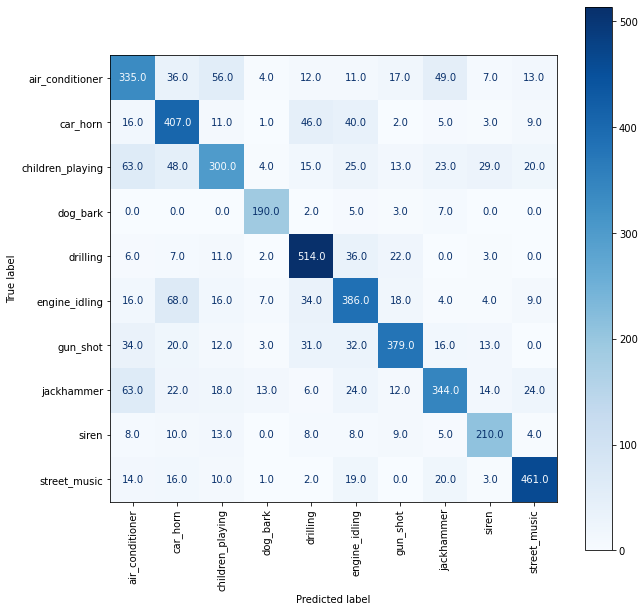

za parametre a= logistic  i s= adam  i hidden_layer= 80 b= 64 tacnost je:  0.8789643870983914  a mat. konf. je:


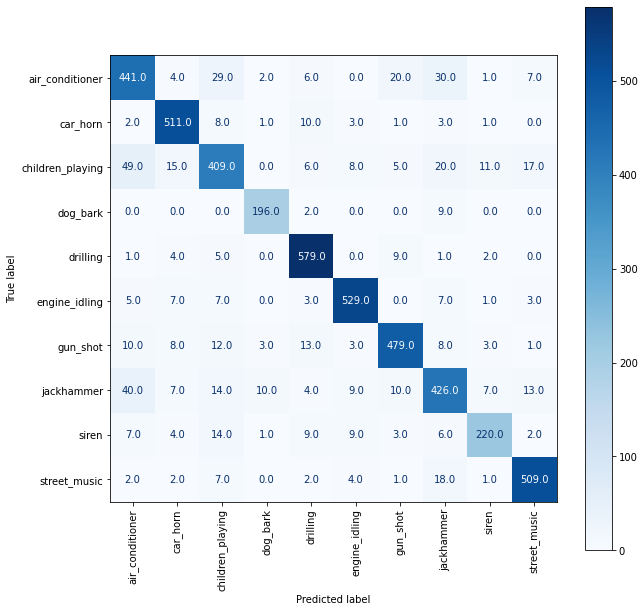

za parametre a= logistic  i s= adam  i hidden_layer= 80 b= 100 tacnost je:  0.8840772793071683  a mat. konf. je:


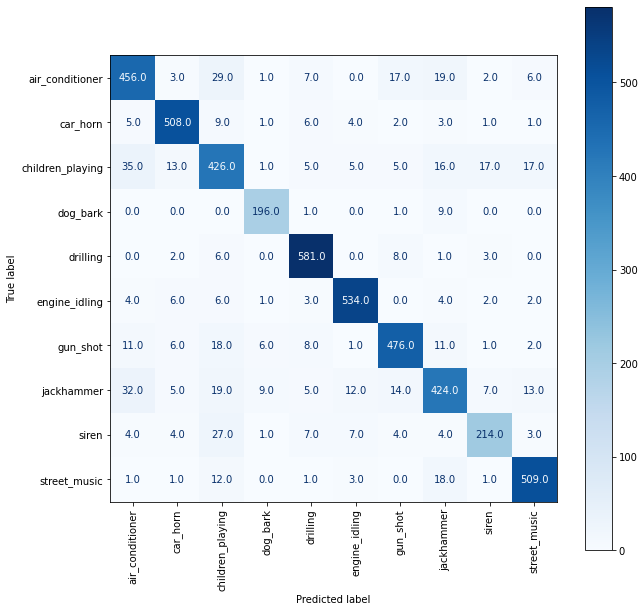

za parametre a= logistic  i s= adam  i hidden_layer= 100 b= 64 tacnost je:  0.8879604621384452  a mat. konf. je:


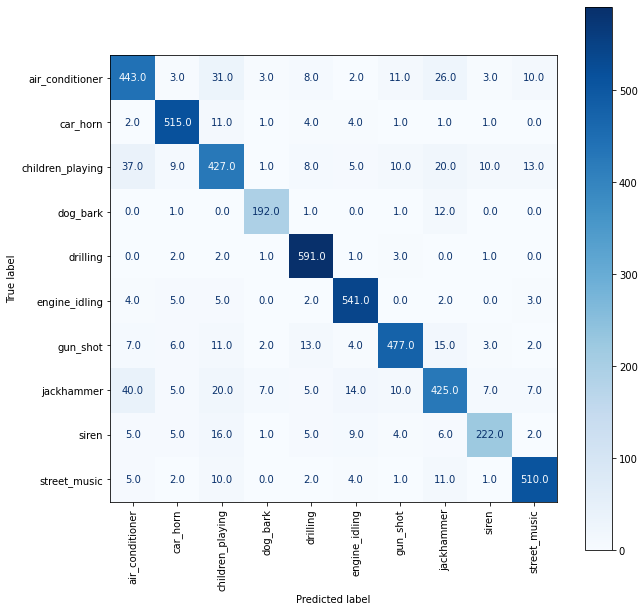

za parametre a= logistic  i s= adam  i hidden_layer= 100 b= 100 tacnost je:  0.8865262537834399  a mat. konf. je:


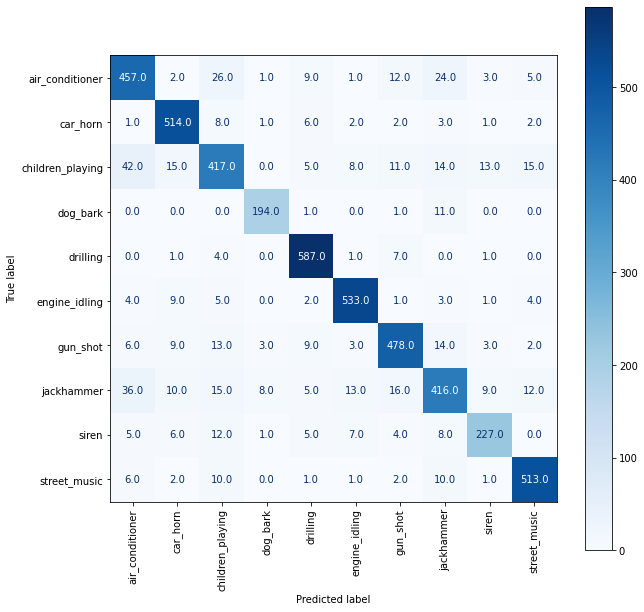

za parametre a= logistic  i s= adam  i hidden_layer= 150 b= 64 tacnost je:  0.9028853364415506  a mat. konf. je:


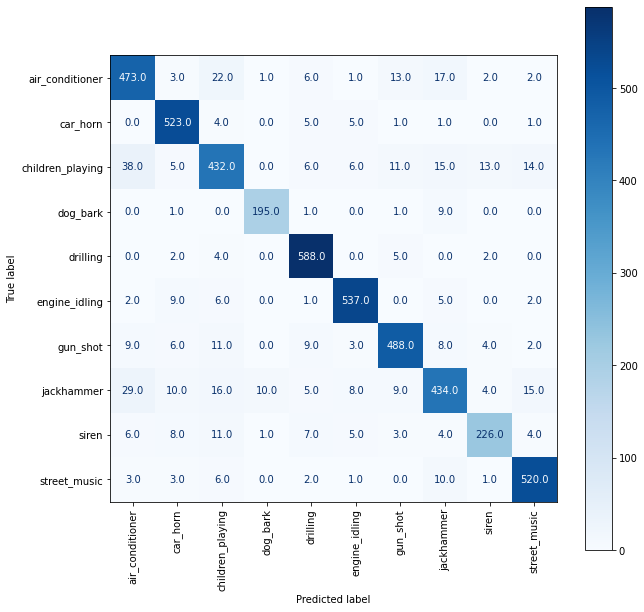

za parametre a= logistic  i s= adam  i hidden_layer= 150 b= 100 tacnost je:  0.8955244176792394  a mat. konf. je:


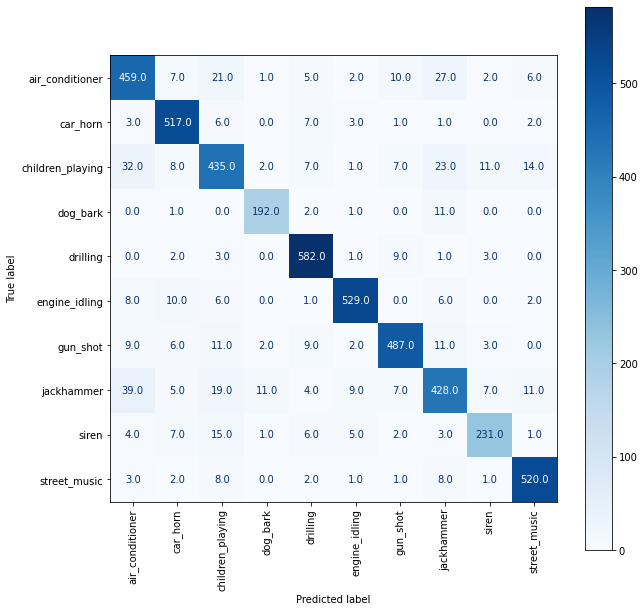

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilaye

za parametre a= logistic  i s= sgd  i hidden_layer= 80 b= 64 tacnost je:  0.762421067363509  a mat. konf. je:


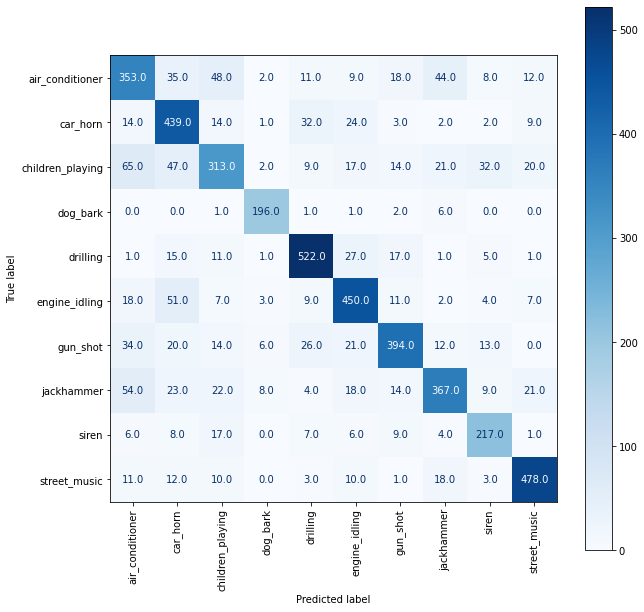

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilaye

za parametre a= logistic  i s= sgd  i hidden_layer= 80 b= 100 tacnost je:  0.7344111828981201  a mat. konf. je:


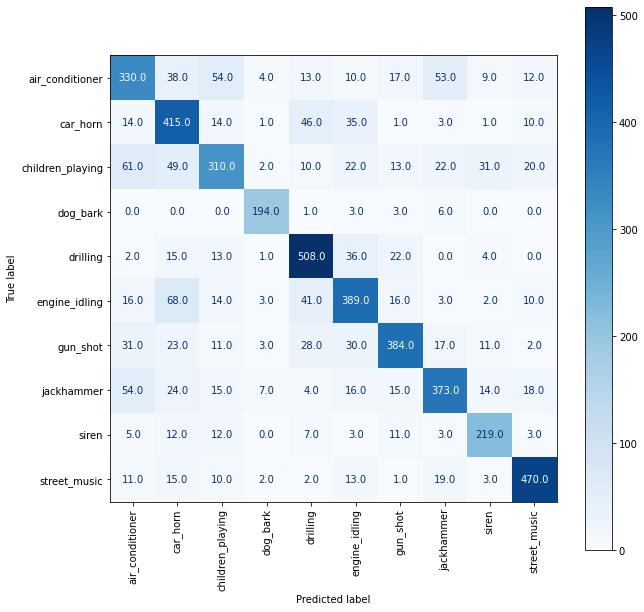

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


za parametre a= logistic  i s= sgd  i hidden_layer= 100 b= 64 tacnost je:  0.7546515684173366  a mat. konf. je:


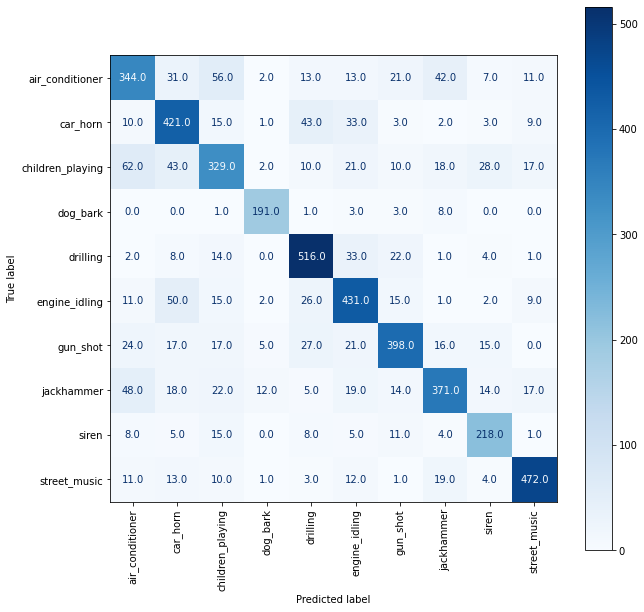

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


za parametre a= logistic  i s= sgd  i hidden_layer= 100 b= 100 tacnost je:  0.7205106834527115  a mat. konf. je:


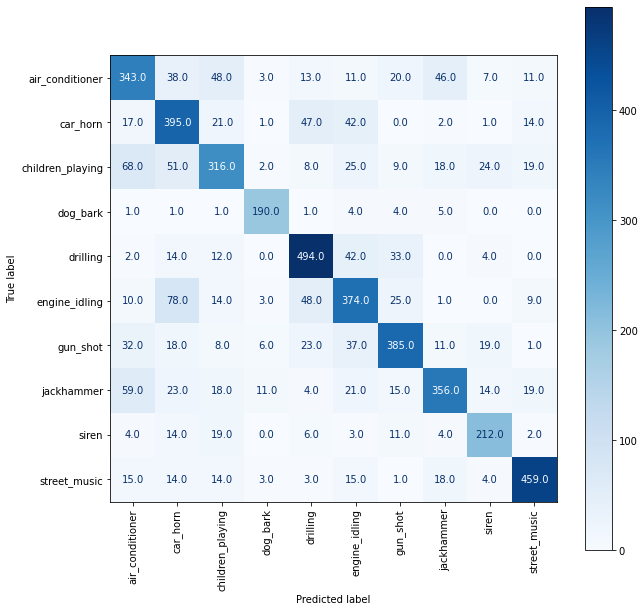

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


za parametre a= logistic  i s= sgd  i hidden_layer= 150 b= 64 tacnost je:  0.7401436297210751  a mat. konf. je:


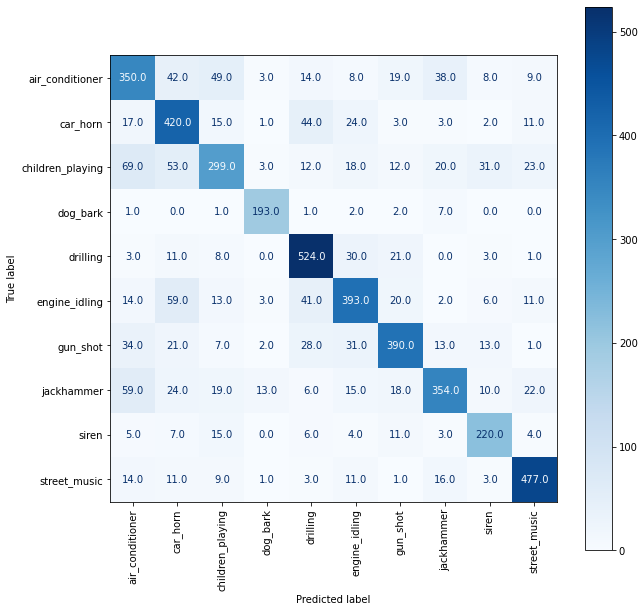

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


za parametre a= logistic  i s= sgd  i hidden_layer= 150 b= 100 tacnost je:  0.7178561655710618  a mat. konf. je:


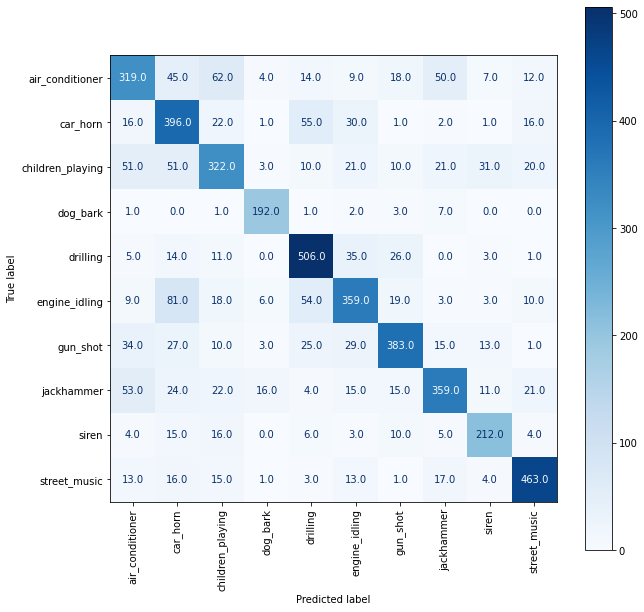

za parametre a= tanh  i s= adam  i hidden_layer= 80 b= 64 tacnost je:  0.8844837706352837  a mat. konf. je:


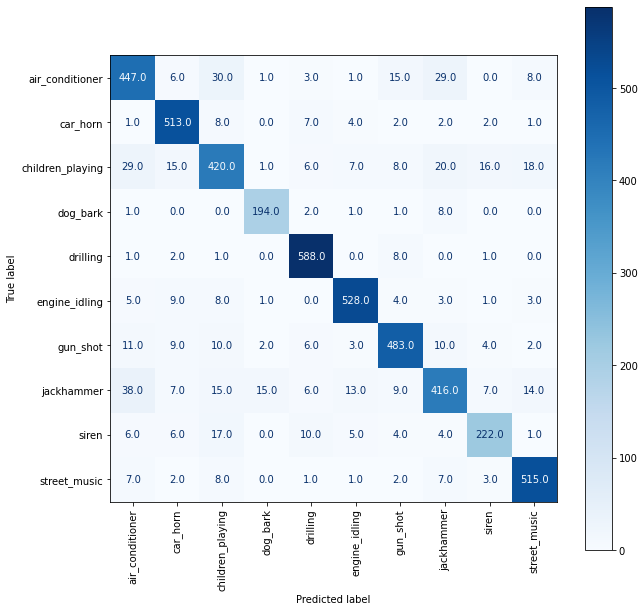

za parametre a= tanh  i s= adam  i hidden_layer= 80 b= 100 tacnost je:  0.8824377364323596  a mat. konf. je:


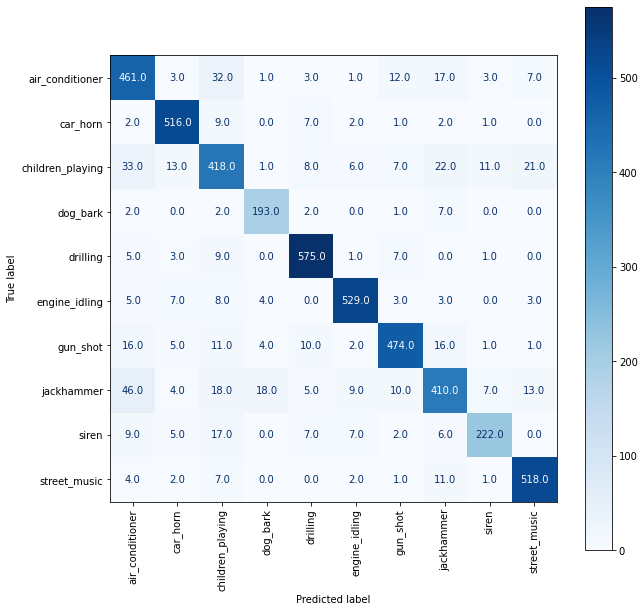

za parametre a= tanh  i s= adam  i hidden_layer= 100 b= 64 tacnost je:  0.8887786669340402  a mat. konf. je:


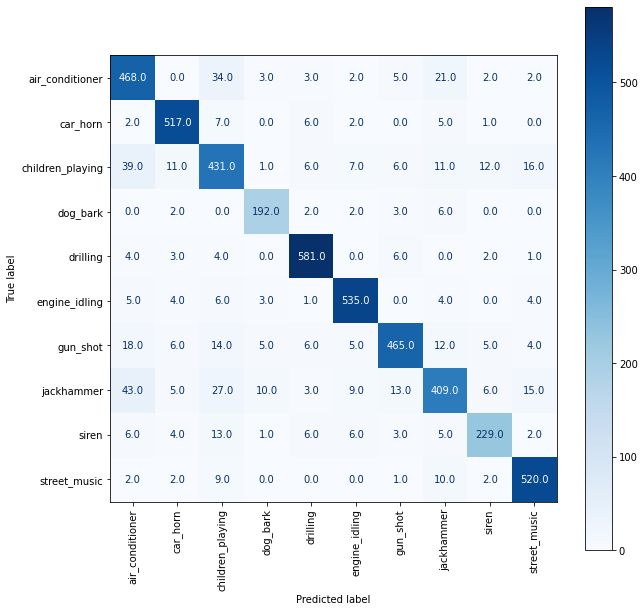

za parametre a= tanh  i s= adam  i hidden_layer= 100 b= 100 tacnost je:  0.8879596265961469  a mat. konf. je:


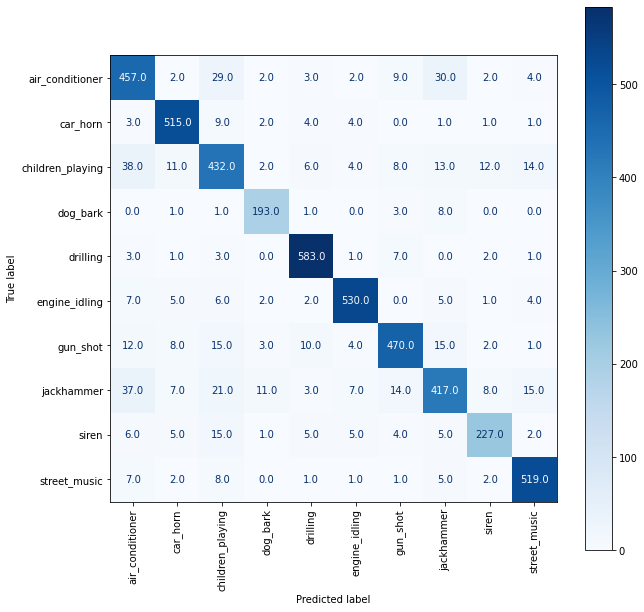

za parametre a= tanh  i s= adam  i hidden_layer= 150 b= 64 tacnost je:  0.9008390933530522  a mat. konf. je:


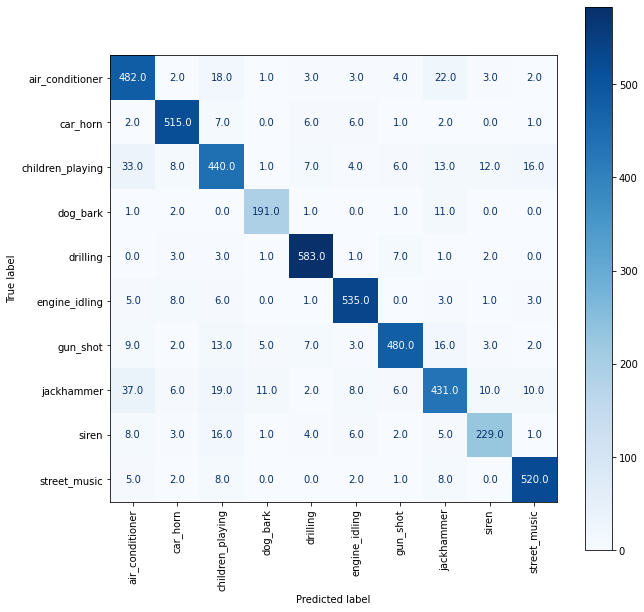

za parametre a= tanh  i s= adam  i hidden_layer= 150 b= 100 tacnost je:  0.9000215152141807  a mat. konf. je:


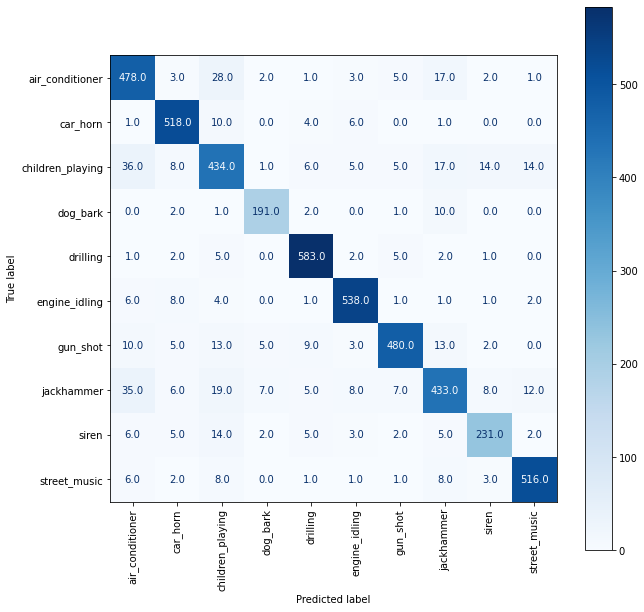

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


za parametre a= tanh  i s= sgd  i hidden_layer= 80 b= 64 tacnost je:  0.8697671552500257  a mat. konf. je:


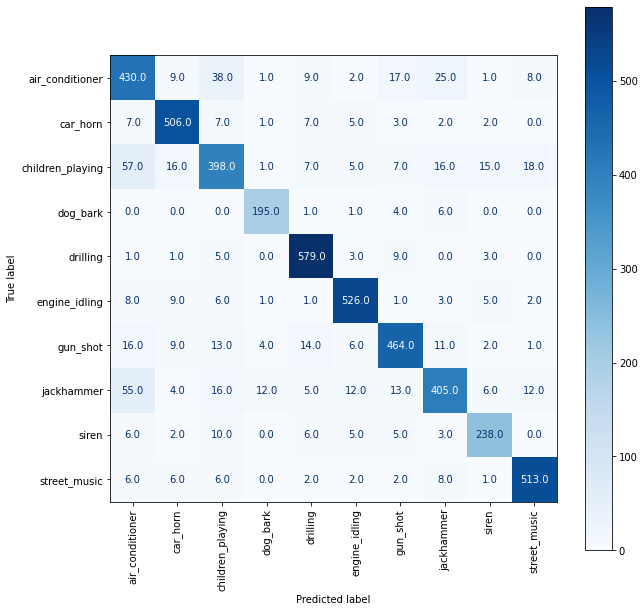

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilaye

za parametre a= tanh  i s= sgd  i hidden_layer= 80 b= 100 tacnost je:  0.8583131236539936  a mat. konf. je:


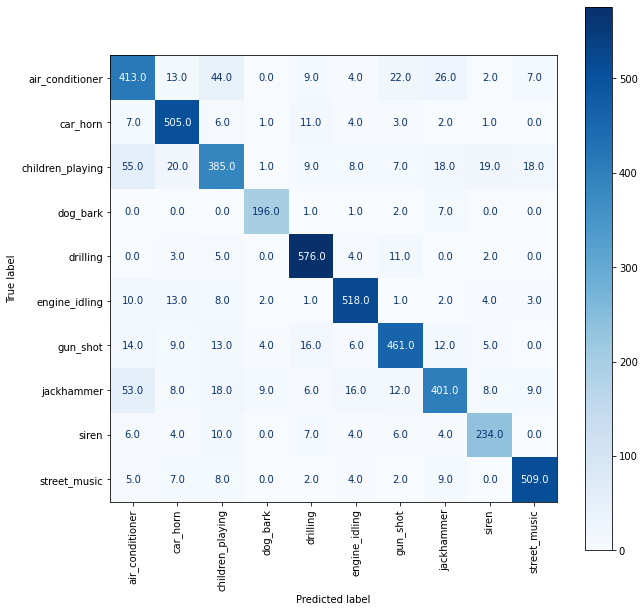

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


za parametre a= tanh  i s= sgd  i hidden_layer= 100 b= 64 tacnost je:  0.8726263809947549  a mat. konf. je:


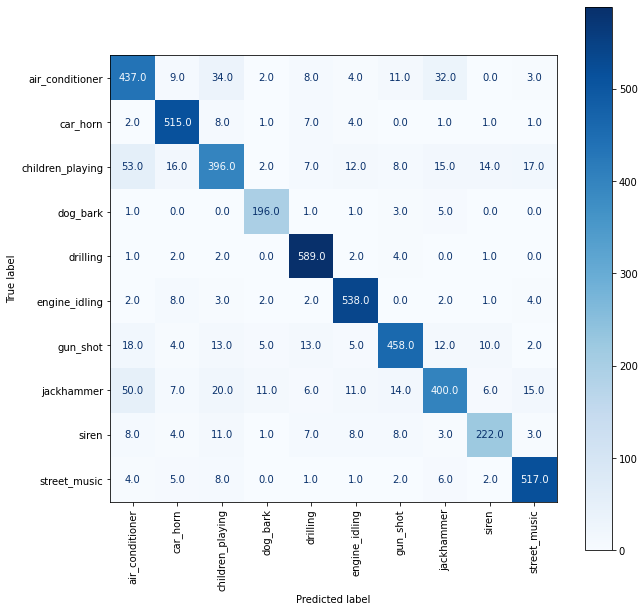

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilaye

za parametre a= tanh  i s= sgd  i hidden_layer= 100 b= 100 tacnost je:  0.8599501599019075  a mat. konf. je:


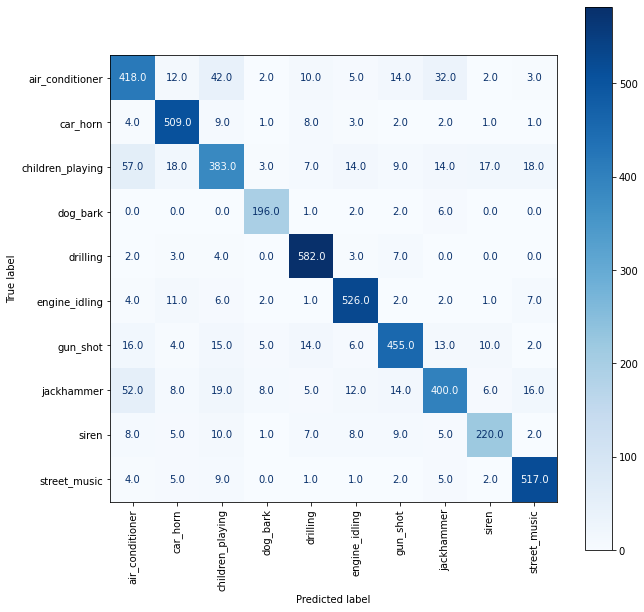

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


za parametre a= tanh  i s= sgd  i hidden_layer= 150 b= 64 tacnost je:  0.8799843753590221  a mat. konf. je:


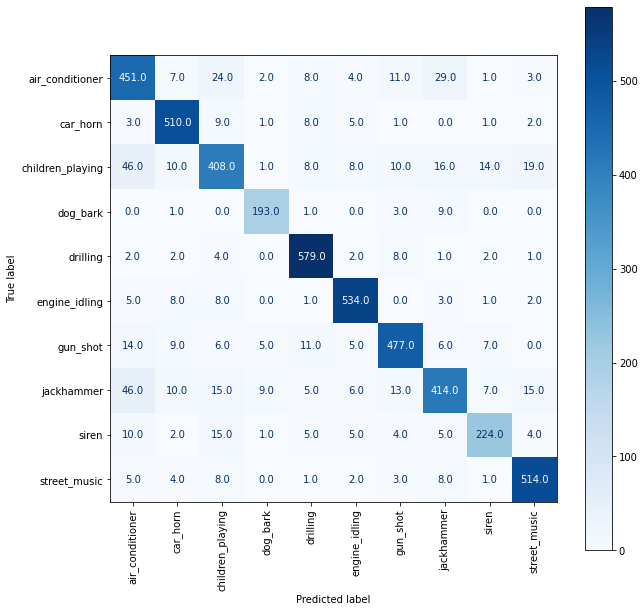

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


za parametre a= tanh  i s= sgd  i hidden_layer= 150 b= 100 tacnost je:  0.8597416920984854  a mat. konf. je:


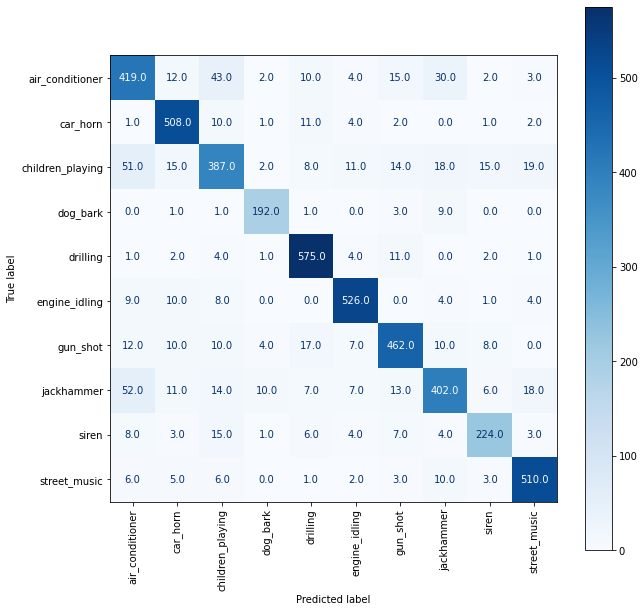

najbolja tacnost je u iteraciji broj:  4


In [ ]:

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) #krosvalidacija
acc = []
for a in ['relu','identity','logistic','tanh']: #lbfgs nije iskonvergirao ni za veliki broj iteracija ni sa jednim, logistic los za svaki slucaj
  for s in ['adam', 'sgd']: #sgd
    for h in [80,100,150]:
      for var in [0.99]:
        for b in [64,100]:
          acc_tmp = []
          indexes = kf.split(X_train, y_train)
          fin_conf_mat = np.zeros((len(np.unique(y_train)),len(np.unique(y_train))))
          for train_index, val_index in indexes:

            x_t1=X_train.iloc[train_index,:] #nije normalizovano
            y_t=y_train.iloc[train_index] 
            x_val1=X_train.iloc[val_index,:] #nije normalizovano
            y_val=y_train.iloc[val_index]

            scaler = StandardScaler()
            scaler.fit(x_t1)              #parametri za norm izracunati nad trening skupom

            x_t = scaler.transform(x_t1)
            x_val = scaler.transform(x_val1)
            x_t = pd.DataFrame(x_t, index=x_t1.index, columns=x_t1.columns)
            x_val = pd.DataFrame(x_val, index=x_val1.index, columns=x_val1.columns)        #normalizovani trening i test skup nad kojim radim upsampling

            pca = PCA(n_components=var)
            pca.fit(x_t)
            x_train_r = pca.transform(x_t)
            x_val_r = pca.transform(x_val)
            x_train_r = pd.DataFrame(x_train_r, index=x_t.index) 
            x_val_r = pd.DataFrame(x_val_r, index=x_val.index)

            nedupl_ind = y_t.loc[(y_t!='car_horn')&(y_t!='gun_shot')].index #tu ce biti oni koji se ne dupliraju
            dupl_ind = y_t.loc[(y_t=='car_horn')|(y_t=='gun_shot')].index #tu ce biti svi oni koji se dupliraju
            y_upsample1 = y_t.copy(deep=True)
            X_upsample1 = x_train_r.copy(deep=True)

            X_dupl = x_train_r.loc[dupl_ind,:]
            X_duplicated = pd.concat([X_dupl]*2, ignore_index=True)
            X_upsample1 = X_duplicated.append(x_train_r.loc[nedupl_ind,:], ignore_index=True)

            y_dupl = y_t.loc[dupl_ind]
            y_duplicated = pd.concat([y_dupl]*2, ignore_index=True)
            y_upsample1 = y_duplicated.append(y_t.loc[nedupl_ind], ignore_index=True)

            classifier = MLPClassifier(hidden_layer_sizes=(h), activation=a,
                                    solver=s, batch_size=b, learning_rate='constant', 
                                    learning_rate_init=0.01, max_iter=70, shuffle=True,
                                    random_state=42, early_stopping=True, n_iter_no_change=10,
                                    validation_fraction=0.1, verbose=False) 
            classifier.fit(X_upsample1.values, y_upsample1.values)
            y_pred = classifier.predict(x_val_r.values)

            acc_tmp.append(accuracy_score(y_val, y_pred))
            fin_conf_mat += confusion_matrix(y_val, y_pred)
            #plt.figure
            #plt.plot(classifier.validation_scores_)
            #plt.show()

          print('za parametre a=', a, ' i s=', s, ' i hidden_layer=', h, 'b=',b, 'tacnost je: ', np.mean(acc_tmp), ' a mat. konf. je:')

          disp = ConfusionMatrixDisplay(confusion_matrix =fin_conf_mat,  display_labels=classifier.classes_,)
          fig, ax = plt.subplots(figsize=(10,10))
          disp.plot(cmap="Blues", values_format='', xticks_rotation=90,ax=ax)  
          plt.show()

          acc.append(np.mean(acc_tmp))
print('najbolja tacnost je u iteraciji broj: ', np.argmax(acc))


Za konacno odabrane parametre

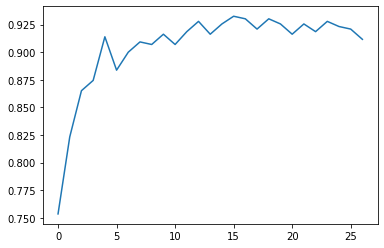

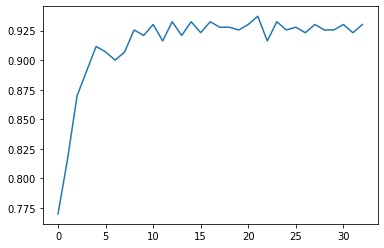

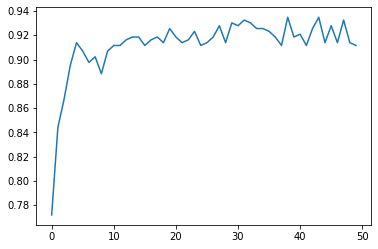

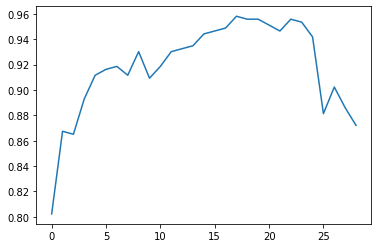

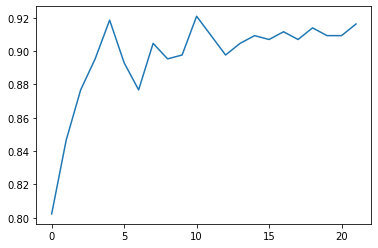

tacnost je:  0.9090163369407872  a mat. konf. je:


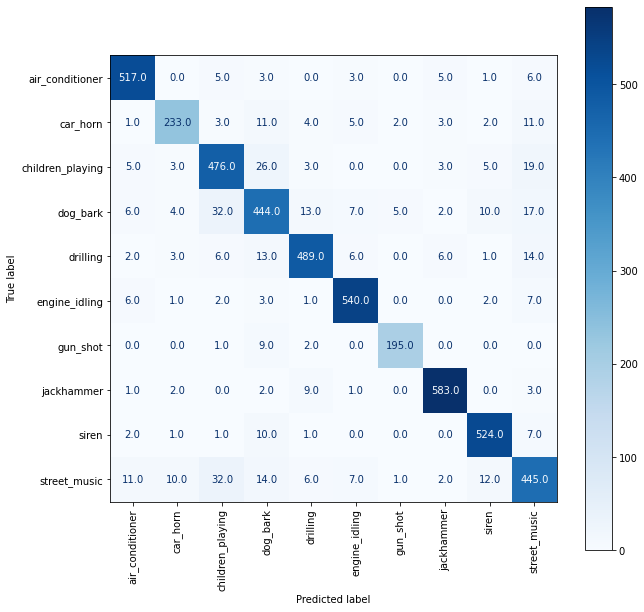

In [ ]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
acc = []
acc_tmp = []
indexes = kf.split(X_train, y_train)
fin_conf_mat = np.zeros((len(np.unique(y_train)),len(np.unique(y_train))))
for train_index, val_index in indexes:

            x_t1=X_train.iloc[train_index,:] #nije normalizovano
            y_t=y_train.iloc[train_index] 
            x_val1=X_train.iloc[val_index,:] #nije normalizovano
            y_val=y_train.iloc[val_index]

            scaler = StandardScaler()
            scaler.fit(x_t1)              #parametri za norm izracunati nad trening skupom

            x_t = scaler.transform(x_t1)
            x_val = scaler.transform(x_val1)
            x_t = pd.DataFrame(x_t, index=x_t1.index, columns=x_t1.columns)
            x_val = pd.DataFrame(x_val, index=x_val1.index, columns=x_val1.columns)        #normalizovani trening i test skup nad kojim radim upsampling

            pca = PCA(n_components=0.99)
            pca.fit(x_t)
            x_train_r1 = pca.transform(x_t)
            x_val_r = pca.transform(x_val)
            x_train_r1 = pd.DataFrame(x_train_r1, index=x_t.index) 
            x_val_r = pd.DataFrame(x_val_r, index=x_val.index)

            nedupl_ind = y_t.loc[(y_t!='car_horn')&(y_t!='gun_shot')].index #tu ce biti oni koji se ne dupliraju
            dupl_ind = y_t.loc[(y_t=='car_horn')|(y_t=='gun_shot')].index #tu ce biti svi oni koji se dupliraju
            y_upsample1 = y_t.copy(deep=True)
            X_upsample1 = x_train_r1.copy(deep=True)

            X_dupl = x_train_r1.loc[dupl_ind,:]
            X_duplicated = pd.concat([X_dupl]*2, ignore_index=True)
            X_upsample1 = X_duplicated.append(x_train_r1.loc[nedupl_ind,:], ignore_index=True)

            y_dupl = y_t.loc[dupl_ind]
            y_duplicated = pd.concat([y_dupl]*2, ignore_index=True)
            y_upsample1 = y_duplicated.append(y_t.loc[nedupl_ind], ignore_index=True)

            classifier = MLPClassifier(hidden_layer_sizes=150, activation='relu',
                                    solver='adam', batch_size=64, learning_rate='constant', 
                                    learning_rate_init=0.01, max_iter=70, shuffle=True,
                                    random_state=42, early_stopping=True, n_iter_no_change=10,
                                    validation_fraction=0.1, verbose=False) 
            classifier.fit(X_upsample1.values, y_upsample1.values)
            y_pred = classifier.predict(x_val_r.values)
            plt.figure
            plt.plot(classifier.validation_scores_)
            plt.show()

            acc_tmp.append(accuracy_score(y_val, y_pred))
            #print(confusion_matrix(y_undersample.iloc[val_index], y_pred, labels=labels_y))
            fin_conf_mat += confusion_matrix(y_val, y_pred)
            acc_tmp.append(accuracy_score(y_val, y_pred))

            
print('tacnost je: ', np.mean(acc_tmp),
                  ' a mat. konf. je:')
        
disp = ConfusionMatrixDisplay(confusion_matrix =fin_conf_mat,  display_labels=classifier.classes_,)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(cmap="Blues", values_format='', xticks_rotation=90,ax=ax)  
plt.show()

In [ ]:
X_upsample

0          1          2           3          4         5    \
0     77.918935   8.264184  76.142139  170.656135  28.093670  7.974263   
1     -1.841480   0.210642   2.383272   -0.960619   1.456676 -0.774730   
2      1.695410  -2.472820  -2.001060    0.917220  -0.703627  1.341546   
3      6.517584   5.544885  -6.365607    1.263823  -0.514343 -2.001792   
4     -1.526699   0.902518   2.650680   -1.166952   1.139736 -2.010468   
...         ...        ...        ...         ...        ...       ...   
5368   7.034886   6.188101  -1.812870    0.835055   1.555427 -0.502923   
5369  -1.446752  -0.915950  -1.486558    0.409531  -0.665739 -0.369909   
5370  -2.030906  -2.383405  -1.682354    0.974450  -0.841005  1.771422   
5371   7.280512  15.607437   7.864520   -3.482020  -8.312837  6.322087   
5372  -1.911172  -0.140870   1.719992   -0.536774   1.224453  0.095527   

            6         7         8         9    ...       105       106  \
0    -20.206724  3.757408  4.171547  7.952445  ...  0.200445  0.100403   
1      1.184805  0.272179 -0.028384 -0.264672  ...  0.144525 -0.176454   
2      0.793528 -0.464791  0.026235  0.020653  ... -0.100843 -0.056549   
3     -2.283182  0.642401 -2.980571 -1.183313  ...  0.302292 -0.019208   
4      0.572404 -0.650306 -0.679172  1.362423  ... -0.274170 -0.101704   
...         ...       ...       ...       ...  ...       ...       ...   
5368   1.343697 -5.592844 -5.294466 -4.846718  ... -0.084768 -0.625602   
5369  -1.781244 -0.277073  0.237963  0.584072  ... -0.052661  0.059527   
5370  -0.213578 -0.649853 -0.095766  0.298333  ... -0.066423  0.406291   
5371  -5.694925  8.997230 -1.292067 -0.764390  ...  0.297244 -0.040495   
5372   1.289853  0.118013  0.114601 -0.551606  ...  0.139692  0.029360   

           107       108       109       110       111       112       113  \
0     0.032787 -0.201282 -0.007476 -0.299735  0.343248  0.316541 -0.327144   
1    -0.260909  0.195354  0.438216 -0.579903 -0.278676 -0.509115  0.221169   
2     0.084564  0.042406 -0.222968  0.076870 -0.007273  0.011859 -0.050134   
3    -0.047693 -0.168233  0.581179  0.282275 -0.007197 -0.402006  0.285822   
4    -0.079184  0.082420  0.098265 -0.390969 -0.274803 -0.256674  0.304976   
...        ...       ...       ...       ...       ...       ...       ...   
5368 -0.225277 -0.502541  0.154049 -0.513343  0.390822  0.091637  0.185878   
5369 -0.001619  0.001098  0.230120 -0.040187 -0.106306 -0.109040  0.063907   
5370  0.076294  0.005786 -0.115078  0.243662  0.200913 -0.031344  0.122229   
5371  1.165259  0.395120  0.747901 -0.193002 -0.213081 -0.242178 -0.088720   
5372 -0.146081 -0.109691  0.083644 -0.233769 -0.094104 -0.090129 -0.051473   

           114  
0     0.577133  
1    -0.185595  
2     0.079817  
3     0.563768  
4    -0.019080  
...        ...  
5368  0.454046  
5369  0.031628  
5370  0.115190  
5371 -0.278705  
5372 -0.034629  

[5373 rows x 115 columns]

In [ ]:
y_upsample

0              car_horn
1              car_horn
2              gun_shot
3              gun_shot
4              car_horn
             ...       
5368           dog_bark
5369         jackhammer
5370    air_conditioner
5371              siren
5372       street_music
Name: class, Length: 5373, dtype: object

In [ ]:
print('prosecna tacnost je: ', tacnost_po_klasi(fin_conf_mat, niz))

Za klasu  air_conditioner  tacnost je:  0.9883459415252505
Za klasu  car_horn  tacnost je:  0.9865058270292374
Za klasu  children_playing  tacnost je:  0.9701492537313433
Za klasu  dog_bark  tacnost je:  0.9617665099161725
Za klasu  drilling  tacnost je:  0.9815988550398691
Za klasu  engine_idiling  tacnost je:  0.9895726845225925
Za klasu  gun_shot  tacnost je:  0.9959108566755265
Za klasu  jackhammer  tacnost je:  0.9920261705172766
Za klasu  siren  tacnost je:  0.9887548558576978
Za klasu  street_music  tacnost je:  0.963402167245962
prosecna tacnost je:  0.9818033122060928


In [ ]:
print('prosecna osetljivost je: ', osetljivost_po_klasi(fin_conf_mat, niz))

Za klasu  air_conditioner  osetljivost je:  0.9574074074074074
Za klasu  car_horn  osetljivost je:  0.8472727272727273
Za klasu  children_playing  osetljivost je:  0.8814814814814815
Za klasu  dog_bark  osetljivost je:  0.8222222222222222
Za klasu  drilling  osetljivost je:  0.9055555555555556
Za klasu  engine_idiling  osetljivost je:  0.9608540925266904
Za klasu  gun_shot  osetljivost je:  0.9420289855072463
Za klasu  jackhammer  osetljivost je:  0.9700499168053245
Za klasu  siren  osetljivost je:  0.9597069597069597
Za klasu  street_music  osetljivost je:  0.8240740740740741
prosecna osetljivost je:  0.9070653422559689


Finalni model

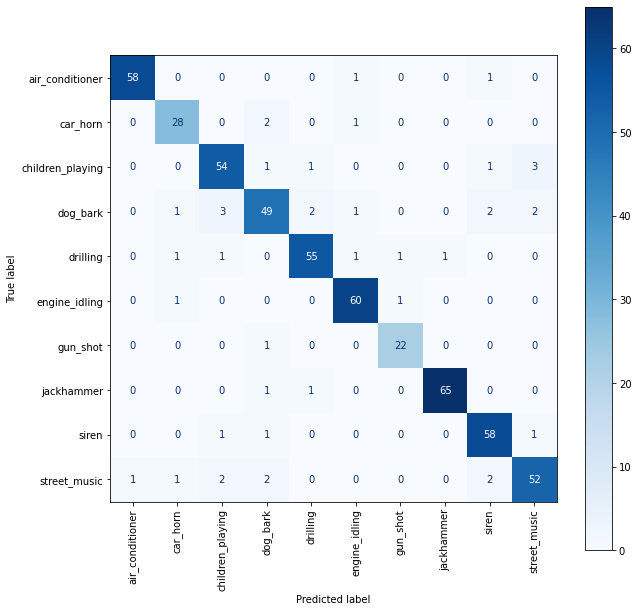

In [ ]:
classifier_MLP = MLPClassifier(hidden_layer_sizes=150, activation='relu',
                                    solver='adam', batch_size=64, learning_rate='constant', 
                                    learning_rate_init=0.01, max_iter=70, shuffle=True,
                                    random_state=42, early_stopping=True, n_iter_no_change=10,
                                    validation_fraction=0.1, verbose=False) 
classifier_MLP.fit(X_upsample.values, y_upsample.values)
y_pred = classifier_MLP.predict(x_test_r.values)
conf_mat = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix =conf_mat,  display_labels=classifier_MLP.classes_,)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(cmap="Blues", values_format='', xticks_rotation=90,ax=ax)  
plt.show()

In [ ]:
print('prosecna osetljivost je: ', osetljivost_po_klasi(conf_mat, niz))

Za klasu  air_conditioner  osetljivost je:  0.9666666666666667
Za klasu  car_horn  osetljivost je:  0.9032258064516129
Za klasu  children_playing  osetljivost je:  0.9
Za klasu  dog_bark  osetljivost je:  0.8166666666666667
Za klasu  drilling  osetljivost je:  0.9166666666666666
Za klasu  engine_idiling  osetljivost je:  0.967741935483871
Za klasu  gun_shot  osetljivost je:  0.9565217391304348
Za klasu  jackhammer  osetljivost je:  0.9701492537313433
Za klasu  siren  osetljivost je:  0.9508196721311475
Za klasu  street_music  osetljivost je:  0.8666666666666667
prosecna osetljivost je:  0.9215125073595077


In [ ]:
print('prosecna specificnost je: ', specificnost_po_klasi(conf_mat, niz))

Za klasu  air_conditioner  specificnost je:  0.9979338842975206
Za klasu  car_horn  specificnost je:  0.9922027290448343
Za klasu  children_playing  specificnost je:  0.9855371900826446
Za klasu  dog_bark  specificnost je:  0.9834710743801653
Za klasu  drilling  specificnost je:  0.9917355371900827
Za klasu  engine_idiling  specificnost je:  0.991701244813278
Za klasu  gun_shot  specificnost je:  0.9961612284069098
Za klasu  jackhammer  specificnost je:  0.9979035639412998
Za klasu  siren  specificnost je:  0.9875776397515528
Za klasu  street_music  specificnost je:  0.987603305785124
prosecna specificnost je:  0.9911827397693411


In [ ]:
print('prosecna preciznost je: ', preciznost_po_klasi(conf_mat, niz))

Za klasu  air_conditioner  preciznost je:  0.9830508474576272
Za klasu  car_horn  preciznost je:  0.875
Za klasu  children_playing  preciznost je:  0.8852459016393442
Za klasu  dog_bark  preciznost je:  0.8596491228070176
Za klasu  drilling  preciznost je:  0.9322033898305084
Za klasu  engine_idiling  preciznost je:  0.9375
Za klasu  gun_shot  preciznost je:  0.9166666666666666
Za klasu  jackhammer  preciznost je:  0.9848484848484849
Za klasu  siren  preciznost je:  0.90625
Za klasu  street_music  preciznost je:  0.896551724137931
prosecna preciznost je:  0.9176966137387579


In [ ]:
print('prosecna tacnost je: ', tacnost_po_klasi(conf_mat, niz))

Za klasu  air_conditioner  tacnost je:  0.9944852941176471
Za klasu  car_horn  tacnost je:  0.9871323529411765
Za klasu  children_playing  tacnost je:  0.9761029411764706
Za klasu  dog_bark  tacnost je:  0.9650735294117647
Za klasu  drilling  tacnost je:  0.9834558823529411
Za klasu  engine_idiling  tacnost je:  0.9889705882352942
Za klasu  gun_shot  tacnost je:  0.9944852941176471
Za klasu  jackhammer  tacnost je:  0.9944852941176471
Za klasu  siren  tacnost je:  0.9834558823529411
Za klasu  street_music  tacnost je:  0.9742647058823529
prosecna tacnost je:  0.9841911764705882


In [ ]:
print('procenat pogodjenih uzoraka: ', accuracy_score(y_test, y_pred))
print('preciznost mikro: ', precision_score(y_test, y_pred, average='micro'))
print('preciznost makro: ', precision_score(y_test, y_pred, average='macro'))
print('osetljivost mikro: ', recall_score(y_test, y_pred, average='micro'))
print('osetljivost makro: ', recall_score(y_test, y_pred, average='macro'))
print('f mera mikro: ', f1_score(y_test, y_pred, average='micro'))
print('f mera makro: ', f1_score(y_test, y_pred, average='macro'))

procenat pogodjenih uzoraka:  0.9209558823529411
preciznost mikro:  0.9209558823529411
preciznost makro:  0.9176966137387579
osetljivost mikro:  0.9209558823529411
osetljivost makro:  0.9215125073595077
f mera mikro:  0.9209558823529411
f mera makro:  0.9193568080205201


**LOGISTICKA REGRESIJA**

UNAKRSNA VALIDACIJA

za parametre broj iteracija= 100 , solver= newton-cg  i pristup  auto  tacnost je:  0.7321627385734368  a mat. konf. je:


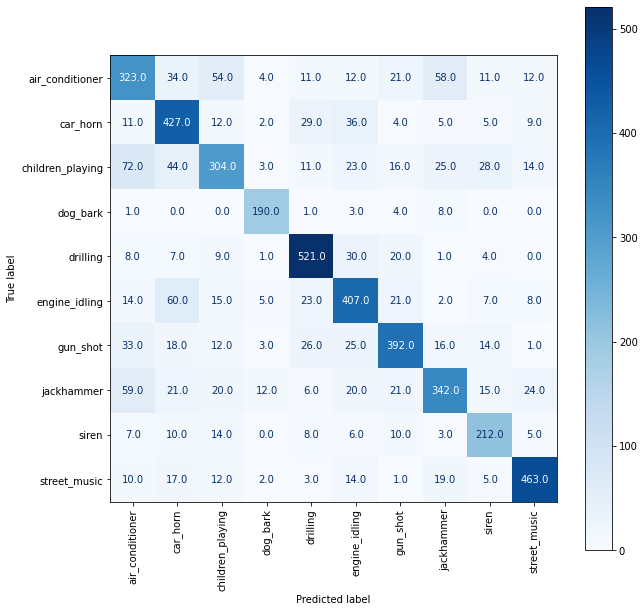

za parametre broj iteracija= 100 , solver= newton-cg  i pristup  ovr  tacnost je:  0.7133530103544579  a mat. konf. je:


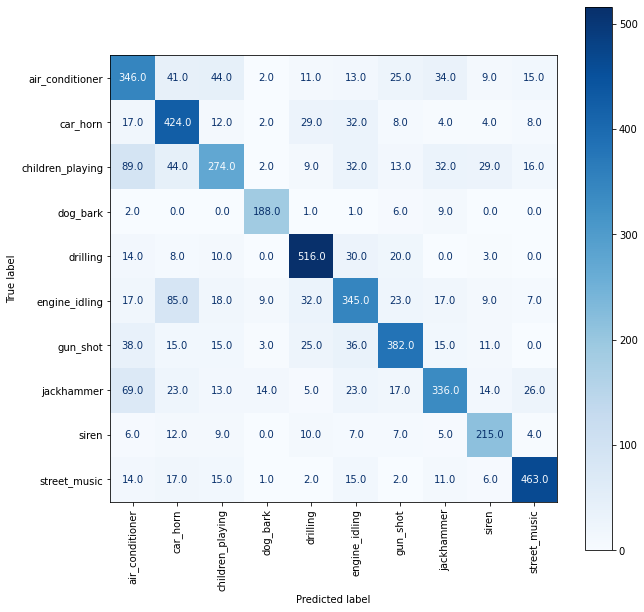

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


za parametre broj iteracija= 100 , solver= lbfgs  i pristup  auto  tacnost je:  0.7307320812731992  a mat. konf. je:


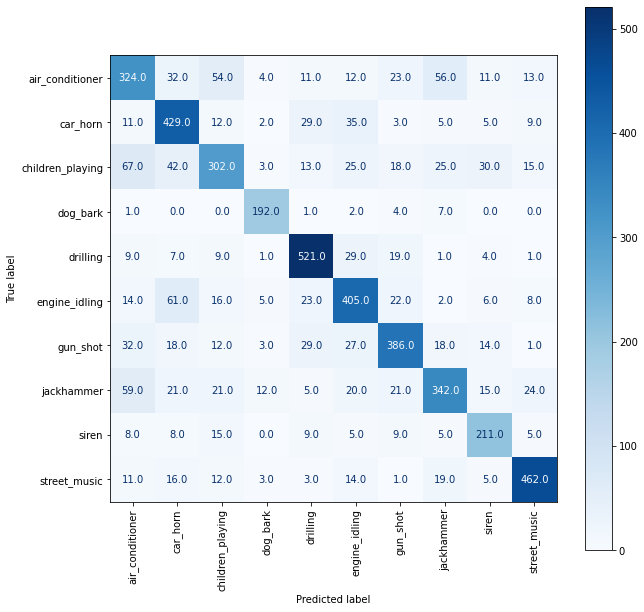

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


za parametre broj iteracija= 100 , solver= lbfgs  i pristup  ovr  tacnost je:  0.7133532192400325  a mat. konf. je:


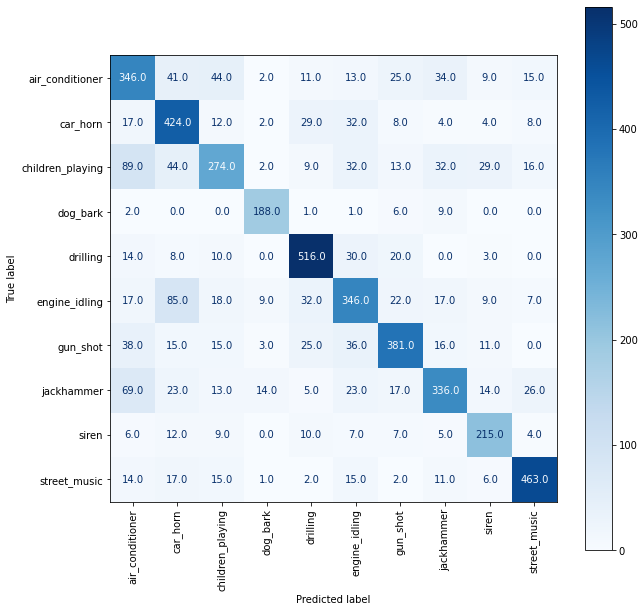

za parametre broj iteracija= 100 , solver= liblinear  i pristup  auto  tacnost je:  0.7108986048532475  a mat. konf. je:


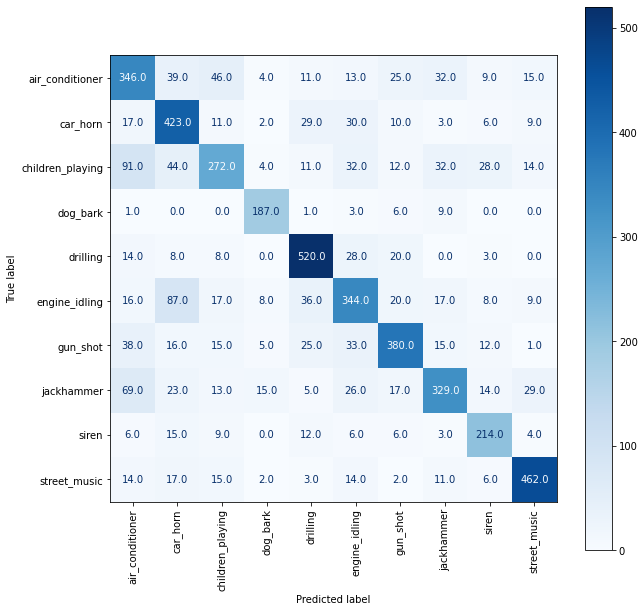

za parametre broj iteracija= 100 , solver= liblinear  i pristup  ovr  tacnost je:  0.7108986048532475  a mat. konf. je:


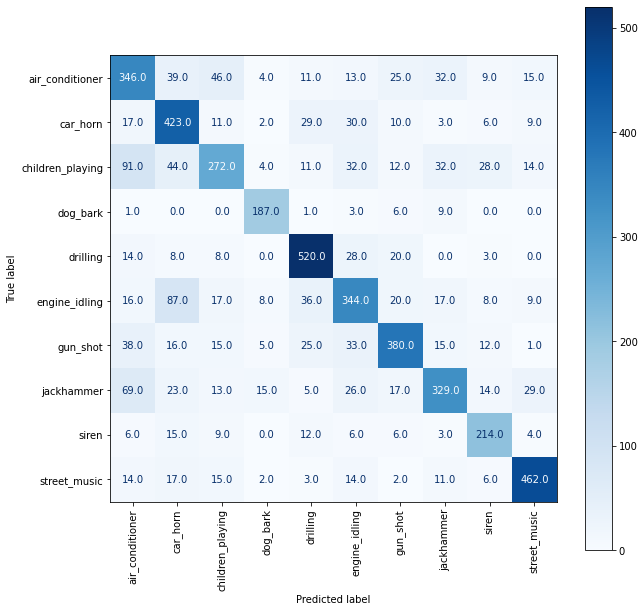

za parametre broj iteracija= 200 , solver= newton-cg  i pristup  auto  tacnost je:  0.7321627385734368  a mat. konf. je:


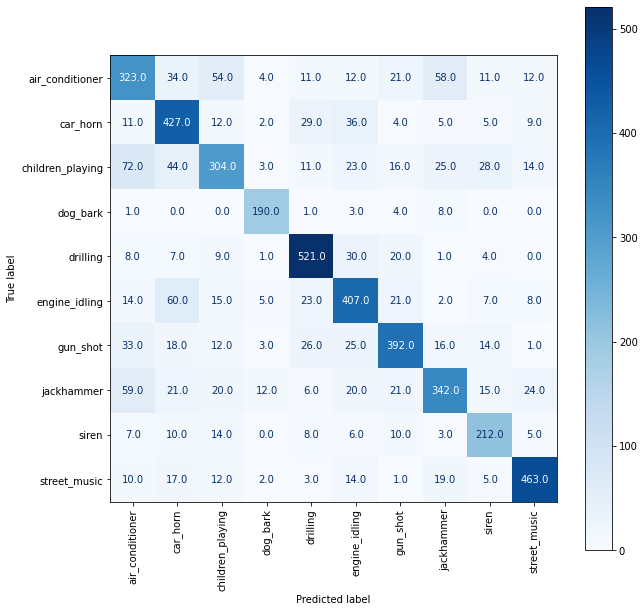

za parametre broj iteracija= 200 , solver= newton-cg  i pristup  ovr  tacnost je:  0.7133530103544579  a mat. konf. je:


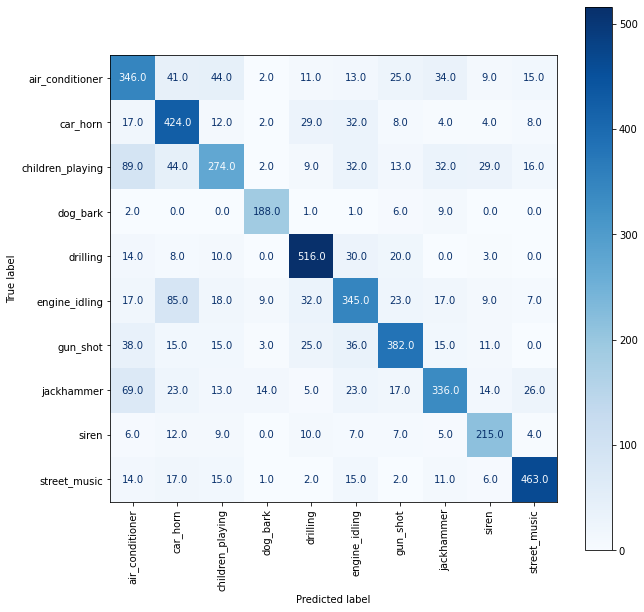

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


za parametre broj iteracija= 200 , solver= lbfgs  i pristup  auto  tacnost je:  0.7319582395959318  a mat. konf. je:


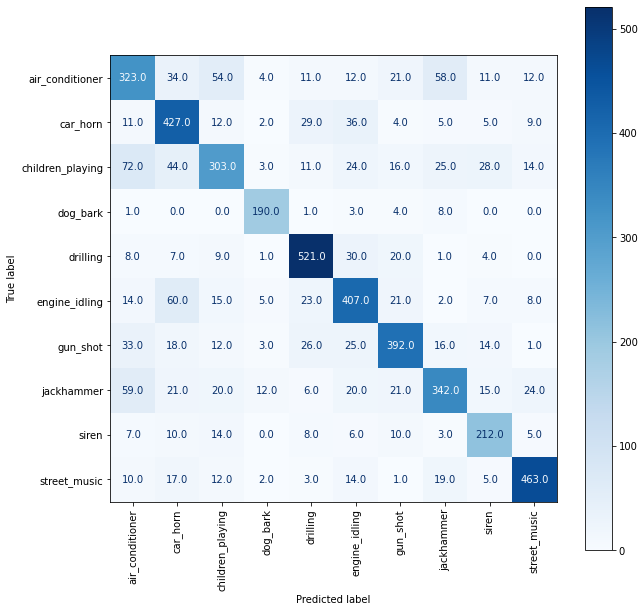

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


za parametre broj iteracija= 200 , solver= lbfgs  i pristup  ovr  tacnost je:  0.7133530103544579  a mat. konf. je:


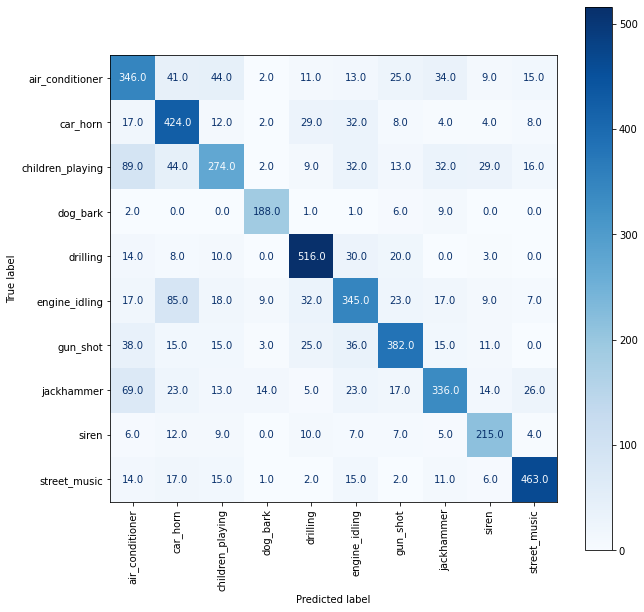

za parametre broj iteracija= 200 , solver= liblinear  i pristup  auto  tacnost je:  0.7108986048532475  a mat. konf. je:


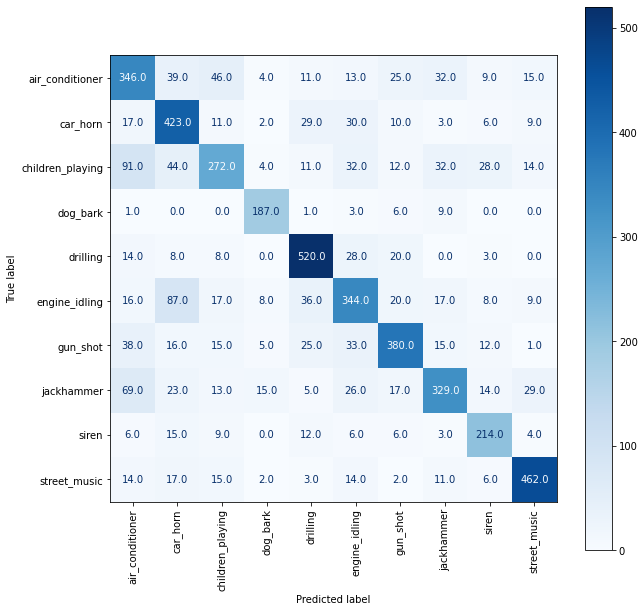

za parametre broj iteracija= 200 , solver= liblinear  i pristup  ovr  tacnost je:  0.7108986048532475  a mat. konf. je:


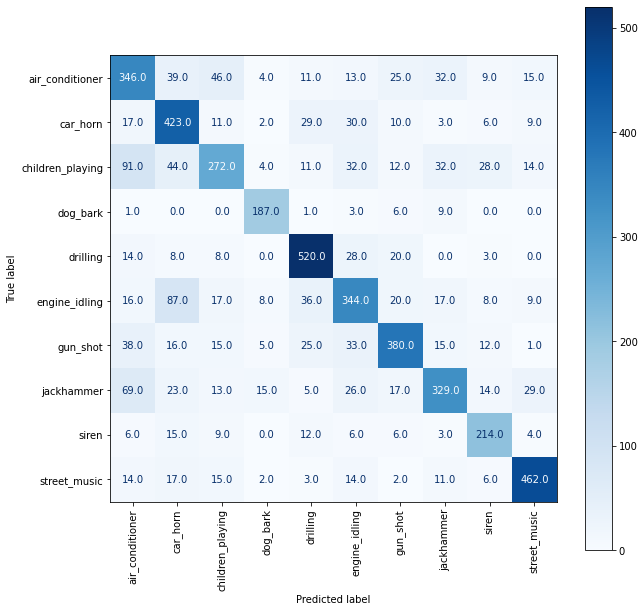

za parametre broj iteracija= 500 , solver= newton-cg  i pristup  auto  tacnost je:  0.7321627385734368  a mat. konf. je:


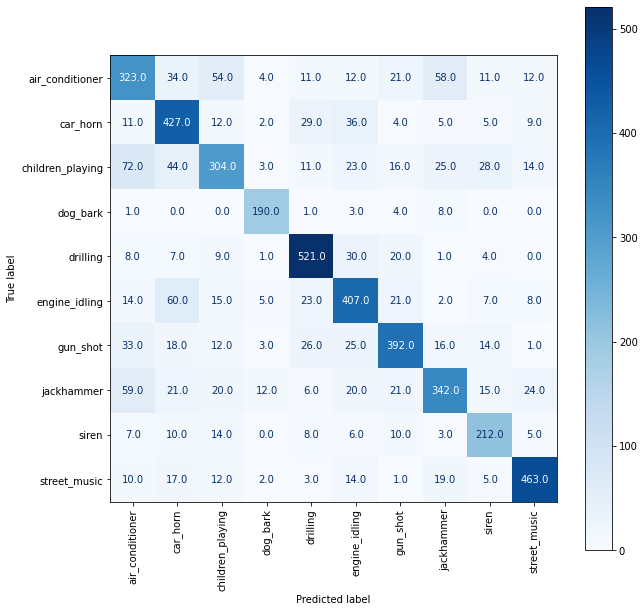

za parametre broj iteracija= 500 , solver= newton-cg  i pristup  ovr  tacnost je:  0.7133530103544579  a mat. konf. je:


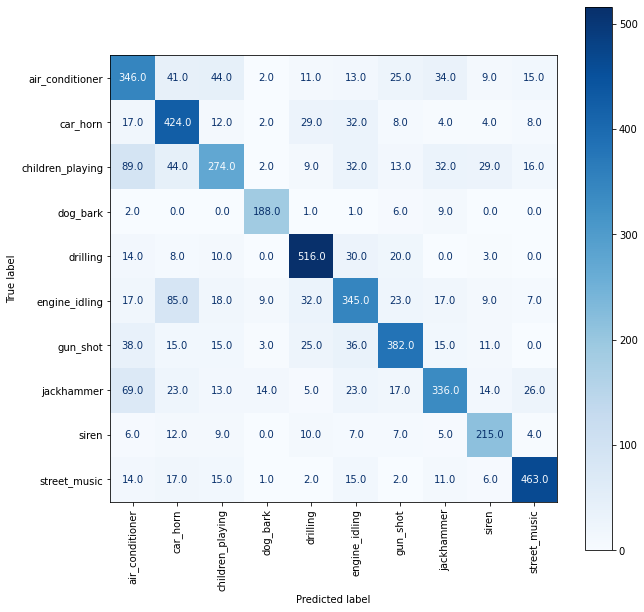

za parametre broj iteracija= 500 , solver= lbfgs  i pristup  auto  tacnost je:  0.7319582395959318  a mat. konf. je:


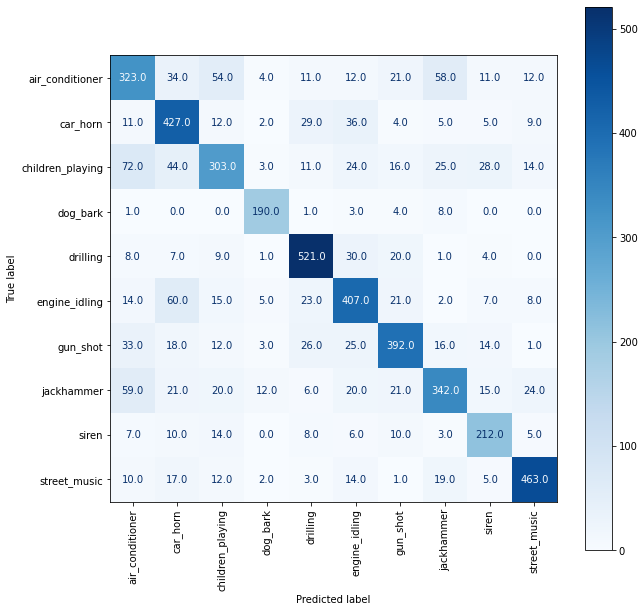

za parametre broj iteracija= 500 , solver= lbfgs  i pristup  ovr  tacnost je:  0.7133530103544579  a mat. konf. je:


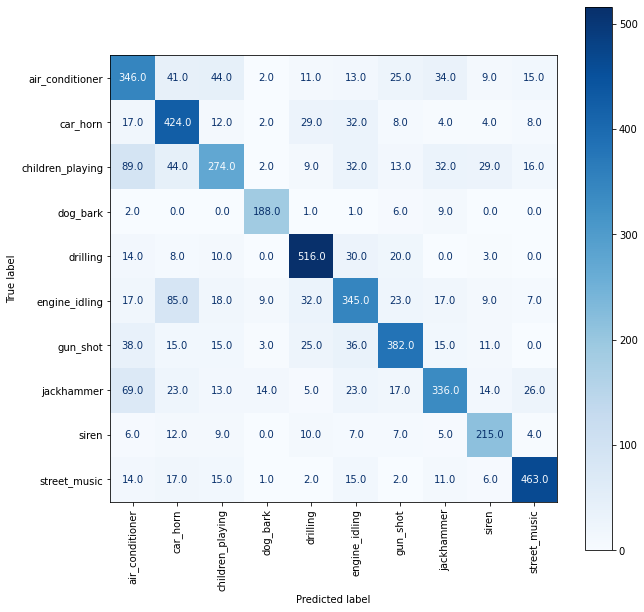

za parametre broj iteracija= 500 , solver= liblinear  i pristup  auto  tacnost je:  0.7108986048532475  a mat. konf. je:


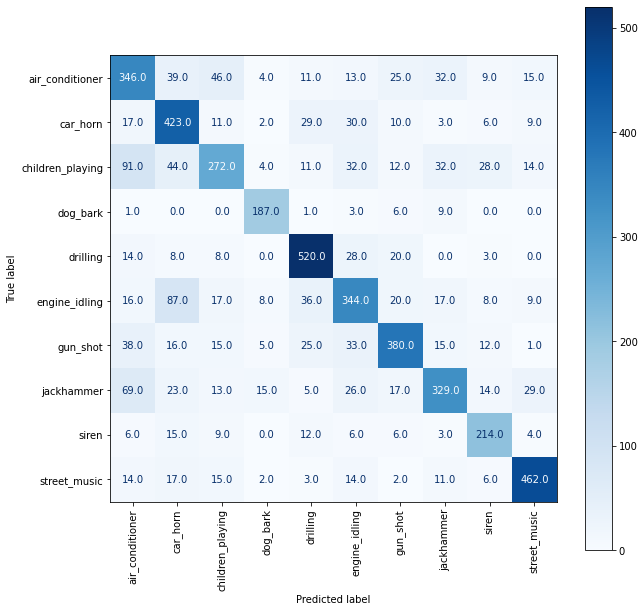

za parametre broj iteracija= 500 , solver= liblinear  i pristup  ovr  tacnost je:  0.7108986048532475  a mat. konf. je:


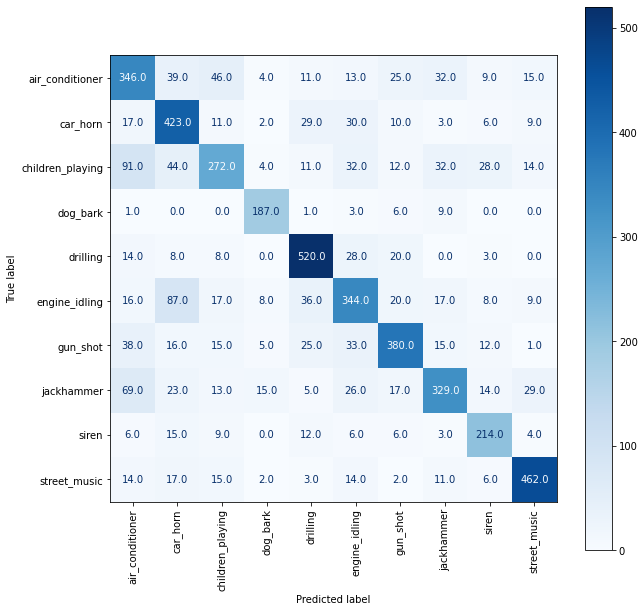

najbolja tacnost tj procenat pogodjenih uzoraka je u iteraciji broj:  0


In [ ]:

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
acc = []
# petlja po razlicitim vrednostima za max broj iteracija
for num in [100,200,500]:
  # petlja po razlicitim solverima
  for solv in ['newton-cg', 'lbfgs', 'liblinear']:
    for mc in ['auto', 'ovr']:
      for var in [0.99]:
        indexes = kf.split(X_train, y_train)
        acc_tmp = []
        fin_conf_mat2 = np.zeros((len(np.unique(y_train)),len(np.unique(y_train))))
        for train_index, val_index in indexes:
            
            x_t1=X_train.iloc[train_index,:] #nije normalizovano
            y_t=y_train.iloc[train_index] 
            x_val1=X_train.iloc[val_index,:] #nije normalizovano
            y_val=y_train.iloc[val_index]

            scaler = StandardScaler()
            scaler.fit(x_t1)              #parametri za norm izracunati nad trening skupom

            x_t = scaler.transform(x_t1)
            x_val = scaler.transform(x_val1)
            x_t = pd.DataFrame(x_t, index=x_t1.index, columns=x_t1.columns)
            x_val = pd.DataFrame(x_val, index=x_val1.index, columns=x_val1.columns)        #normalizovani trening i test skup nad kojim radim upsampling

            pca = PCA(n_components=var)
            pca.fit(x_t)
            x_train_r = pca.transform(x_t)
            x_val_r = pca.transform(x_val)
            x_train_r = pd.DataFrame(x_train_r, index=x_t.index) 
            x_val_r = pd.DataFrame(x_val_r, index=x_val.index)

            nedupl_ind = y_t.loc[(y_t!='car_horn')&(y_t!='gun_shot')].index #tu ce biti oni koji se ne dupliraju
            dupl_ind = y_t.loc[(y_t=='car_horn')|(y_t=='gun_shot')].index #tu ce biti svi oni koji se dupliraju
            y_upsample1 = y_t.copy(deep=True)
            X_upsample1 = x_train_r.copy(deep=True)

            X_dupl = x_train_r.loc[dupl_ind,:]
            X_duplicated = pd.concat([X_dupl]*2, ignore_index=True)
            X_upsample1 = X_duplicated.append(x_train_r.loc[nedupl_ind,:], ignore_index=True)

            y_dupl = y_t.loc[dupl_ind]
            y_duplicated = pd.concat([y_dupl]*2, ignore_index=True)
            y_upsample1 = y_duplicated.append(y_t.loc[nedupl_ind], ignore_index=True)

            classifier = LogisticRegression(max_iter = num, solver = solv, multi_class=mc)
            classifier.fit(X_upsample1, y_upsample1)
            y_pred = classifier.predict(x_val_r)          #ne dobija se za svaku klasu posebno vec samo jedna zdruzena
            acc_tmp.append(accuracy_score(y_val, y_pred)) #količnik zbira brojeva na glavnoj dijagonali matrice konfuzije i ukupnog broja uzoraka
            #print(confusion_matrix(y_ty_undersamplerain.iloc[val_index], y_pred, labels=labels_y))
            fin_conf_mat2 += confusion_matrix(y_val, y_pred) #dobijena sabiranjem 5 matrica kofuzije za 5 iteracija
        print('za parametre broj iteracija=', num, ', solver=', solv, ' i pristup ', mc, ' tacnost je: ', np.mean(acc_tmp),
                  ' a mat. konf. je:')
        #print(fin_conf_mat)
  
        disp = ConfusionMatrixDisplay(confusion_matrix =fin_conf_mat2,  display_labels=classifier.classes_,)
        fig, ax = plt.subplots(figsize=(10,10))
        disp.plot(cmap="Blues", values_format='', xticks_rotation=90,ax=ax)  
        plt.show()

        acc.append(np.mean(acc_tmp))
print('najbolja tacnost tj procenat pogodjenih uzoraka je u iteraciji broj: ', np.argmax(acc))


Za konacno odabrane parametre

tacnost je:  0.7321627385734369  a mat. konf. je:


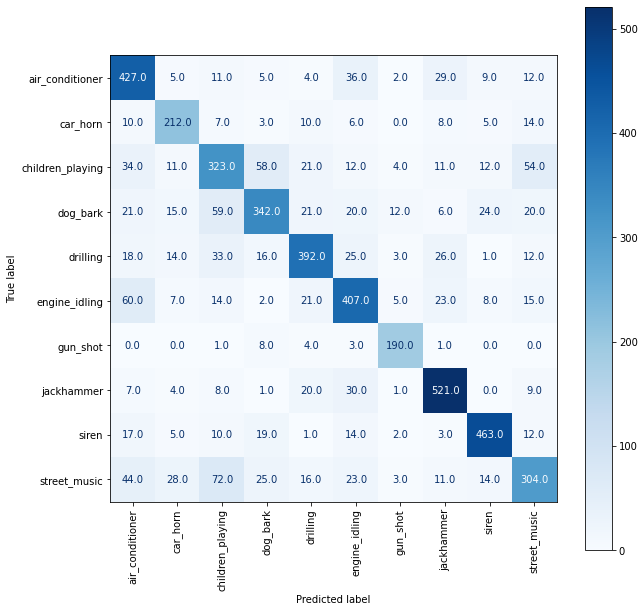

In [ ]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
acc = []
acc_tmp = []
indexes = kf.split(X_train, y_train)
fin_conf_mat2 = np.zeros((len(np.unique(y_train)),len(np.unique(y_train))))
for train_index, val_index in indexes:

            x_t1=X_train.iloc[train_index,:] #nije normalizovano
            y_t=y_train.iloc[train_index] 
            x_val1=X_train.iloc[val_index,:] #nije normalizovano
            y_val=y_train.iloc[val_index]

            scaler = StandardScaler()
            scaler.fit(x_t1)              #parametri za norm izracunati nad trening skupom

            x_t = scaler.transform(x_t1)
            x_val = scaler.transform(x_val1)
            x_t = pd.DataFrame(x_t, index=x_t1.index, columns=x_t1.columns)
            x_val = pd.DataFrame(x_val, index=x_val1.index, columns=x_val1.columns)        #normalizovani trening i test skup nad kojim radim upsampling

            pca = PCA(n_components=0.99)
            pca.fit(x_t)
            x_train_r = pca.transform(x_t)
            x_val_r = pca.transform(x_val)
            x_train_r = pd.DataFrame(x_train_r, index=x_t.index) 
            x_val_r = pd.DataFrame(x_val_r, index=x_val.index)

            nedupl_ind = y_t.loc[(y_t!='car_horn')&(y_t!='gun_shot')].index #tu ce biti oni koji se ne dupliraju
            dupl_ind = y_t.loc[(y_t=='car_horn')|(y_t=='gun_shot')].index #tu ce biti svi oni koji se dupliraju
            y_upsample1 = y_t.copy(deep=True)
            X_upsample1 = x_train_r.copy(deep=True)

            X_dupl = x_train_r.loc[dupl_ind,:]
            X_duplicated = pd.concat([X_dupl]*2, ignore_index=True)
            X_upsample1 = X_duplicated.append(x_train_r.loc[nedupl_ind,:], ignore_index=True)

            y_dupl = y_t.loc[dupl_ind]
            y_duplicated = pd.concat([y_dupl]*2, ignore_index=True)
            y_upsample1 = y_duplicated.append(y_t.loc[nedupl_ind], ignore_index=True)
            classifier = LogisticRegression(max_iter = 100, solver = 'newton-cg', multi_class='auto') 
            classifier.fit(X_upsample1.values, y_upsample1.values)
            y_pred = classifier.predict(x_val_r.values)
            

            acc_tmp.append(accuracy_score(y_val, y_pred))
            #print(confusion_matrix(y_undersample.iloc[val_index], y_pred, labels=labels_y))
            fin_conf_mat2 += confusion_matrix(y_val, y_pred)
            acc_tmp.append(accuracy_score(y_val, y_pred))

            
print('tacnost je: ', np.mean(acc_tmp),
                  ' a mat. konf. je:')
        
disp = ConfusionMatrixDisplay(confusion_matrix =fin_conf_mat2,  display_labels=classifier.classes_,)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(cmap="Blues", values_format='', xticks_rotation=90,ax=ax)  
plt.show()

In [ ]:
print('prosecna tacnost je: ', tacnost_po_klasi(fin_conf_mat2, niz))

Za klasu  air_conditioner  tacnost je:  0.9337558781435289
Za klasu  car_horn  tacnost je:  0.9689225107340013
Za klasu  children_playing  tacnost je:  0.9116745041913719
Za klasu  dog_bark  tacnost je:  0.9315068493150684
Za klasu  drilling  tacnost je:  0.9456143937845022
Za klasu  engine_idiling  tacnost je:  0.9337558781435289
Za klasu  gun_shot  tacnost je:  0.9899815988550399
Za klasu  jackhammer  tacnost je:  0.9595174810877122
Za klasu  siren  tacnost je:  0.9681046820691065
Za klasu  street_music  tacnost je:  0.9214884481701083
prosecna tacnost je:  0.946432222449397


In [ ]:
print('prosecna osetljivost je: ', osetljivost_po_klasi(fin_conf_mat2, niz))

Za klasu  air_conditioner  osetljivost je:  0.7907407407407407
Za klasu  car_horn  osetljivost je:  0.7709090909090909
Za klasu  children_playing  osetljivost je:  0.5981481481481481
Za klasu  dog_bark  osetljivost je:  0.6333333333333333
Za klasu  drilling  osetljivost je:  0.725925925925926
Za klasu  engine_idiling  osetljivost je:  0.7241992882562278
Za klasu  gun_shot  osetljivost je:  0.9178743961352657
Za klasu  jackhammer  osetljivost je:  0.8668885191347754
Za klasu  siren  osetljivost je:  0.847985347985348
Za klasu  street_music  osetljivost je:  0.562962962962963
prosecna osetljivost je:  0.7438967753531819


Finalni model

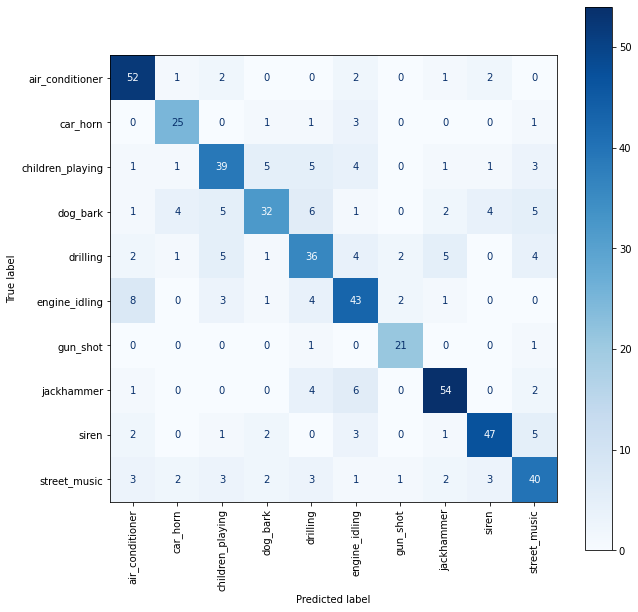

In [ ]:
classifier_logReg = LogisticRegression(max_iter = 100, solver = 'newton-cg', multi_class='auto')   
classifier_logReg.fit(X_upsample, y_upsample)
y_pred = classifier_logReg.predict(x_test_r)
conf_mat2 = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix =conf_mat2,  display_labels=classifier_logReg.classes_,)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(cmap="Blues", values_format='', xticks_rotation=90,ax=ax)  
plt.show()

In [ ]:
print('prosecna osetljivost je: ', osetljivost_po_klasi(conf_mat2, niz))

Za klasu  air_conditioner  osetljivost je:  0.8666666666666667
Za klasu  car_horn  osetljivost je:  0.8064516129032258
Za klasu  children_playing  osetljivost je:  0.65
Za klasu  dog_bark  osetljivost je:  0.5333333333333333
Za klasu  drilling  osetljivost je:  0.6
Za klasu  engine_idiling  osetljivost je:  0.6935483870967742
Za klasu  gun_shot  osetljivost je:  0.9130434782608695
Za klasu  jackhammer  osetljivost je:  0.8059701492537313
Za klasu  siren  osetljivost je:  0.7704918032786885
Za klasu  street_music  osetljivost je:  0.6666666666666666
prosecna osetljivost je:  0.7306172097459956


In [ ]:
print('prosecna specificnost je: ', specificnost_po_klasi(conf_mat2, niz))

Za klasu  air_conditioner  specificnost je:  0.9628099173553719
Za klasu  car_horn  specificnost je:  0.9824561403508771
Za klasu  children_playing  specificnost je:  0.9607438016528925
Za klasu  dog_bark  specificnost je:  0.9752066115702479
Za klasu  drilling  specificnost je:  0.9504132231404959
Za klasu  engine_idiling  specificnost je:  0.950207468879668
Za klasu  gun_shot  specificnost je:  0.9904030710172744
Za klasu  jackhammer  specificnost je:  0.9727463312368972
Za klasu  siren  specificnost je:  0.979296066252588
Za klasu  street_music  specificnost je:  0.9566115702479339
prosecna specificnost je:  0.9680894201704244


In [ ]:
print('prosecna preciznost je: ', preciznost_po_klasi(conf_mat2, niz))

Za klasu  air_conditioner  preciznost je:  0.7428571428571429
Za klasu  car_horn  preciznost je:  0.7352941176470589
Za klasu  children_playing  preciznost je:  0.6724137931034483
Za klasu  dog_bark  preciznost je:  0.7272727272727273
Za klasu  drilling  preciznost je:  0.6
Za klasu  engine_idiling  preciznost je:  0.6417910447761194
Za klasu  gun_shot  preciznost je:  0.8076923076923077
Za klasu  jackhammer  preciznost je:  0.8059701492537313
Za klasu  siren  preciznost je:  0.8245614035087719
Za klasu  street_music  preciznost je:  0.6557377049180327
prosecna preciznost je:  0.7213590391029341


In [ ]:
print('prosecna tacnost je: ', tacnost_po_klasi(conf_mat2, niz))

Za klasu  air_conditioner  tacnost je:  0.9522058823529411
Za klasu  car_horn  tacnost je:  0.9724264705882353
Za klasu  children_playing  tacnost je:  0.9264705882352942
Za klasu  dog_bark  tacnost je:  0.9264705882352942
Za klasu  drilling  tacnost je:  0.9117647058823529
Za klasu  engine_idiling  tacnost je:  0.9209558823529411
Za klasu  gun_shot  tacnost je:  0.9871323529411765
Za klasu  jackhammer  tacnost je:  0.9522058823529411
Za klasu  siren  tacnost je:  0.9558823529411765
Za klasu  street_music  tacnost je:  0.9246323529411765
prosecna tacnost je:  0.9430147058823527


In [ ]:
print('procenat pogodjenih uzoraka: ', accuracy_score(y_test, y_pred))
print('preciznost mikro: ', precision_score(y_test, y_pred, average='micro'))
print('preciznost makro: ', precision_score(y_test, y_pred, average='macro'))
print('osetljivost mikro: ', recall_score(y_test, y_pred, average='micro'))
print('osetljivost makro: ', recall_score(y_test, y_pred, average='macro'))
print('f mera mikro: ', f1_score(y_test, y_pred, average='micro'))
print('f mera makro: ', f1_score(y_test, y_pred, average='macro'))

procenat pogodjenih uzoraka:  0.7150735294117647
preciznost mikro:  0.7150735294117647
preciznost makro:  0.7213590391029341
osetljivost mikro:  0.7150735294117647
osetljivost makro:  0.7306172097459956
f mera mikro:  0.7150735294117647
f mera makro:  0.7233179201116096


Ansambl

krosvalidacija

za parametre C= 10 , kernel= rbf  i br  10  tacnost je:  0.8687400648798596  a mat. konf. je:


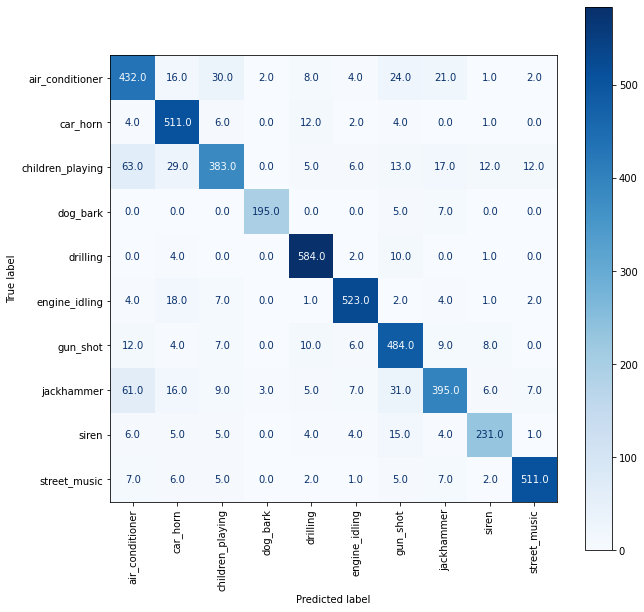

za parametre C= 10 , kernel= rbf  i br  20  tacnost je:  0.8687400648798596  a mat. konf. je:


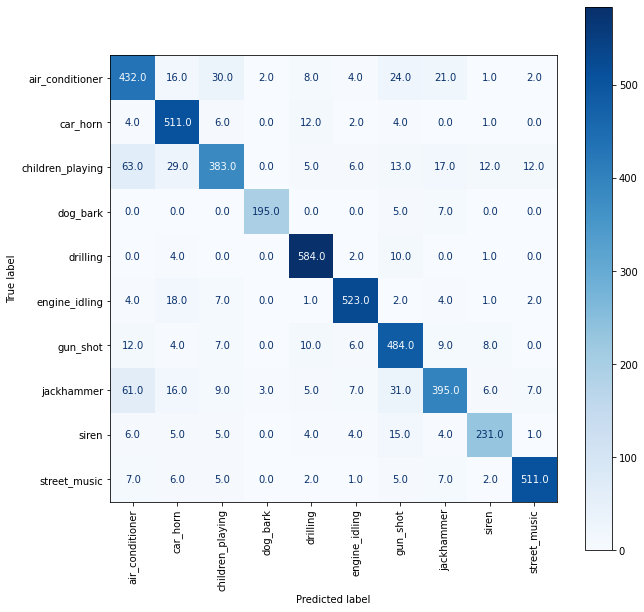

za parametre C= 10 , kernel= rbf  i br  30  tacnost je:  0.8687400648798596  a mat. konf. je:


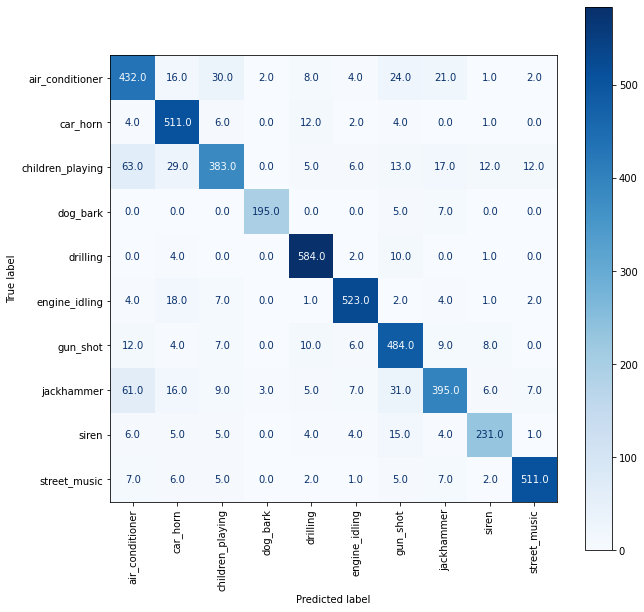

za parametre C= 50 , kernel= rbf  i br  10  tacnost je:  0.8914338114724135  a mat. konf. je:


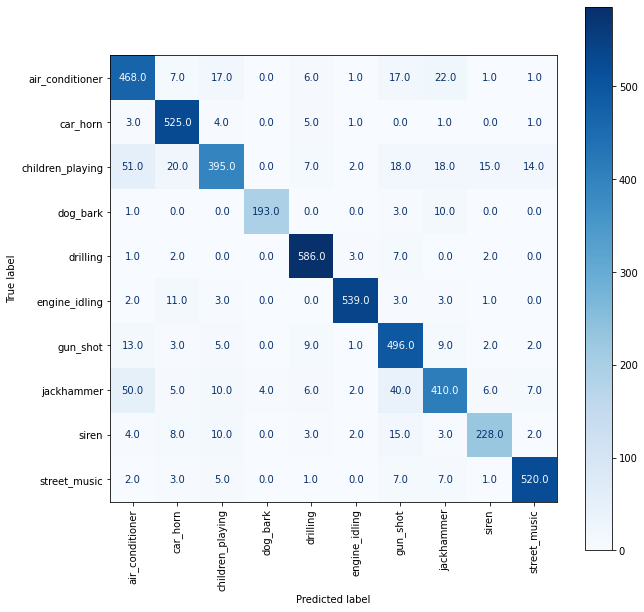

za parametre C= 50 , kernel= rbf  i br  20  tacnost je:  0.8914338114724135  a mat. konf. je:


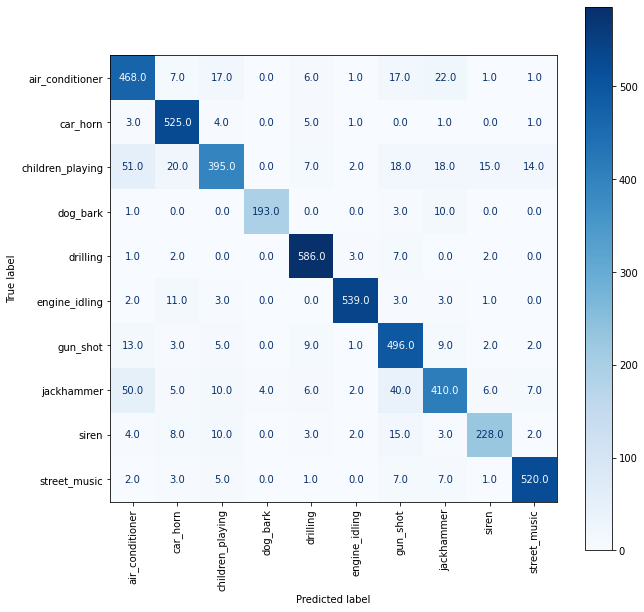

za parametre C= 50 , kernel= rbf  i br  30  tacnost je:  0.8914338114724135  a mat. konf. je:


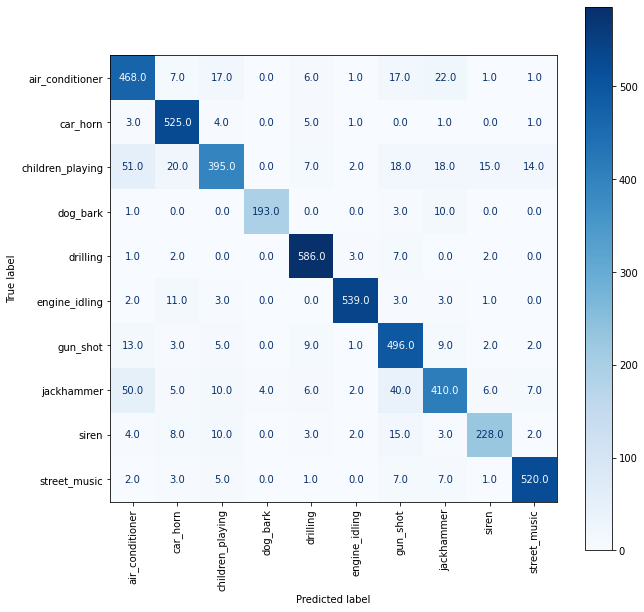

za parametre C= 100 , kernel= rbf  i br  10  tacnost je:  0.8967486960318007  a mat. konf. je:


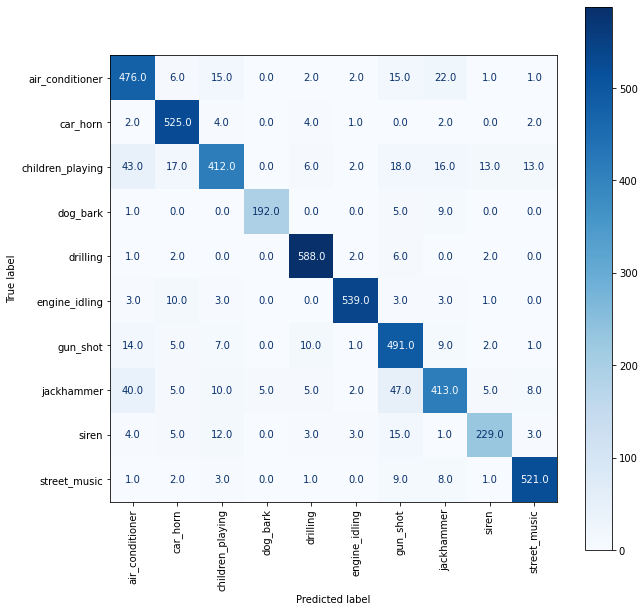

za parametre C= 100 , kernel= rbf  i br  20  tacnost je:  0.8967486960318007  a mat. konf. je:


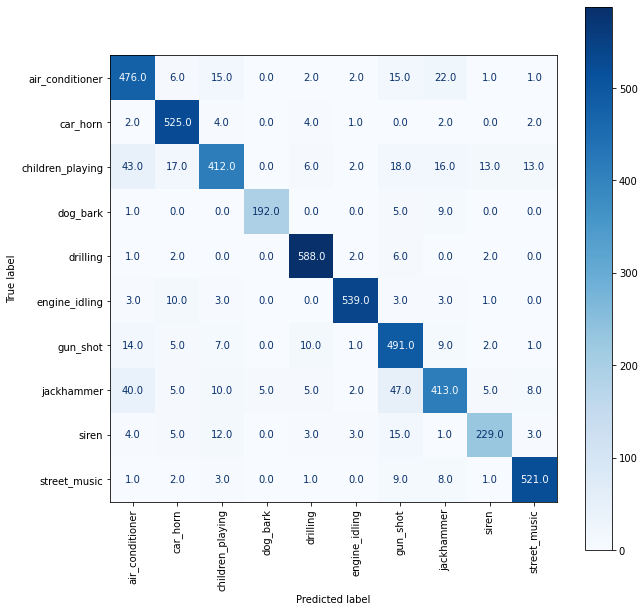

za parametre C= 100 , kernel= rbf  i br  30  tacnost je:  0.8967486960318007  a mat. konf. je:


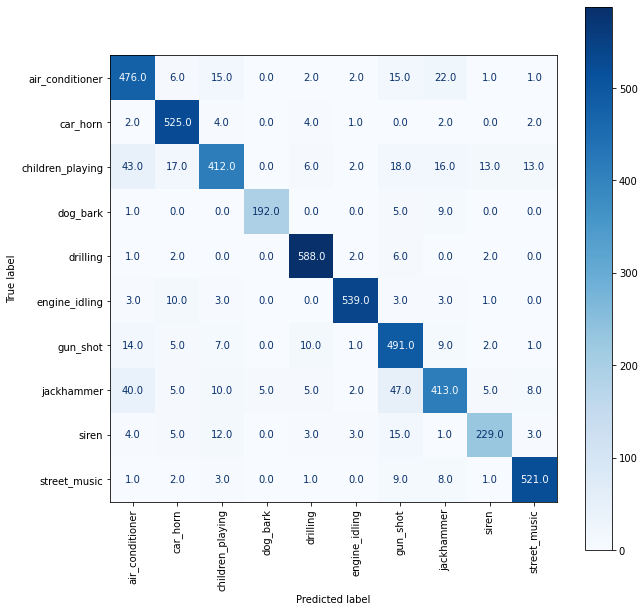

najbolja tacnost je u iteraciji broj:  6


In [ ]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
acc = []
for c in [10,50,100]:
    for F in ['rbf']:
        for br in [10,20,30]:
              indexes = kf.split(X_train, y_train) #delim trening na trening i validacioni skup
              acc_tmp = []
              fin_conf_mat = np.zeros((len(np.unique(y_train)),len(np.unique(y_train))))
              for train_index, val_index in indexes:

                x_t1=X_train.iloc[train_index,:] #nije normalizovano
                y_t=y_train.iloc[train_index] 
                x_val1=X_train.iloc[val_index,:] #nije normalizovano
                y_val=y_train.iloc[val_index]

                scaler = StandardScaler()
                scaler.fit(x_t1)              #parametri za norm izracunati nad trening skupom

                x_t = scaler.transform(x_t1)
                x_val = scaler.transform(x_val1)
                x_t = pd.DataFrame(x_t, index=x_t1.index, columns=x_t1.columns)
                x_val = pd.DataFrame(x_val, index=x_val1.index, columns=x_val1.columns)        #normalizovani trening i test skup nad kojim radim upsampling

                pca = PCA(n_components=0.99)
                pca.fit(x_t)
                x_train_r = pca.transform(x_t)
                x_val_r = pca.transform(x_val)
                x_train_r = pd.DataFrame(x_train_r, index=x_t.index) 
                x_val_r = pd.DataFrame(x_val_r, index=x_val.index)

                nedupl_ind = y_t.loc[(y_t!='car_horn')&(y_t!='gun_shot')].index #tu ce biti oni koji se ne dupliraju
                dupl_ind = y_t.loc[(y_t=='car_horn')|(y_t=='gun_shot')].index #tu ce biti svi oni koji se dupliraju
                y_upsample1 = y_t.copy(deep=True)
                X_upsample1 = x_train_r.copy(deep=True)

                X_dupl = x_train_r.loc[dupl_ind,:]
                X_duplicated = pd.concat([X_dupl]*2, ignore_index=True)
                X_upsample1 = X_duplicated.append(x_train_r.loc[nedupl_ind,:], ignore_index=True)

                y_dupl = y_t.loc[dupl_ind]
                y_duplicated = pd.concat([y_dupl]*2, ignore_index=True)
                y_upsample1 = y_duplicated.append(y_t.loc[nedupl_ind], ignore_index=True)

                classifier = BaggingClassifier(SVC(C=c, kernel=F, decision_function_shape='ovr'), n_estimators=br, bootstrap=False, bootstrap_features=False)
                classifier.fit(X_upsample1,y_upsample1)
                y_pred = classifier.predict(x_val_r)
                acc_tmp.append(accuracy_score(y_val, y_pred))
                fin_conf_mat += confusion_matrix(y_val, y_pred)
              print('za parametre C=', c, ', kernel=', F, ' i br ', br, ' tacnost je: ', np.mean(acc_tmp),
                  ' a mat. konf. je:')
              #print(fin_conf_mat)

              disp = ConfusionMatrixDisplay(confusion_matrix =fin_conf_mat,  display_labels=classifier.classes_,)
              fig, ax = plt.subplots(figsize=(10,10))
              disp.plot(cmap="Blues", values_format='', xticks_rotation=90,ax=ax)  
              plt.show()

              acc.append(np.mean(acc_tmp))
print('najbolja tacnost je u iteraciji broj: ', np.argmax(acc))

Za konacno odabrane parametre

tacnost je:  0.8967486960318007  a mat. konf. je:


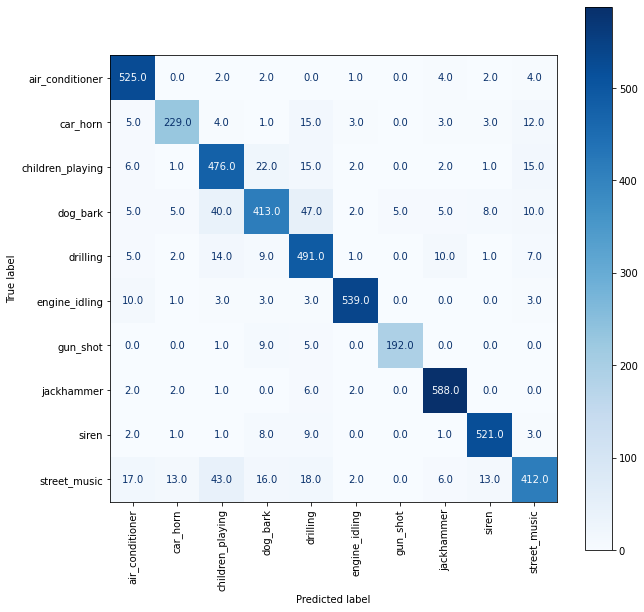

In [ ]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
acc = []
acc_tmp = []
indexes = kf.split(X_train, y_train)
fin_conf_mat3 = np.zeros((len(np.unique(y_train)),len(np.unique(y_train))))
for train_index, val_index in indexes:

            x_t1=X_train.iloc[train_index,:] #nije normalizovano
            y_t=y_train.iloc[train_index] 
            x_val1=X_train.iloc[val_index,:] #nije normalizovano
            y_val=y_train.iloc[val_index]

            scaler = StandardScaler()
            scaler.fit(x_t1)              #parametri za norm izracunati nad trening skupom

            x_t = scaler.transform(x_t1)
            x_val = scaler.transform(x_val1)
            x_t = pd.DataFrame(x_t, index=x_t1.index, columns=x_t1.columns)
            x_val = pd.DataFrame(x_val, index=x_val1.index, columns=x_val1.columns)        #normalizovani trening i test skup nad kojim radim upsampling

            pca = PCA(n_components=0.99)
            pca.fit(x_t)
            x_train_r = pca.transform(x_t)
            x_val_r = pca.transform(x_val)
            x_train_r = pd.DataFrame(x_train_r, index=x_t.index) 
            x_val_r = pd.DataFrame(x_val_r, index=x_val.index)

            nedupl_ind = y_t.loc[(y_t!='car_horn')&(y_t!='gun_shot')].index #tu ce biti oni koji se ne dupliraju
            dupl_ind = y_t.loc[(y_t=='car_horn')|(y_t=='gun_shot')].index #tu ce biti svi oni koji se dupliraju
            y_upsample1 = y_t.copy(deep=True)
            X_upsample1 = x_train_r.copy(deep=True)

            X_dupl = x_train_r.loc[dupl_ind,:]
            X_duplicated = pd.concat([X_dupl]*2, ignore_index=True)
            X_upsample1 = X_duplicated.append(x_train_r.loc[nedupl_ind,:], ignore_index=True)

            y_dupl = y_t.loc[dupl_ind]
            y_duplicated = pd.concat([y_dupl]*2, ignore_index=True)
            y_upsample1 = y_duplicated.append(y_t.loc[nedupl_ind], ignore_index=True)
            
            classifier = BaggingClassifier(SVC(C=100, kernel='rbf', decision_function_shape='ovr'), n_estimators=10, bootstrap=False, bootstrap_features=False)
            classifier.fit(X_upsample1, y_upsample1)
            y_pred1 = classifier.predict(x_val_r)

            acc_tmp.append(accuracy_score(y_val, y_pred1))
            #print(confusion_matrix(y_undersample.iloc[val_index], y_pred, labels=labels_y))
            fin_conf_mat3 += confusion_matrix(y_val, y_pred1)
            acc_tmp.append(accuracy_score(y_val, y_pred1))

            
print('tacnost je: ', np.mean(acc_tmp),
                  ' a mat. konf. je:')
        
disp = ConfusionMatrixDisplay(confusion_matrix =fin_conf_mat3,  display_labels=classifier.classes_,)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(cmap="Blues", values_format='', xticks_rotation=90,ax=ax)  
plt.show()

In [ ]:
print('prosecna tacnost je: ', tacnost_po_klasi(fin_conf_mat3, niz))

Za klasu  air_conditioner  tacnost je:  0.9863013698630136
Za klasu  car_horn  tacnost je:  0.985483541198119
Za klasu  children_playing  tacnost je:  0.964628910243304
Za klasu  dog_bark  tacnost je:  0.9597219382539358
Za klasu  drilling  tacnost je:  0.965855653240646
Za klasu  engine_idiling  tacnost je:  0.9926395420159476
Za klasu  gun_shot  tacnost je:  0.9959108566755265
Za klasu  jackhammer  tacnost je:  0.9910038846861583
Za klasu  siren  tacnost je:  0.9891637701901451
Za klasu  street_music  tacnost je:  0.9627887957472909
prosecna tacnost je:  0.9793498262114089


In [ ]:
print('prosecna osetljivost je: ', osetljivost_po_klasi(fin_conf_mat3, niz))

Za klasu  air_conditioner  osetljivost je:  0.9722222222222222
Za klasu  car_horn  osetljivost je:  0.8327272727272728
Za klasu  children_playing  osetljivost je:  0.8814814814814815
Za klasu  dog_bark  osetljivost je:  0.7648148148148148
Za klasu  drilling  osetljivost je:  0.9092592592592592
Za klasu  engine_idiling  osetljivost je:  0.9590747330960854
Za klasu  gun_shot  osetljivost je:  0.927536231884058
Za klasu  jackhammer  osetljivost je:  0.978369384359401
Za klasu  siren  osetljivost je:  0.9542124542124543
Za klasu  street_music  osetljivost je:  0.762962962962963
prosecna osetljivost je:  0.8942660817020013


Finalni model

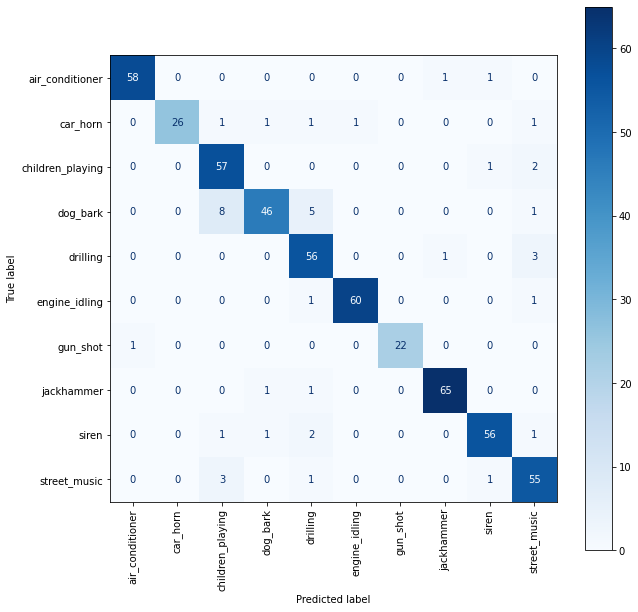

In [ ]:
classifier_Bsvm = BaggingClassifier(SVC(C=100, kernel='rbf', decision_function_shape='ovr', probability=True), n_estimators=10, bootstrap=False, bootstrap_features=False)
classifier_Bsvm.fit(X_upsample, y_upsample)
y_pred = classifier_Bsvm.predict(x_test_r)
conf_mat3 = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix =conf_mat3,  display_labels=classifier_Bsvm.classes_,)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(cmap="Blues", values_format='', xticks_rotation=90,ax=ax)  
plt.show()

In [ ]:
print('prosecna osetljivost je: ', osetljivost_po_klasi(conf_mat3, niz))

Za klasu  air_conditioner  osetljivost je:  0.9666666666666667
Za klasu  car_horn  osetljivost je:  0.8387096774193549
Za klasu  children_playing  osetljivost je:  0.95
Za klasu  dog_bark  osetljivost je:  0.7666666666666667
Za klasu  drilling  osetljivost je:  0.9333333333333333
Za klasu  engine_idiling  osetljivost je:  0.967741935483871
Za klasu  gun_shot  osetljivost je:  0.9565217391304348
Za klasu  jackhammer  osetljivost je:  0.9701492537313433
Za klasu  siren  osetljivost je:  0.9180327868852459
Za klasu  street_music  osetljivost je:  0.9166666666666666
prosecna osetljivost je:  0.9184488725983583


In [ ]:
print('prosecna specificnost je: ', specificnost_po_klasi(conf_mat3, niz))

Za klasu  air_conditioner  specificnost je:  0.9979338842975206
Za klasu  car_horn  specificnost je:  1.0
Za klasu  children_playing  specificnost je:  0.9731404958677686
Za klasu  dog_bark  specificnost je:  0.993801652892562
Za klasu  drilling  specificnost je:  0.9772727272727273
Za klasu  engine_idiling  specificnost je:  0.9979253112033195
Za klasu  gun_shot  specificnost je:  1.0
Za klasu  jackhammer  specificnost je:  0.9958071278825996
Za klasu  siren  specificnost je:  0.9937888198757764
Za klasu  street_music  specificnost je:  0.981404958677686
prosecna specificnost je:  0.991107497796996


In [ ]:
print('prosecna preciznost je: ', preciznost_po_klasi(conf_mat3, niz))

Za klasu  air_conditioner  preciznost je:  0.9830508474576272
Za klasu  car_horn  preciznost je:  1.0
Za klasu  children_playing  preciznost je:  0.8142857142857143
Za klasu  dog_bark  preciznost je:  0.9387755102040817
Za klasu  drilling  preciznost je:  0.835820895522388
Za klasu  engine_idiling  preciznost je:  0.9836065573770492
Za klasu  gun_shot  preciznost je:  1.0
Za klasu  jackhammer  preciznost je:  0.9701492537313433
Za klasu  siren  preciznost je:  0.9491525423728814
Za klasu  street_music  preciznost je:  0.859375
prosecna preciznost je:  0.9334216320951084


In [ ]:
print('prosecna tacnost je: ', tacnost_po_klasi(conf_mat3, niz))

Za klasu  air_conditioner  tacnost je:  0.9944852941176471
Za klasu  car_horn  tacnost je:  0.9908088235294118
Za klasu  children_playing  tacnost je:  0.9705882352941176
Za klasu  dog_bark  tacnost je:  0.96875
Za klasu  drilling  tacnost je:  0.9724264705882353
Za klasu  engine_idiling  tacnost je:  0.9944852941176471
Za klasu  gun_shot  tacnost je:  0.9981617647058824
Za klasu  jackhammer  tacnost je:  0.9926470588235294
Za klasu  siren  tacnost je:  0.9852941176470589
Za klasu  street_music  tacnost je:  0.9742647058823529
prosecna tacnost je:  0.9841911764705882


In [ ]:
print('procenat pogodjenih uzoraka: ', accuracy_score(y_test, y_pred))
print('preciznost mikro: ', precision_score(y_test, y_pred, average='micro'))
print('preciznost makro: ', precision_score(y_test, y_pred, average='macro'))
print('osetljivost mikro: ', recall_score(y_test, y_pred, average='micro'))
print('osetljivost makro: ', recall_score(y_test, y_pred, average='macro'))
print('f mera mikro: ', f1_score(y_test, y_pred, average='micro'))
print('f mera makro: ', f1_score(y_test, y_pred, average='macro'))

procenat pogodjenih uzoraka:  0.9209558823529411
preciznost mikro:  0.9209558823529411
preciznost makro:  0.9334216320951084
osetljivost mikro:  0.9209558823529411
osetljivost makro:  0.9184488725983583
f mera mikro:  0.9209558823529411
f mera makro:  0.9233887050804647
